In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import time
import math
import random
import copy
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import datasets, layers, models
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.cluster import KMeans, AgglomerativeClustering
#from tensorflow.keras.datasets import cifar10 
from keras.datasets import fashion_mnist 
from sklearn.metrics import silhouette_samples, silhouette_score

mod = sys.modules[__name__]

## main_num_dataset = 200
## other_num_dataset = 10

In [5]:
acc0 = [[0.66839998960495, 0.3662000000476837, 0.09799999743700027, 0.45170000195503235, 0.1590999960899353, 0.4771000146865845, 0.42910000681877136, 0.2971000075340271, 0.2711000144481659, 0.47940000891685486, 0.25619998574256897, 0.427700012922287, 0.24580000340938568, 0.6162999868392944, 0.09799999743700027, 0.5927000045776367, 0.3102000057697296, 0.6703000068664551, 0.09799999743700027, 0.39469999074935913, 0.09799999743700027, 0.1949000060558319, 0.3073999881744385, 0.6065999865531921, 0.21389999985694885, 0.5658000111579895, 0.6123999953269958, 0.46470001339912415, 0.26499998569488525, 0.4699999988079071], [0.7016000151634216, 0.6419000029563904, 0.6675999760627747, 0.4765999913215637, 0.262800008058548, 0.19480000436306, 0.3068999946117401, 0.5501999855041504, 0.7006999850273132, 0.18279999494552612, 0.6498000025749207, 0.6086999773979187, 0.7184000015258789, 0.5501999855041504, 0.19130000472068787, 0.5216000080108643, 0.09799999743700027, 0.09799999743700027, 0.17309999465942383, 0.6150000095367432, 0.2597000002861023, 0.5267999768257141, 0.6974999904632568, 0.2838999927043915, 0.671999990940094, 0.4560999870300293, 0.4749999940395355, 0.27309998869895935, 0.1459999978542328, 0.24529999494552612], [0.6934000253677368, 0.5679000020027161, 0.4805000126361847, 0.20149999856948853, 0.5121999979019165, 0.11349999904632568, 0.11349999904632568, 0.46709999442100525, 0.3010999858379364, 0.5586000084877014, 0.7203999757766724, 0.49709999561309814, 0.19670000672340393, 0.3012000024318695, 0.44850000739097595, 0.7418000102043152, 0.44200000166893005, 0.5203999876976013, 0.11349999904632568, 0.5979999899864197, 0.6517999768257141, 0.5192000269889832, 0.5008999705314636, 0.6523000001907349, 0.11349999904632568, 0.11349999904632568, 0.5663999915122986, 0.5911999940872192, 0.6039999723434448, 0.4805999994277954], [0.30059999227523804, 0.5313000082969666, 0.7705000042915344, 0.5964000225067139, 0.7717000246047974, 0.6830000281333923, 0.76910001039505, 0.7588000297546387, 0.5353999733924866, 0.44760000705718994, 0.5267000198364258, 0.6513000130653381, 0.3172999918460846, 0.7019000053405762, 0.5486000180244446, 0.609499990940094, 0.44449999928474426, 0.45910000801086426, 0.4616999924182892, 0.37929999828338623, 0.21330000460147858, 0.21369999647140503, 0.2888999879360199, 0.38850000500679016, 0.32739999890327454, 0.20020000636577606, 0.6858999729156494, 0.6561999917030334, 0.7465000152587891, 0.527899980545044], [0.34459999203681946, 0.35659998655319214, 0.45570001006126404, 0.4661000072956085, 0.5411999821662903, 0.6014999747276306, 0.3481000065803528, 0.35749998688697815, 0.462799996137619, 0.19329999387264252, 0.10320000350475311, 0.4480000138282776, 0.6169999837875366, 0.4404999911785126, 0.7893999814987183, 0.4456000030040741, 0.5946000218391418, 0.7806000113487244, 0.746999979019165, 0.6714000105857849, 0.5116000175476074, 0.1890999972820282, 0.2973000109195709, 0.4749999940395355, 0.27639999985694885, 0.6243000030517578, 0.7200999855995178, 0.7099000215530396, 0.6195999979972839, 0.3650999963283539], [0.7904000282287598, 0.10320000350475311, 0.3456000089645386, 0.5468000173568726, 0.3582000136375427, 0.4106999933719635, 0.3587999939918518, 0.6230999827384949, 0.6535000205039978, 0.7796000242233276, 0.4729999899864197, 0.5952000021934509, 0.42579999566078186, 0.6132000088691711, 0.7390999794006348, 0.10360000282526016, 0.6209999918937683, 0.6876000165939331, 0.3149000108242035, 0.4075999855995178, 0.41620001196861267, 0.4578000009059906, 0.6516000032424927, 0.671500027179718, 0.664900004863739, 0.6069999933242798, 0.7361000180244446, 0.20160000026226044, 0.42320001125335693, 0.695900022983551], [0.8657000064849854, 0.5515000224113464, 0.10100000351667404, 0.2694000005722046, 0.6765999794006348, 0.4749999940395355, 0.1615999937057495, 0.29179999232292175, 0.36910000443458557, 0.26489999890327454, 0.3409999907016754, 0.8227999806404114, 0.7069000005722046, 0.6862999796867371, 0.35120001435279846, 0.46050000190734863, 0.5012999773025513, 0.3873000144958496, 0.3506999909877777, 0.38429999351501465, 0.28200000524520874, 0.2134999930858612, 0.10100000351667404, 0.1582999974489212, 0.10100000351667404, 0.7723000049591064, 0.48429998755455017, 0.4867999851703644, 0.10100000351667404, 0.17069999873638153], [0.10100000351667404, 0.24879999458789825, 0.5526999831199646, 0.21459999680519104, 0.8580999970436096, 0.10100000351667404, 0.18240000307559967, 0.3831999897956848, 0.20239999890327454, 0.66839998960495, 0.22390000522136688, 0.699400007724762, 0.41999998688697815, 0.10100000351667404, 0.44519999623298645, 0.640500009059906, 0.10100000351667404, 0.10100000351667404, 0.738099992275238, 0.6489999890327454, 0.7767000198364258, 0.5759999752044678, 0.7044000029563904, 0.557699978351593, 0.7918000221252441, 0.786300003528595, 0.26159998774528503, 0.5699999928474426, 0.28679999709129333, 0.707099974155426], [0.723800003528595, 0.808899998664856, 0.1031000018119812, 0.0982000008225441, 0.6251000165939331, 0.31619998812675476, 0.579200029373169, 0.5555999875068665, 0.5950999855995178, 0.44830000400543213, 0.6226999759674072, 0.6344000101089478, 0.5131999850273132, 0.2287999987602234, 0.6633999943733215, 0.7480999827384949, 0.8156999945640564, 0.7257999777793884, 0.5333999991416931, 0.5821999907493591, 0.7225000262260437, 0.6970999836921692, 0.09969999641180038, 0.5422000288963318, 0.8133000135421753, 0.5051000118255615, 0.6705999970436096, 0.4961000084877014, 0.3614000082015991, 0.0982000008225441], [0.4830000102519989, 0.5692999958992004, 0.4952000081539154, 0.09830000251531601, 0.8184000253677368, 0.6554999947547913, 0.48910000920295715, 0.3763999938964844, 0.49320000410079956, 0.13019999861717224, 0.755299985408783, 0.0982000008225441, 0.703499972820282, 0.2980000078678131, 0.8572999835014343, 0.6638000011444092, 0.09849999845027924, 0.46779999136924744, 0.7961999773979187, 0.5249000191688538, 0.588100016117096, 0.3725000023841858, 0.391400009393692, 0.7228000164031982, 0.09920000284910202, 0.6054999828338623, 0.10429999977350235, 0.48829999566078186, 0.6561999917030334, 0.10480000078678131], [0.807200014591217, 0.6225000023841858, 0.489300012588501, 0.13199999928474426, 0.8981000185012817, 0.2572000026702881, 0.65829998254776, 0.8129000067710876, 0.5358999967575073, 0.7426999807357788, 0.8001000285148621, 0.20829999446868896, 0.7778000235557556, 0.47049999237060547, 0.7904999852180481, 0.7817000150680542, 0.8359000086784363, 0.7653999924659729, 0.34150001406669617, 0.7953000068664551, 0.38999998569488525, 0.4489000141620636, 0.4171999990940094, 0.3612000048160553, 0.2818000018596649, 0.7179999947547913, 0.666100025177002, 0.7250000238418579, 0.7008000016212463, 0.31369999051094055], [0.545199990272522, 0.8946999907493591, 0.41499999165534973, 0.8723000288009644, 0.7652999758720398, 0.1550000011920929, 0.14880000054836273, 0.7818999886512756, 0.35670000314712524, 0.8307999968528748, 0.5242999792098999, 0.6165000200271606, 0.41600000858306885, 0.6003999710083008, 0.6184999942779541, 0.875, 0.8342999815940857, 0.6388999819755554, 0.0892999991774559, 0.5827000141143799, 0.5645999908447266, 0.7315999865531921, 0.6366999745368958, 0.7166000008583069, 0.14020000398159027, 0.4027999937534332, 0.5547000169754028, 0.3407000005245209, 0.2759999930858612, 0.5760999917984009], [0.24969999492168427, 0.2222999930381775, 0.7096999883651733, 0.7791000008583069, 0.83160001039505, 0.47290000319480896, 0.6811000108718872, 0.4975999891757965, 0.8547000288963318, 0.5722000002861023, 0.8256000280380249, 0.4090000092983246, 0.15469999611377716, 0.2614000141620636, 0.13740000128746033, 0.3158999979496002, 0.3280999958515167, 0.2768000066280365, 0.5054000020027161, 0.19629999995231628, 0.4023999869823456, 0.6728000044822693, 0.7602999806404114, 0.3158000111579895, 0.3749000132083893, 0.7145000100135803, 0.5666999816894531, 0.8008000254631042, 0.6438000202178955, 0.1606999933719635], [0.6449999809265137, 0.8159999847412109, 0.8299000263214111, 0.7121000289916992, 0.45080000162124634, 0.7904999852180481, 0.64410001039505, 0.7700999975204468, 0.8334000110626221, 0.6600000262260437, 0.3433000147342682, 0.83160001039505, 0.8614000082015991, 0.5691999793052673, 0.9003000259399414, 0.8058000206947327, 0.756600022315979, 0.3564000129699707, 0.7829999923706055, 0.4138999879360199, 0.8260999917984009, 0.5511000156402588, 0.5543000102043152, 0.8130999803543091, 0.6933000087738037, 0.873199999332428, 0.8754000067710876, 0.5253999829292297, 0.3991999924182892, 0.7390000224113464], [0.21799999475479126, 0.46129998564720154, 0.5608000159263611, 0.5031999945640564, 0.6696000099182129, 0.7150999903678894, 0.6104999780654907, 0.7802000045776367, 0.685699999332428, 0.6323000192642212, 0.2906000018119812, 0.5264999866485596, 0.6414999961853027, 0.6496000289916992, 0.8014000058174133, 0.6740000247955322, 0.8761000037193298, 0.3831999897956848, 0.7192999720573425, 0.8495000004768372, 0.9089999794960022, 0.913100004196167, 0.8679999709129333, 0.7835999727249146, 0.7175999879837036, 0.3896999955177307, 0.8399999737739563, 0.8371000289916992, 0.19740000367164612, 0.7268999814987183], [0.7645999789237976, 0.7315999865531921, 0.645799994468689, 0.45829999446868896, 0.7973999977111816, 0.7634000182151794, 0.8242999911308289, 0.48969998955726624, 0.8978000283241272, 0.8371999859809875, 0.7993999719619751, 0.42080000042915344, 0.3659000098705292, 0.677299976348877, 0.30880001187324524, 0.6608999967575073, 0.8241000175476074, 0.6687999963760376, 0.817300021648407, 0.5303999781608582, 0.7573999762535095, 0.7117999792098999, 0.24369999766349792, 0.6923999786376953, 0.7767999768257141, 0.7246999740600586, 0.5202999711036682, 0.8216000199317932, 0.7379999756813049, 0.41499999165534973], [0.7078999876976013, 0.8019999861717224, 0.11479999870061874, 0.4406000077724457, 0.5893999934196472, 0.828000009059906, 0.8260999917984009, 0.5299999713897705, 0.6861000061035156, 0.7434999942779541, 0.7741000056266785, 0.725600004196167, 0.4927999973297119, 0.7120000123977661, 0.48730000853538513, 0.8500000238418579, 0.46219998598098755, 0.17239999771118164, 0.486299991607666, 0.4603999853134155, 0.718500018119812, 0.16130000352859497, 0.4821999967098236, 0.25780001282691956, 0.3158999979496002, 0.15080000460147858, 0.7512000203132629, 0.6628999710083008, 0.574400007724762, 0.5306000113487244], [0.6547999978065491, 0.5103999972343445, 0.6552000045776367, 0.7753000259399414, 0.8299999833106995, 0.7694000005722046, 0.7865999937057495, 0.1509000062942505, 0.8393999934196472, 0.33709999918937683, 0.6707000136375427, 0.2078000009059906, 0.11720000207424164, 0.6891000270843506, 0.859000027179718, 0.3271999955177307, 0.4255000054836273, 0.8055999875068665, 0.8299000263214111, 0.7580999732017517, 0.4016000032424927, 0.26930001378059387, 0.13490000367164612, 0.800000011920929, 0.621399998664856, 0.14300000667572021, 0.7159000039100647, 0.2085999995470047, 0.2281000018119812, 0.6392999887466431], [0.46650001406669617, 0.7681999802589417, 0.8446000218391418, 0.33739998936653137, 0.8847000002861023, 0.4661000072956085, 0.46799999475479126, 0.5468000173568726, 0.4724000096321106, 0.357699990272522, 0.9000999927520752, 0.5149999856948853, 0.8633999824523926, 0.38670000433921814, 0.8673999905586243, 0.6093000173568726, 0.7452999949455261, 0.6230000257492065, 0.6553999781608582, 0.25929999351501465, 0.5676000118255615, 0.17309999465942383, 0.5938000082969666, 0.8561999797821045, 0.9373000264167786, 0.7268000245094299, 0.7138000130653381, 0.6194999814033508, 0.4426000118255615, 0.847100019454956], [0.23770000040531158, 0.5047000050544739, 0.78329998254776, 0.7576000094413757, 0.36480000615119934, 0.8672000169754028, 0.5942000150680542, 0.8654000163078308, 0.8801000118255615, 0.2904999852180481, 0.7379999756813049, 0.8241999745368958, 0.7031999826431274, 0.7994999885559082, 0.3686000108718872, 0.5740000009536743, 0.6281999945640564, 0.7080000042915344, 0.8514999747276306, 0.4966999888420105, 0.6657000184059143, 0.6832000017166138, 0.8507000207901001, 0.6123999953269958, 0.23929999768733978, 0.6345000267028809, 0.27720001339912415, 0.3921000063419342, 0.7857999801635742, 0.9193000197410583]]
loss0 = [[3.4383394718170166, 9.675259590148926, 237.4830322265625, 10.783952713012695, 13.637232780456543, 8.015593528747559, 5.87692403793335, 26.805700302124023, 12.227094650268555, 7.820197105407715, 10.859757423400879, 21.908418655395508, 13.857057571411133, 3.8533239364624023, 233.28640747070312, 6.432994365692139, 14.085898399353027, 1.1248141527175903, 236.704345703125, 10.71605110168457, 225.45640563964844, 11.671013832092285, 5.123229503631592, 3.6623992919921875, 12.075787544250488, 2.7439963817596436, 3.3726251125335693, 8.33564567565918, 8.369483947753906, 3.8992207050323486], [2.5289132595062256, 3.1402275562286377, 4.384644031524658, 3.9712255001068115, 8.375970840454102, 16.794614791870117, 24.397266387939453, 9.46393871307373, 2.636929988861084, 11.789454460144043, 3.9833719730377197, 1.721991777420044, 1.0218901634216309, 4.11389684677124, 12.615242958068848, 3.5839078426361084, 14.311413764953613, 16.796497344970703, 13.424504280090332, 2.9149539470672607, 15.149829864501953, 11.083255767822266, 3.259422779083252, 15.288529396057129, 2.752284288406372, 8.151723861694336, 9.055255889892578, 9.595719337463379, 36.840232849121094, 11.444418907165527], [2.7649738788604736, 5.962379455566406, 7.133936882019043, 78.55512237548828, 8.654132843017578, 151.47898864746094, 145.5670623779297, 8.456954956054688, 12.290119171142578, 6.389251232147217, 2.455716133117676, 8.196697235107422, 29.771228790283203, 13.91582202911377, 9.897178649902344, 3.02681827545166, 8.842164993286133, 7.144581317901611, 137.447509765625, 5.147502422332764, 3.3987109661102295, 7.042150974273682, 8.214577674865723, 2.398972272872925, 179.62774658203125, 145.89840698242188, 4.656900882720947, 4.556197166442871, 3.675262928009033, 10.023518562316895], [4.776546001434326, 3.650911331176758, 1.496805191040039, 2.9868853092193604, 1.4779456853866577, 1.7115427255630493, 1.2816812992095947, 1.5876243114471436, 2.6783831119537354, 3.5815207958221436, 3.664041757583618, 2.5162034034729004, 7.630164623260498, 1.9170026779174805, 3.520252227783203, 2.4268782138824463, 3.790649175643921, 3.9765546321868896, 3.7374682426452637, 6.402660846710205, 10.28873062133789, 8.738914489746094, 5.95257568359375, 3.851088762283325, 5.147974014282227, 10.819125175476074, 1.771209716796875, 2.1209754943847656, 1.2364617586135864, 3.496575355529785], [5.82274055480957, 6.794310092926025, 5.753076076507568, 5.487245082855225, 7.099910259246826, 5.141885757446289, 5.714457035064697, 7.146088123321533, 5.373115539550781, 16.917827606201172, 25.630821228027344, 4.8766093254089355, 3.305372953414917, 4.724684238433838, 1.6010737419128418, 4.188849449157715, 3.9541096687316895, 0.9317820072174072, 1.1315817832946777, 2.8952879905700684, 5.12926721572876, 11.862021446228027, 5.631065368652344, 4.699246406555176, 6.147148609161377, 2.808830976486206, 3.2010293006896973, 3.853449583053589, 3.8461410999298096, 6.9699249267578125], [1.184484601020813, 61.654781341552734, 4.553990364074707, 6.69638729095459, 6.196923732757568, 3.9229090213775635, 7.6871466636657715, 3.171373128890991, 4.141448974609375, 1.2607829570770264, 3.726581573486328, 2.5648903846740723, 4.102792739868164, 2.894395112991333, 2.5317578315734863, 37.772247314453125, 2.528372287750244, 2.785698652267456, 4.722686290740967, 4.944428443908691, 5.090434551239014, 4.413418769836426, 3.8334503173828125, 2.711440086364746, 2.128934144973755, 2.85754132270813, 1.8938884735107422, 9.070626258850098, 3.230452060699463, 2.5623128414154053], [0.5523186326026917, 2.6803643703460693, 11.026190757751465, 7.7882771492004395, 2.98354434967041, 2.555758476257324, 6.749778747558594, 8.736527442932129, 8.182971000671387, 7.942339897155762, 4.760164260864258, 0.7263363599777222, 1.9643634557724, 2.800781726837158, 6.226179122924805, 3.087153911590576, 2.999018430709839, 6.760904788970947, 6.861423492431641, 6.597133636474609, 8.271468162536621, 11.719544410705566, 9.606342315673828, 8.320168495178223, 12.00082015991211, 1.301015853881836, 6.654513359069824, 5.520084857940674, 13.614568710327148, 9.805023193359375], [33.06852340698242, 11.267303466796875, 3.673171043395996, 10.344586372375488, 0.6306347250938416, 46.06623458862305, 13.692575454711914, 6.85860013961792, 11.572508811950684, 3.836620807647705, 11.716001510620117, 1.9166247844696045, 5.614434719085693, 34.482421875, 4.842465877532959, 4.899357795715332, 44.021080017089844, 48.50695037841797, 1.7632246017456055, 2.53909969329834, 1.6005455255508423, 4.942785739898682, 3.1735424995422363, 3.7433488368988037, 1.1159682273864746, 0.9804356694221497, 14.228616714477539, 4.371047496795654, 11.757115364074707, 2.428213357925415], [1.2508362531661987, 1.01605224609375, 26.57184600830078, 34.79854965209961, 2.1654415130615234, 9.008313179016113, 1.912506103515625, 1.9104033708572388, 1.8477765321731567, 3.2893004417419434, 1.6004245281219482, 2.3383076190948486, 2.136646032333374, 13.90515422821045, 2.741466760635376, 0.9855304956436157, 0.7984331250190735, 1.4914028644561768, 2.380905866622925, 1.8720829486846924, 1.033395528793335, 1.777787446975708, 36.56498718261719, 2.9257564544677734, 1.2011940479278564, 1.9040474891662598, 1.8109726905822754, 3.4489805698394775, 3.07654070854187, 26.310522079467773], [7.038691520690918, 3.03100848197937, 4.162337303161621, 39.492740631103516, 0.9367304444313049, 2.1227169036865234, 5.271324157714844, 4.6744184494018555, 3.6859850883483887, 23.706836700439453, 1.441831111907959, 42.08314514160156, 1.5575798749923706, 4.830162048339844, 0.6181682348251343, 1.4383392333984375, 34.826133728027344, 3.0453734397888184, 1.3568981885910034, 3.0547544956207275, 2.254725694656372, 5.315093517303467, 3.5878844261169434, 1.3353155851364136, 32.154945373535156, 1.7198477983474731, 24.500425338745117, 4.7703986167907715, 3.6824984550476074, 35.087318420410156], [0.7821416258811951, 1.7148361206054688, 2.9993200302124023, 10.145853042602539, 0.3846507668495178, 3.635591506958008, 1.511014699935913, 0.9171501994132996, 2.2808220386505127, 1.2193816900253296, 1.190779685974121, 7.329771041870117, 1.4816854000091553, 3.9363086223602295, 0.82547527551651, 1.295249104499817, 0.9453801512718201, 1.0103049278259277, 5.717631816864014, 0.9643445014953613, 4.90653133392334, 4.009561538696289, 2.9850058555603027, 3.724524974822998, 5.357178688049316, 1.2965643405914307, 1.648046851158142, 1.052001953125, 1.2700482606887817, 2.6710267066955566], [2.184209108352661, 0.4926548898220062, 5.357712268829346, 0.6695685982704163, 1.291856050491333, 21.28802490234375, 19.231769561767578, 1.2545650005340576, 6.88722562789917, 0.8850579857826233, 6.46346378326416, 1.8732237815856934, 5.523672103881836, 3.1364123821258545, 3.1031486988067627, 0.5902153253555298, 0.7241568565368652, 2.087554693222046, 27.975547790527344, 3.0904533863067627, 2.972011089324951, 1.8776353597640991, 2.721992015838623, 1.7883497476577759, 16.073274612426758, 4.83396577835083, 3.595789909362793, 6.914373397827148, 6.7821455001831055, 2.8012590408325195], [9.843148231506348, 6.008405685424805, 1.5714924335479736, 1.0350195169448853, 0.8757675886154175, 3.3918657302856445, 1.3344093561172485, 2.147338390350342, 0.4477589428424835, 1.429032564163208, 0.8049279451370239, 5.0129313468933105, 9.459978103637695, 7.870301723480225, 11.855563163757324, 9.649378776550293, 6.937456130981445, 9.11123275756836, 2.028717517852783, 7.764766216278076, 5.775435924530029, 1.4008747339248657, 1.2421202659606934, 6.808938980102539, 3.7129437923431396, 0.8462498188018799, 2.869750499725342, 1.1843030452728271, 1.5239142179489136, 9.598190307617188], [1.8854892253875732, 0.9231163859367371, 1.1282615661621094, 1.3672429323196411, 3.5516016483306885, 0.9107604622840881, 1.337613821029663, 1.1687028408050537, 0.7772589325904846, 1.5154461860656738, 9.900739669799805, 1.0823211669921875, 0.619872510433197, 2.638279914855957, 0.4072549343109131, 0.8073211312294006, 1.8067394495010376, 3.926192283630371, 1.129478931427002, 7.204926490783691, 0.6909675002098083, 2.669421911239624, 2.449167490005493, 1.1428338289260864, 1.5663411617279053, 0.5126127004623413, 0.5738762021064758, 2.535154104232788, 7.96290397644043, 1.3861697912216187], [10.349629402160645, 3.1994521617889404, 5.17196798324585, 3.590026617050171, 2.63181471824646, 1.0247833728790283, 2.531310796737671, 1.543553113937378, 2.287595510482788, 2.3248867988586426, 11.126927375793457, 2.7598087787628174, 1.9019372463226318, 1.8376575708389282, 0.8404679894447327, 1.8349419832229614, 0.5547048449516296, 5.766404151916504, 1.6387892961502075, 0.6468725204467773, 0.3989054560661316, 0.37642717361450195, 0.5580732226371765, 1.4667415618896484, 1.2091678380966187, 8.422045707702637, 0.7534196972846985, 0.79408860206604, 15.035016059875488, 1.6422510147094727], [1.4019036293029785, 0.8805798888206482, 2.2049074172973633, 3.634012222290039, 0.81281578540802, 1.2164783477783203, 0.8132593035697937, 3.8761448860168457, 0.37706458568573, 0.8286777138710022, 1.0567636489868164, 8.722036361694336, 8.715999603271484, 1.8714470863342285, 12.33478832244873, 1.9719082117080688, 0.9229599833488464, 1.6228389739990234, 0.7624853253364563, 5.990533351898193, 1.488195538520813, 1.6333324909210205, 16.019224166870117, 1.3280248641967773, 1.3958919048309326, 1.2924076318740845, 2.7855541706085205, 1.1468298435211182, 2.0448670387268066, 5.737860679626465], [1.7888113260269165, 0.8374853730201721, 10.010787010192871, 4.520172595977783, 2.6389319896698, 0.792262613773346, 1.0145071744918823, 3.3038032054901123, 2.3140969276428223, 1.4690965414047241, 1.3316010236740112, 1.9206095933914185, 4.0224480628967285, 1.3756356239318848, 3.766484260559082, 0.5335000157356262, 6.270064830780029, 11.401054382324219, 2.919661045074463, 2.228618860244751, 1.2429999113082886, 10.776503562927246, 2.740351676940918, 4.805546283721924, 5.56373405456543, 14.12436580657959, 1.2980637550354004, 1.5801680088043213, 1.9079488515853882, 4.1966986656188965], [1.5650105476379395, 4.272505283355713, 2.4308929443359375, 1.0699701309204102, 0.7778499722480774, 1.1663246154785156, 1.1728793382644653, 11.862302780151367, 0.8523106575012207, 6.184210777282715, 1.6883912086486816, 15.934464454650879, 18.686792373657227, 2.512977361679077, 1.069444179534912, 5.7765607833862305, 3.8321948051452637, 1.0274685621261597, 1.0937206745147705, 1.1308093070983887, 3.792872667312622, 6.0584845542907715, 21.143447875976562, 0.9473251104354858, 1.8264050483703613, 24.30915069580078, 1.3677241802215576, 10.025609016418457, 7.083612442016602, 1.8035359382629395], [2.308363199234009, 0.9040111303329468, 0.6479796171188354, 3.6576333045959473, 0.47447723150253296, 2.222170352935791, 2.74477481842041, 2.6192522048950195, 1.7145744562149048, 4.137200355529785, 0.36763426661491394, 2.2003862857818604, 0.4871552586555481, 3.240584135055542, 0.4448170065879822, 1.9533984661102295, 0.89424729347229, 1.4769800901412964, 1.5190410614013672, 3.75211238861084, 1.6855605840682983, 4.49309778213501, 1.9765050411224365, 0.7217406034469604, 0.26254507899284363, 1.0958983898162842, 1.4319692850112915, 1.984486699104309, 3.573835611343384, 0.6154398918151855], [12.836579322814941, 2.5118932723999023, 1.310112476348877, 1.324690341949463, 11.898402214050293, 0.5784404277801514, 3.9558093547821045, 0.6210731863975525, 0.6003021001815796, 11.808821678161621, 1.7007540464401245, 0.9473657011985779, 2.6069254875183105, 2.003385066986084, 8.369182586669922, 2.954648494720459, 2.1907455921173096, 2.107351064682007, 0.7513245344161987, 4.776439666748047, 2.33447527885437, 2.271026849746704, 0.6857722401618958, 3.6595144271850586, 21.23435401916504, 2.9327807426452637, 6.511073112487793, 5.192884922027588, 1.2753417491912842, 0.33157938718795776]] 

acc1 = [[0.42829999327659607, 0.09799999743700027, 0.5769000053405762, 0.5249000191688538, 0.5465999841690063, 0.4196999967098236, 0.3416000008583069, 0.09799999743700027, 0.37860000133514404, 0.16410000622272491, 0.34529998898506165, 0.5044000148773193, 0.09799999743700027, 0.3677000105381012, 0.3222000002861023, 0.29739999771118164, 0.4742000102996826, 0.5812000036239624, 0.3091999888420105, 0.6028000116348267, 0.19269999861717224, 0.4609000086784363, 0.09799999743700027, 0.5436999797821045, 0.5063999891281128, 0.4113999903202057, 0.6097000241279602, 0.09799999743700027, 0.47209998965263367, 0.474700003862381], [0.28220000863075256, 0.2921999990940094, 0.5896999835968018, 0.3346000015735626, 0.5889999866485596, 0.2840000092983246, 0.18469999730587006, 0.6825000047683716, 0.42570000886917114, 0.6606000065803528, 0.5728999972343445, 0.18050000071525574, 0.25189998745918274, 0.09799999743700027, 0.49729999899864197, 0.6014000177383423, 0.19020000100135803, 0.09799999743700027, 0.5612999796867371, 0.26930001378059387, 0.26100000739097595, 0.5419999957084656, 0.45339998602867126, 0.6287999749183655, 0.44920000433921814, 0.4722000062465668, 0.5156000256538391, 0.40220001339912415, 0.511900007724762, 0.6136999726295471], [0.7480000257492065, 0.6004999876022339, 0.7332000136375427, 0.7867000102996826, 0.4034000039100647, 0.1242000013589859, 0.20559999346733093, 0.6622999906539917, 0.6166999936103821, 0.6347000002861023, 0.3864000141620636, 0.21080000698566437, 0.7049000263214111, 0.20880000293254852, 0.4185999929904938, 0.20980000495910645, 0.21089999377727509, 0.34790000319480896, 0.5983999967575073, 0.6988000273704529, 0.2092999964952469, 0.5928000211715698, 0.11349999904632568, 0.11490000039339066, 0.5993000268936157, 0.3756999969482422, 0.6909000277519226, 0.5450999736785889, 0.3628000020980835, 0.593500018119812], [0.4684000015258789, 0.11379999667406082, 0.5867999792098999, 0.4731999933719635, 0.2094999998807907, 0.6417999863624573, 0.2953000068664551, 0.7671999931335449, 0.2635999917984009, 0.7282999753952026, 0.566100001335144, 0.22010000050067902, 0.18930000066757202, 0.4453999996185303, 0.21950000524520874, 0.29589998722076416, 0.565500020980835, 0.6812999844551086, 0.6639000177383423, 0.3815000057220459, 0.7426999807357788, 0.4092999994754791, 0.40720000863075256, 0.33660000562667847, 0.36890000104904175, 0.73580002784729, 0.531499981880188, 0.5831000208854675, 0.6201000213623047, 0.3278000056743622], [0.6837999820709229, 0.5127000212669373, 0.10320000350475311, 0.3637000024318695, 0.6739000082015991, 0.6794000267982483, 0.5927000045776367, 0.6068000197410583, 0.5246000289916992, 0.33640000224113464, 0.6161999702453613, 0.6053000092506409, 0.17949999868869781, 0.4424999952316284, 0.44279998540878296, 0.1949000060558319, 0.4740000069141388, 0.5313000082969666, 0.48010000586509705, 0.23149999976158142, 0.7627000212669373, 0.5418999791145325, 0.21439999341964722, 0.10320000350475311, 0.4275999963283539, 0.5483999848365784, 0.678600013256073, 0.3531999886035919, 0.7806000113487244, 0.4018000066280365], [0.7882000207901001, 0.10320000350475311, 0.5710999965667725, 0.18279999494552612, 0.6173999905586243, 0.6373000144958496, 0.21279999613761902, 0.6189000010490417, 0.6340000033378601, 0.164000004529953, 0.4876999855041504, 0.39419999718666077, 0.19460000097751617, 0.3869999945163727, 0.47130000591278076, 0.7918999791145325, 0.31349998712539673, 0.7764999866485596, 0.805899977684021, 0.8144999742507935, 0.6359000205993652, 0.25940001010894775, 0.27489998936653137, 0.5378999710083008, 0.35760000348091125, 0.4636000096797943, 0.10320000350475311, 0.5636000037193298, 0.7026000022888184, 0.4242999851703644], [0.4828999936580658, 0.10100000351667404, 0.5789999961853027, 0.5253999829292297, 0.5059999823570251, 0.5145000219345093, 0.3569999933242798, 0.36230000853538513, 0.7077000141143799, 0.5723000168800354, 0.8044000267982483, 0.6312999725341797, 0.2563999891281128, 0.4577000141143799, 0.7472000122070312, 0.7416999936103821, 0.4788999855518341, 0.7559999823570251, 0.8565999865531921, 0.2928999960422516, 0.1914999932050705, 0.30630001425743103, 0.2321999967098236, 0.7635999917984009, 0.5859000086784363, 0.4081000089645386, 0.5925999879837036, 0.6876000165939331, 0.7633000016212463, 0.4032999873161316], [0.7145000100135803, 0.5437999963760376, 0.22869999706745148, 0.10100000351667404, 0.7681999802589417, 0.734000027179718, 0.210099995136261, 0.27059999108314514, 0.37929999828338623, 0.1873999983072281, 0.5684000253677368, 0.3246000111103058, 0.1031000018119812, 0.6191999912261963, 0.4715999960899353, 0.6883000135421753, 0.3190000057220459, 0.4632999897003174, 0.5042999982833862, 0.7189000248908997, 0.46880000829696655, 0.781000018119812, 0.8133000135421753, 0.8499000072479248, 0.33709999918937683, 0.7239999771118164, 0.40389999747276306, 0.3817000091075897, 0.4277999997138977, 0.8148000240325928], [0.5074999928474426, 0.10029999911785126, 0.36899998784065247, 0.1606999933719635, 0.5450000166893005, 0.7401999831199646, 0.7807000279426575, 0.4521999955177307, 0.8057000041007996, 0.5196999907493591, 0.5620999932289124, 0.574400007724762, 0.30660000443458557, 0.4341000020503998, 0.7038999795913696, 0.5069000124931335, 0.558899998664856, 0.47519999742507935, 0.155799999833107, 0.8062999844551086, 0.4426000118255615, 0.8734999895095825, 0.47780001163482666, 0.5480999946594238, 0.6207000017166138, 0.6621999740600586, 0.38679999113082886, 0.2727000117301941, 0.3736000061035156, 0.794700026512146], [0.6083999872207642, 0.6758000254631042, 0.8180999755859375, 0.7946000099182129, 0.36970001459121704, 0.7078999876976013, 0.349700003862381, 0.630299985408783, 0.2840000092983246, 0.4779999852180481, 0.8592000007629395, 0.5105999708175659, 0.8870000243186951, 0.5842000246047974, 0.47209998965263367, 0.7347000241279602, 0.8921999931335449, 0.8233000040054321, 0.3068000078201294, 0.8543999791145325, 0.40119999647140503, 0.1256999969482422, 0.5220999717712402, 0.650600016117096, 0.7019000053405762, 0.7235000133514404, 0.3151000142097473, 0.6560999751091003, 0.4767000079154968, 0.7883999943733215], [0.7132999897003174, 0.09290000051259995, 0.4350000023841858, 0.3898000121116638, 0.5601000189781189, 0.47269999980926514, 0.1062999963760376, 0.4147999882698059, 0.732200026512146, 0.820900022983551, 0.08919999748468399, 0.8968999981880188, 0.7329000234603882, 0.5774999856948853, 0.6808000206947327, 0.7257000207901001, 0.590499997138977, 0.3815999925136566, 0.4505000114440918, 0.9101999998092651, 0.7096999883651733, 0.8820000290870667, 0.5142999887466431, 0.7882999777793884, 0.7146999835968018, 0.8187000155448914, 0.22380000352859497, 0.5073999762535095, 0.6036999821662903, 0.4618000090122223], [0.10209999978542328, 0.4966000020503998, 0.5796999931335449, 0.400299996137619, 0.7545999884605408, 0.5870000123977661, 0.5375000238418579, 0.7281000018119812, 0.7680000066757202, 0.3517000079154968, 0.20559999346733093, 0.36010000109672546, 0.3206000030040741, 0.32899999618530273, 0.878600001335144, 0.6460999846458435, 0.5910000205039978, 0.7468000054359436, 0.3386000096797943, 0.8406999707221985, 0.46219998598098755, 0.7009999752044678, 0.6420000195503235, 0.754800021648407, 0.7046999931335449, 0.5803999900817871, 0.4514999985694885, 0.701200008392334, 0.8486999869346619, 0.6403999924659729], [0.7124000191688538, 0.6725999712944031, 0.8870999813079834, 0.3481999933719635, 0.3928999900817871, 0.6797000169754028, 0.548799991607666, 0.5577999949455261, 0.7767000198364258, 0.8407999873161316, 0.2768999934196472, 0.44920000433921814, 0.6771000027656555, 0.6403999924659729, 0.8676000237464905, 0.7932999730110168, 0.569100022315979, 0.7170000076293945, 0.7437000274658203, 0.8998000025749207, 0.8813999891281128, 0.5540000200271606, 0.32510000467300415, 0.7645999789237976, 0.6064000129699707, 0.8059999942779541, 0.8697999715805054, 0.4244000017642975, 0.29750001430511475, 0.7912999987602234], [0.7531999945640564, 0.7336999773979187, 0.6700000166893005, 0.8718000054359436, 0.6381999850273132, 0.7836999893188477, 0.6868000030517578, 0.5322999954223633, 0.7979000210762024, 0.8090999722480774, 0.5356000065803528, 0.7486000061035156, 0.6735000014305115, 0.6990000009536743, 0.4438999891281128, 0.5813999772071838, 0.8733000159263611, 0.34389999508857727, 0.8579000234603882, 0.6438999772071838, 0.7005000114440918, 0.89410001039505, 0.5960000157356262, 0.7258999943733215, 0.7961999773979187, 0.7738000154495239, 0.3237000107765198, 0.6434999704360962, 0.7537000179290771, 0.7562999725341797], [0.8285999894142151, 0.8658000230789185, 0.9153000116348267, 0.6294999718666077, 0.16380000114440918, 0.24300000071525574, 0.8384000062942505, 0.8166000247001648, 0.26739999651908875, 0.8456000089645386, 0.8920999765396118, 0.6869999766349792, 0.6983000040054321, 0.8845000267028809, 0.8529000282287598, 0.8187000155448914, 0.8946999907493591, 0.8950999975204468, 0.18960000574588776, 0.18520000576972961, 0.6672999858856201, 0.8672999739646912, 0.6384999752044678, 0.3869999945163727, 0.8097000122070312, 0.8758000135421753, 0.8572999835014343, 0.2003999948501587, 0.29429998993873596, 0.7372000217437744], [0.6437000036239624, 0.8388000130653381, 0.6362000107765198, 0.8105999827384949, 0.58160001039505, 0.8636999726295471, 0.9243000149726868, 0.5527999997138977, 0.8227999806404114, 0.737500011920929, 0.6934999823570251, 0.684499979019165, 0.499099999666214, 0.8569999933242798, 0.1988999992609024, 0.7985000014305115, 0.8500999808311462, 0.88919997215271, 0.8931000232696533, 0.8927000164985657, 0.9103999733924866, 0.8141000270843506, 0.7276999950408936, 0.7491999864578247, 0.7063999772071838, 0.8930000066757202, 0.1412999927997589, 0.7572000026702881, 0.48809999227523804, 0.9128999710083008], [0.7601000070571899, 0.902999997138977, 0.7149999737739563, 0.5985000133514404, 0.6974999904632568, 0.714900016784668, 0.6686000227928162, 0.5645999908447266, 0.6632999777793884, 0.6905999779701233, 0.6628999710083008, 0.7717000246047974, 0.9157000184059143, 0.6068000197410583, 0.6204000115394592, 0.8133000135421753, 0.7125999927520752, 0.4641999900341034, 0.854200005531311, 0.6190000176429749, 0.1680999994277954, 0.6004999876022339, 0.16519999504089355, 0.5773000121116638, 0.6549999713897705, 0.8054999709129333, 0.7827000021934509, 0.8215000033378601, 0.12030000239610672, 0.6725999712944031], [0.798799991607666, 0.6256999969482422, 0.6011000275611877, 0.7279000282287598, 0.8370000123977661, 0.7063000202178955, 0.28610000014305115, 0.7459999918937683, 0.9451000094413757, 0.6399999856948853, 0.804099977016449, 0.795799970626831, 0.8640999794006348, 0.7117000222206116, 0.7678999900817871, 0.49720001220703125, 0.4830999970436096, 0.7283999919891357, 0.5382999777793884, 0.4196999967098236, 0.4625000059604645, 0.8428000211715698, 0.8069999814033508, 0.5203999876976013, 0.4952000081539154, 0.90420001745224, 0.4966000020503998, 0.8255000114440918, 0.5909000039100647, 0.1965000033378601], [0.1860000044107437, 0.5746999979019165, 0.5056999921798706, 0.7861999869346619, 0.5367000102996826, 0.8790000081062317, 0.8578000068664551, 0.8917999863624573, 0.6327000260353088, 0.9059000015258789, 0.5665000081062317, 0.7175999879837036, 0.7365999817848206, 0.24060000479221344, 0.5411999821662903, 0.9002000093460083, 0.3968999981880188, 0.8079000115394592, 0.8704000115394592, 0.1662999987602234, 0.8973000049591064, 0.8859999775886536, 0.6513000130653381, 0.8848999738693237, 0.8410000205039978, 0.6636999845504761, 0.7592999935150146, 0.3034000098705292, 0.9279000163078308, 0.8047000169754028], [0.6614000201225281, 0.842199981212616, 0.7587000131607056, 0.8906000256538391, 0.578000009059906, 0.848800003528595, 0.8578000068664551, 0.9013000130653381, 0.6920999884605408, 0.8622000217437744, 0.4180999994277954, 0.7095000147819519, 0.7487000226974487, 0.8641999959945679, 0.8676000237464905, 0.7279000282287598, 0.5598000288009644, 0.9153000116348267, 0.6776000261306763, 0.7608000040054321, 0.8826000094413757, 0.7544999718666077, 0.8438000082969666, 0.8812999725341797, 0.7023000121116638, 0.22579999268054962, 0.5281000137329102, 0.5570999979972839, 0.6669999957084656, 0.6636000275611877]]
loss1 = [[14.298933982849121, 234.50218200683594, 3.2578251361846924, 7.638044357299805, 2.161221981048584, 5.853888988494873, 5.3478474617004395, 219.12147521972656, 10.83929443359375, 9.253569602966309, 15.101499557495117, 7.020895957946777, 221.00230407714844, 12.420114517211914, 8.404387474060059, 22.551176071166992, 8.445720672607422, 3.666973829269409, 9.129075050354004, 3.4664621353149414, 10.67320442199707, 7.036221027374268, 230.99871826171875, 3.240727424621582, 8.695802688598633, 8.753737449645996, 2.59244441986084, 239.9593963623047, 9.254777908325195, 8.978324890136719], [9.198725700378418, 5.369064807891846, 5.983987331390381, 7.353093147277832, 2.1086056232452393, 12.052231788635254, 21.439435958862305, 2.9915473461151123, 4.527429103851318, 3.391770362854004, 9.936617851257324, 9.4681978225708, 8.930985450744629, 17.98310089111328, 8.289600372314453, 2.5819411277770996, 16.132095336914062, 41.5909423828125, 7.864661693572998, 19.841218948364258, 9.684948921203613, 6.133930683135986, 3.6420984268188477, 3.7767577171325684, 4.075648307800293, 4.41259765625, 4.598827838897705, 6.40316104888916, 6.989824295043945, 1.9629982709884644], [2.5582921504974365, 5.0455827713012695, 2.859663248062134, 1.069464087486267, 6.372231960296631, 87.43140411376953, 53.71467971801758, 5.72703742980957, 5.073816776275635, 3.5619003772735596, 7.640970230102539, 65.04511260986328, 1.3876742124557495, 11.394609451293945, 6.576810836791992, 69.3775863647461, 46.02204895019531, 5.507722854614258, 4.544124126434326, 1.2966645956039429, 62.36436080932617, 5.263018608093262, 82.86710357666016, 89.92338562011719, 4.065346717834473, 10.663165092468262, 2.5320358276367188, 4.74476957321167, 9.477255821228027, 4.7842912673950195], [4.72499418258667, 52.184478759765625, 3.1678926944732666, 4.224652290344238, 22.90081787109375, 2.783613920211792, 6.657806873321533, 1.221151351928711, 9.453764915466309, 1.688686490058899, 4.765809535980225, 14.542594909667969, 6.656039714813232, 3.8821473121643066, 4.0197272300720215, 11.503091812133789, 3.728769063949585, 2.591038942337036, 2.5570106506347656, 7.323652267456055, 2.470489263534546, 4.694314956665039, 5.058053493499756, 8.269530296325684, 5.058765411376953, 1.3542850017547607, 5.9480485916137695, 3.4150726795196533, 4.9864606857299805, 4.201892375946045], [2.502640724182129, 5.150402545928955, 24.709135055541992, 6.8914313316345215, 1.6126254796981812, 1.9486169815063477, 2.5741846561431885, 3.873202323913574, 3.208458423614502, 4.306114196777344, 4.315629482269287, 3.2756187915802, 12.215828895568848, 5.505731105804443, 4.340978622436523, 16.79588508605957, 2.8995280265808105, 3.2355291843414307, 5.723301887512207, 12.463214874267578, 2.0443389415740967, 4.733828544616699, 4.7615275382995605, 29.610187530517578, 5.446862697601318, 3.4787027835845947, 3.242152452468872, 6.345973491668701, 1.0994200706481934, 5.203718185424805], [1.1698235273361206, 59.670719146728516, 2.6290478706359863, 8.084473609924316, 2.8490772247314453, 2.5912086963653564, 8.752561569213867, 2.753866672515869, 3.1595101356506348, 9.899301528930664, 3.7821590900421143, 4.776496887207031, 8.123251914978027, 4.891818523406982, 7.252190589904785, 1.6971619129180908, 7.567487716674805, 1.8265314102172852, 1.3416281938552856, 0.9456356167793274, 3.363891363143921, 5.324628829956055, 7.366825580596924, 4.201721668243408, 4.246562480926514, 5.480052947998047, 54.929962158203125, 2.677577257156372, 2.4359843730926514, 2.9950931072235107], [4.153807640075684, 12.520950317382812, 2.536984443664551, 4.6626691818237305, 4.783199787139893, 3.9386820793151855, 6.065275192260742, 5.046745777130127, 1.8769865036010742, 2.790093183517456, 0.9754737019538879, 3.544501543045044, 7.944231986999512, 3.1573867797851562, 1.410386323928833, 2.000835657119751, 5.78806734085083, 1.4875941276550293, 0.6287305951118469, 7.091493129730225, 7.6985392570495605, 7.61303186416626, 8.110305786132812, 1.1358673572540283, 3.906078577041626, 6.241728782653809, 4.430239200592041, 1.748140811920166, 1.2092890739440918, 3.9345383644104004], [3.6333460807800293, 3.5435945987701416, 10.83907699584961, 70.71708679199219, 1.3740154504776, 1.5288209915161133, 6.7626953125, 11.04161548614502, 6.856766223907471, 14.801872253417969, 3.7363991737365723, 5.20012092590332, 37.11455535888672, 2.866884469985962, 3.4525492191314697, 2.467858076095581, 7.192046165466309, 3.7082059383392334, 4.756363868713379, 2.082552194595337, 6.333902359008789, 1.255699634552002, 0.9751917123794556, 0.6906536221504211, 7.358341217041016, 2.3792710304260254, 6.651604652404785, 7.051875114440918, 3.779171943664551, 1.341935396194458], [4.477879524230957, 26.890037536621094, 4.251051425933838, 27.599590301513672, 3.37296724319458, 1.0121365785598755, 0.9153203368186951, 2.7853286266326904, 0.9220764636993408, 1.8491706848144531, 3.3123199939727783, 2.7425177097320557, 4.334561347961426, 3.2324752807617188, 1.2939693927764893, 4.063735008239746, 2.083724021911621, 2.6052558422088623, 23.260391235351562, 0.9053964018821716, 4.396171569824219, 0.490174263715744, 3.05657696723938, 2.2256484031677246, 1.759393334388733, 1.2031316757202148, 3.6701831817626953, 7.618156909942627, 5.684722423553467, 0.7163137197494507], [4.069215774536133, 1.8294206857681274, 1.0855897665023804, 1.5794323682785034, 5.538337707519531, 2.368068218231201, 5.7800612449646, 3.7224206924438477, 11.962590217590332, 4.39314603805542, 0.5987463593482971, 5.579913139343262, 0.6384570598602295, 4.268022060394287, 5.0119099617004395, 1.3815629482269287, 0.5346435308456421, 0.7291741967201233, 5.99793815612793, 0.5337529182434082, 6.682468891143799, 40.49881362915039, 3.5764105319976807, 2.2661349773406982, 1.5079647302627563, 1.1839685440063477, 7.696558475494385, 4.298066139221191, 4.828311920166016, 2.076422929763794], [1.5142250061035156, 9.24930191040039, 3.2048633098602295, 3.5493557453155518, 2.826526403427124, 2.984332323074341, 9.002264976501465, 4.3339009284973145, 1.5034618377685547, 1.17694091796875, 22.851242065429688, 0.4210881292819977, 1.3699681758880615, 1.5930025577545166, 2.0220134258270264, 1.6515706777572632, 1.99655020236969, 5.041356086730957, 2.6349196434020996, 0.3626047372817993, 1.2352004051208496, 0.49486610293388367, 3.5355544090270996, 0.947507917881012, 1.5183225870132446, 0.7894198894500732, 6.501308917999268, 3.5432727336883545, 2.500070810317993, 3.2541158199310303], [19.929035186767578, 3.1181442737579346, 3.0384135246276855, 7.600276470184326, 1.3133866786956787, 2.0549333095550537, 2.2824583053588867, 1.6120303869247437, 1.4729334115982056, 10.3302583694458, 25.852643966674805, 9.550766944885254, 7.446512699127197, 5.963622570037842, 0.5268010497093201, 1.7020206451416016, 3.25850248336792, 1.2014633417129517, 11.257547378540039, 0.7555940747261047, 3.7264223098754883, 1.7789314985275269, 2.5477547645568848, 1.085901141166687, 1.8447468280792236, 2.10612154006958, 3.9881131649017334, 1.1722763776779175, 0.8234668970108032, 2.52184796333313], [1.1980535984039307, 1.1193373203277588, 0.42518648505210876, 9.119980812072754, 4.009563446044922, 1.8063328266143799, 2.349884271621704, 1.734485387802124, 0.80754154920578, 0.979723334312439, 6.045009613037109, 3.5715930461883545, 2.2988719940185547, 1.2332671880722046, 0.4486732482910156, 0.7114485502243042, 1.35520601272583, 1.0946834087371826, 1.0750335454940796, 0.36588799953460693, 0.4520339369773865, 2.1034042835235596, 4.378696441650391, 0.8853020668029785, 3.1344144344329834, 0.902781069278717, 0.5102111101150513, 3.940831184387207, 7.028752326965332, 0.7020217776298523], [1.521087408065796, 1.527072548866272, 1.5103117227554321, 0.7217271327972412, 1.5611029863357544, 1.3145633935928345, 2.000016689300537, 2.7301173210144043, 1.0847681760787964, 1.0450776815414429, 3.043053150177002, 1.1726772785186768, 2.0973384380340576, 1.8671921491622925, 2.8720579147338867, 2.4425065517425537, 0.6383873820304871, 12.915342330932617, 0.733914315700531, 1.9771612882614136, 2.261197566986084, 0.4691419005393982, 2.230299711227417, 1.5604428052902222, 1.028078556060791, 1.654279112815857, 6.783052921295166, 1.9278521537780762, 1.0302574634552002, 1.2806930541992188], [0.59389328956604, 0.5583459734916687, 0.33826136589050293, 2.043966293334961, 21.395465850830078, 21.616426467895508, 0.8754155039787292, 0.8466144800186157, 6.876640796661377, 0.7089476585388184, 0.43958500027656555, 1.5732381343841553, 1.4135258197784424, 0.6615846753120422, 0.6091607213020325, 0.8625633716583252, 0.45908793807029724, 0.4456133246421814, 11.48678970336914, 23.845500946044922, 2.621433973312378, 0.5585774183273315, 4.569854259490967, 5.05147123336792, 0.8795623779296875, 0.6164889335632324, 0.6880033612251282, 10.530999183654785, 10.194658279418945, 1.5784082412719727], [2.5670530796051025, 0.6991860270500183, 2.233494997024536, 1.354001522064209, 5.046784400939941, 0.5510578155517578, 0.30306944251060486, 3.891108989715576, 0.7153923511505127, 1.3254793882369995, 2.401010274887085, 2.595036029815674, 6.513393878936768, 0.7006238698959351, 20.3380184173584, 1.2311985492706299, 0.7220170497894287, 0.47790151834487915, 0.44331273436546326, 0.44298145174980164, 0.36307409405708313, 1.5452311038970947, 1.200502872467041, 1.5358589887619019, 1.6006845235824585, 0.5766627192497253, 23.786409378051758, 1.2096402645111084, 4.102285861968994, 0.3107014298439026], [1.5164610147476196, 0.4440534710884094, 1.0431917905807495, 2.776684045791626, 1.2374022006988525, 1.2367134094238281, 1.5583181381225586, 1.78346586227417, 1.6400134563446045, 1.7621052265167236, 1.165036678314209, 0.9803816676139832, 0.4163810610771179, 2.101550817489624, 2.1702444553375244, 0.7132271528244019, 1.5489070415496826, 2.5763278007507324, 0.6224995851516724, 1.4111276865005493, 9.77326488494873, 2.118988275527954, 10.344521522521973, 2.300910234451294, 1.5394119024276733, 0.8508854508399963, 0.9707013964653015, 1.0050711631774902, 15.841484069824219, 1.7065531015396118], [1.044586420059204, 2.885408639907837, 2.285236358642578, 1.7856974601745605, 0.7647536396980286, 2.588209867477417, 13.53748893737793, 1.1633192300796509, 0.24991711974143982, 2.9140448570251465, 1.0930155515670776, 1.1465909481048584, 0.6728668212890625, 1.4137663841247559, 1.5019047260284424, 2.5941450595855713, 3.5784285068511963, 1.6942064762115479, 3.7549667358398438, 4.025578022003174, 4.432801723480225, 0.7998443841934204, 0.9245325326919556, 3.808358669281006, 4.1574931144714355, 0.4473360776901245, 2.8459904193878174, 1.1666686534881592, 2.9232516288757324, 16.854625701904297], [4.559627056121826, 2.081692695617676, 2.3253729343414307, 0.9215116500854492, 2.3741416931152344, 0.5019131302833557, 0.5281571745872498, 0.4387417435646057, 1.8112988471984863, 0.44826817512512207, 1.6938831806182861, 1.70662260055542, 1.189902424812317, 7.262360095977783, 3.050741672515869, 0.37292566895484924, 3.7584309577941895, 1.161192774772644, 0.5894781947135925, 6.533050537109375, 0.38900062441825867, 0.3913024365901947, 1.628524899482727, 0.48361778259277344, 0.5976404547691345, 1.3807872533798218, 1.017683744430542, 4.812901973724365, 0.32287442684173584, 0.6687601804733276], [3.108625650405884, 0.7856613397598267, 1.3388299942016602, 0.5202040672302246, 2.2636878490448, 0.6423636674880981, 0.672203779220581, 0.4244837760925293, 2.308612585067749, 0.5433159470558167, 5.4771881103515625, 1.7532271146774292, 1.256760597229004, 0.5963557362556458, 0.6950120329856873, 1.5087950229644775, 5.625221252441406, 0.294657438993454, 1.6083083152770996, 1.7006345987319946, 0.5873255133628845, 1.7637193202972412, 0.6969778537750244, 0.4644835889339447, 1.7290087938308716, 12.11428165435791, 3.8524367809295654, 3.126600742340088, 1.9175924062728882, 2.534499168395996]] 

acc2 = [[0.19269999861717224, 0.54339998960495, 0.5249999761581421, 0.09799999743700027, 0.3707999885082245, 0.5638999938964844, 0.36010000109672546, 0.5382999777793884, 0.4410000145435333, 0.09799999743700027, 0.3560999929904938, 0.09799999743700027, 0.5115000009536743, 0.24330000579357147, 0.17249999940395355, 0.5146999955177307, 0.09799999743700027, 0.24410000443458557, 0.22859999537467957, 0.2896000146865845, 0.1492999941110611, 0.5169000029563904, 0.679099977016449, 0.40700000524520874, 0.559499979019165, 0.6116999983787537, 0.4952999949455261, 0.1875, 0.6933000087738037, 0.5257999897003174], [0.09799999743700027, 0.6050999760627747, 0.3601999878883362, 0.1835000067949295, 0.6532999873161316, 0.1662999987602234, 0.6416000127792358, 0.3666999936103821, 0.5454999804496765, 0.19130000472068787, 0.5782999992370605, 0.7426999807357788, 0.6585000157356262, 0.5584999918937683, 0.09799999743700027, 0.5594000220298767, 0.6804999709129333, 0.31470000743865967, 0.41929998993873596, 0.19030000269412994, 0.3880999982357025, 0.4180000126361847, 0.6924999952316284, 0.09799999743700027, 0.5108000040054321, 0.448199987411499, 0.7113000154495239, 0.5260999798774719, 0.5846999883651733, 0.4805000126361847], [0.6240000128746033, 0.20720000565052032, 0.4934999942779541, 0.3580999970436096, 0.5436000227928162, 0.5098999738693237, 0.6434999704360962, 0.6565999984741211, 0.38519999384880066, 0.3781999945640564, 0.4805000126361847, 0.3953000009059906, 0.6159999966621399, 0.5992000102996826, 0.507099986076355, 0.2669000029563904, 0.19249999523162842, 0.3653999865055084, 0.6578999757766724, 0.11349999904632568, 0.33489999175071716, 0.6855000257492065, 0.27970001101493835, 0.6970000267028809, 0.11349999904632568, 0.694100022315979, 0.11349999904632568, 0.5378000140190125, 0.7348999977111816, 0.4584999978542328], [0.2953999936580658, 0.5473999977111816, 0.6912999749183655, 0.19189999997615814, 0.3398999869823456, 0.4975000023841858, 0.6777999997138977, 0.3634999990463257, 0.11349999904632568, 0.5263000130653381, 0.7091000080108643, 0.4666000008583069, 0.6266999840736389, 0.6419000029563904, 0.27090001106262207, 0.1606999933719635, 0.7105000019073486, 0.4577000141143799, 0.3944999873638153, 0.4738999903202057, 0.6146000027656555, 0.5142999887466431, 0.4918000102043152, 0.7508000135421753, 0.4074999988079071, 0.6912000179290771, 0.36899998784065247, 0.2249000072479248, 0.3635999858379364, 0.439300000667572], [0.2775999903678894, 0.7475000023841858, 0.10320000350475311, 0.4138000011444092, 0.3765999972820282, 0.690500020980835, 0.7590000033378601, 0.7213000059127808, 0.10320000350475311, 0.27090001106262207, 0.6924999952316284, 0.16290000081062317, 0.6204000115394592, 0.701200008392334, 0.30059999227523804, 0.19329999387264252, 0.7332000136375427, 0.536899983882904, 0.2533000111579895, 0.7062000036239624, 0.6751000285148621, 0.10320000350475311, 0.5404000282287598, 0.10320000350475311, 0.3546999990940094, 0.6535000205039978, 0.5884000062942505, 0.19519999623298645, 0.2896000146865845, 0.5942000150680542], [0.4343000054359436, 0.5418000221252441, 0.2734000086784363, 0.10320000350475311, 0.26930001378059387, 0.10320000350475311, 0.8626999855041504, 0.26809999346733093, 0.5841000080108643, 0.7605999708175659, 0.2754000127315521, 0.7142000198364258, 0.8034999966621399, 0.8549000024795532, 0.6862000226974487, 0.19539999961853027, 0.27070000767707825, 0.6008999943733215, 0.10320000350475311, 0.1859000027179718, 0.732200026512146, 0.290800005197525, 0.3702000081539154, 0.43070000410079956, 0.21279999613761902, 0.6323999762535095, 0.3070000112056732, 0.10329999774694443, 0.7770000100135803, 0.17960000038146973], [0.1680999994277954, 0.48969998955726624, 0.3659000098705292, 0.43059998750686646, 0.4659000039100647, 0.810699999332428, 0.7476999759674072, 0.7001000046730042, 0.24860000610351562, 0.6226000189781189, 0.27129998803138733, 0.19200000166893005, 0.42590001225471497, 0.32010000944137573, 0.43380001187324524, 0.5102999806404114, 0.38929998874664307, 0.19480000436306, 0.34060001373291016, 0.3677000105381012, 0.5792999863624573, 0.1800999939441681, 0.2029000073671341, 0.4146000146865845, 0.7117000222206116, 0.10100000351667404, 0.6872000098228455, 0.3903000056743622, 0.3847000002861023, 0.19509999454021454], [0.37720000743865967, 0.7017999887466431, 0.1817999929189682, 0.737500011920929, 0.10100000351667404, 0.2913999855518341, 0.48030000925064087, 0.39329999685287476, 0.3944999873638153, 0.7714999914169312, 0.2184000015258789, 0.6478000283241272, 0.10100000351667404, 0.7225000262260437, 0.48910000920295715, 0.6258000135421753, 0.7692999839782715, 0.5601999759674072, 0.6186000108718872, 0.5072000026702881, 0.20029999315738678, 0.6741999983787537, 0.227400004863739, 0.7875999808311462, 0.3856000006198883, 0.18970000743865967, 0.49880000948905945, 0.6753000020980835, 0.48010000586509705, 0.652400016784668], [0.3379000127315521, 0.4214000105857849, 0.41620001196861267, 0.1347000002861023, 0.49570000171661377, 0.7531999945640564, 0.6424999833106995, 0.7888000011444092, 0.44839999079704285, 0.7867000102996826, 0.7239999771118164, 0.19290000200271606, 0.09830000251531601, 0.5795000195503235, 0.7117000222206116, 0.3953000009059906, 0.6650000214576721, 0.6172999739646912, 0.6674000024795532, 0.11860000342130661, 0.10670000314712524, 0.7875000238418579, 0.10760000348091125, 0.4027999937534332, 0.47620001435279846, 0.32089999318122864, 0.186599999666214, 0.5938000082969666, 0.4196000099182129, 0.7774999737739563], [0.10270000249147415, 0.7853999733924866, 0.741599977016449, 0.7480000257492065, 0.5450999736785889, 0.6197999715805054, 0.727400004863739, 0.29190000891685486, 0.10970000177621841, 0.8141999840736389, 0.1046999990940094, 0.3772999942302704, 0.8303999900817871, 0.8097000122070312, 0.357699990272522, 0.20810000598430634, 0.47290000319480896, 0.6553999781608582, 0.5044000148773193, 0.6927000284194946, 0.5365999937057495, 0.8080000281333923, 0.636900007724762, 0.3840999901294708, 0.5928000211715698, 0.7439000010490417, 0.2854999899864197, 0.8712000250816345, 0.864300012588501, 0.7131999731063843], [0.23899999260902405, 0.35249999165534973, 0.5842999815940857, 0.10670000314712524, 0.1737000048160553, 0.536300003528595, 0.715499997138977, 0.4869000017642975, 0.2806999981403351, 0.5218999981880188, 0.6930000185966492, 0.6643999814987183, 0.5480999946594238, 0.8870999813079834, 0.7347999811172485, 0.2152000069618225, 0.4138999879360199, 0.6366999745368958, 0.8166999816894531, 0.604200005531311, 0.49559998512268066, 0.46219998598098755, 0.20409999787807465, 0.5074999928474426, 0.6442000269889832, 0.5608999729156494, 0.5956000089645386, 0.5615000128746033, 0.6279000043869019, 0.8165000081062317], [0.8673999905586243, 0.41190001368522644, 0.5781000256538391, 0.7504000067710876, 0.24899999797344208, 0.3531000018119812, 0.6848999857902527, 0.1964000016450882, 0.22709999978542328, 0.7925999760627747, 0.09380000084638596, 0.3767000138759613, 0.7401000261306763, 0.7329000234603882, 0.578499972820282, 0.48669999837875366, 0.7849000096321106, 0.22709999978542328, 0.6761999726295471, 0.8069999814033508, 0.6079999804496765, 0.8906000256538391, 0.3230000138282776, 0.2117999941110611, 0.10109999775886536, 0.3456000089645386, 0.5979999899864197, 0.6317999958992004, 0.7224000096321106, 0.8410000205039978], [0.6438999772071838, 0.5163999795913696, 0.8222000002861023, 0.642799973487854, 0.7203999757766724, 0.4011000096797943, 0.5692999958992004, 0.8406999707221985, 0.8360000252723694, 0.7490000128746033, 0.3206000030040741, 0.6251000165939331, 0.6890000104904175, 0.3928000032901764, 0.6711999773979187, 0.48019999265670776, 0.6797000169754028, 0.5627999901771545, 0.2540999948978424, 0.620199978351593, 0.8075000047683716, 0.7257000207901001, 0.2524999976158142, 0.8845000267028809, 0.7111999988555908, 0.6172999739646912, 0.15940000116825104, 0.7633000016212463, 0.5317999720573425, 0.5831000208854675], [0.5072000026702881, 0.732200026512146, 0.7638999819755554, 0.4323999881744385, 0.7976999878883362, 0.3028999865055084, 0.8202999830245972, 0.6572999954223633, 0.4196000099182129, 0.7402999997138977, 0.3310999870300293, 0.7272999882698059, 0.6998999714851379, 0.7042999863624573, 0.8287000060081482, 0.16509999334812164, 0.44510000944137573, 0.7918000221252441, 0.2824999988079071, 0.6607999801635742, 0.6367999911308289, 0.742900013923645, 0.2791999876499176, 0.882099986076355, 0.5374000072479248, 0.6150000095367432, 0.6388000249862671, 0.910099983215332, 0.7717999815940857, 0.8925999999046326], [0.8047999739646912, 0.5519000291824341, 0.9111999869346619, 0.6262999773025513, 0.4487000107765198, 0.9093999862670898, 0.5576000213623047, 0.692799985408783, 0.7552000284194946, 0.8877999782562256, 0.774399995803833, 0.25, 0.840499997138977, 0.7214999794960022, 0.5900999903678894, 0.792900025844574, 0.8363999724388123, 0.7949000000953674, 0.732200026512146, 0.569100022315979, 0.9160000085830688, 0.4198000133037567, 0.8988999724388123, 0.6837999820709229, 0.41760000586509705, 0.8126000165939331, 0.6829000115394592, 0.6459000110626221, 0.9200999736785889, 0.5252000093460083], [0.8471999764442444, 0.4675999879837036, 0.724399983882904, 0.7685999870300293, 0.7925999760627747, 0.5928999781608582, 0.7253000140190125, 0.14270000159740448, 0.13670000433921814, 0.29190000891685486, 0.9052000045776367, 0.5716999769210815, 0.6204000115394592, 0.755299985408783, 0.9279999732971191, 0.6818000078201294, 0.864799976348877, 0.8339999914169312, 0.8769999742507935, 0.7078999876976013, 0.7616999745368958, 0.3522000014781952, 0.5288000106811523, 0.694100022315979, 0.9325000047683716, 0.7886999845504761, 0.616100013256073, 0.3865000009536743, 0.6183000206947327, 0.33970001339912415], [0.9018999934196472, 0.819599986076355, 0.7598999738693237, 0.11810000240802765, 0.3614000082015991, 0.47540000081062317, 0.41200000047683716, 0.6449000239372253, 0.6779999732971191, 0.7516999840736389, 0.7382000088691711, 0.8357999920845032, 0.8226000070571899, 0.41499999165534973, 0.29789999127388, 0.7986000180244446, 0.1362999975681305, 0.8668000102043152, 0.8610000014305115, 0.8733000159263611, 0.7598999738693237, 0.60589998960495, 0.8712999820709229, 0.8240000009536743, 0.31859999895095825, 0.302700012922287, 0.7544999718666077, 0.5041000247001648, 0.7914999723434448, 0.24310000240802765], [0.2045000046491623, 0.8917999863624573, 0.13539999723434448, 0.6657999753952026, 0.461899995803833, 0.7785000205039978, 0.6419000029563904, 0.869700014591217, 0.18619999289512634, 0.3395000100135803, 0.7918999791145325, 0.499099999666214, 0.7407000064849854, 0.7264999747276306, 0.12540000677108765, 0.6047000288963318, 0.10429999977350235, 0.802299976348877, 0.10899999737739563, 0.34860000014305115, 0.548799991607666, 0.8129000067710876, 0.6075999736785889, 0.2662000060081482, 0.7513999938964844, 0.8508999943733215, 0.49720001220703125, 0.18039999902248383, 0.3402000069618225, 0.522599995136261], [0.7664999961853027, 0.77920001745224, 0.8700000047683716, 0.28349998593330383, 0.845300018787384, 0.4699000120162964, 0.8177000284194946, 0.6707000136375427, 0.6891999840736389, 0.6711999773979187, 0.7605999708175659, 0.32690000534057617, 0.669700026512146, 0.8169000148773193, 0.5536999702453613, 0.9096999764442444, 0.7822999954223633, 0.7799000144004822, 0.8259000182151794, 0.7311000227928162, 0.7864000201225281, 0.6237999796867371, 0.5246999859809875, 0.7245000004768372, 0.30630001425743103, 0.5860000252723694, 0.6079999804496765, 0.7419000267982483, 0.8870000243186951, 0.7815999984741211], [0.4797999858856201, 0.8360999822616577, 0.28380000591278076, 0.36010000109672546, 0.7415000200271606, 0.6765000224113464, 0.7354999780654907, 0.6193000078201294, 0.23770000040531158, 0.7718999981880188, 0.44699999690055847, 0.2702000141143799, 0.5200999975204468, 0.7206000089645386, 0.7975999712944031, 0.7954999804496765, 0.6182000041007996, 0.7833999991416931, 0.6007999777793884, 0.8675000071525574, 0.33309999108314514, 0.5637000203132629, 0.6978999972343445, 0.7623999714851379, 0.7099999785423279, 0.35370001196861267, 0.8235999941825867, 0.1867000013589859, 0.45419999957084656, 0.6360999941825867]]
loss2 = [[27.20159912109375, 5.256300926208496, 4.146408557891846, 191.2525177001953, 16.933990478515625, 5.4691243171691895, 8.619390487670898, 2.5384793281555176, 5.142470359802246, 190.57057189941406, 14.532984733581543, 190.4996795654297, 6.598979473114014, 14.753326416015625, 15.42590618133545, 5.415653705596924, 175.08462524414062, 11.42531681060791, 12.866268157958984, 11.482170104980469, 13.734766006469727, 7.190871238708496, 3.513684034347534, 9.921414375305176, 4.391843795776367, 2.5114448070526123, 5.808342456817627, 13.981193542480469, 2.463613510131836, 4.756704330444336], [12.145042419433594, 4.113316059112549, 12.195155143737793, 18.47452163696289, 2.841844081878662, 11.473624229431152, 4.870903968811035, 14.094457626342773, 5.512934684753418, 18.393856048583984, 3.128243923187256, 1.7916964292526245, 2.966463327407837, 5.467765808105469, 16.803184509277344, 4.610685348510742, 1.724579930305481, 15.293198585510254, 10.039959907531738, 13.343043327331543, 9.457289695739746, 9.234882354736328, 3.022221088409424, 86.72486114501953, 6.2026591300964355, 6.9022088050842285, 1.5931885242462158, 10.466492652893066, 4.211042404174805, 5.942721843719482], [7.431529521942139, 50.27726745605469, 7.9719390869140625, 10.497084617614746, 9.42894172668457, 8.38471794128418, 5.187259674072266, 3.4965898990631104, 14.12488079071045, 7.786631107330322, 5.571688652038574, 7.435726642608643, 3.2339868545532227, 6.719813346862793, 4.077260971069336, 15.653473854064941, 28.759153366088867, 10.72018814086914, 2.7143566608428955, 71.23318481445312, 10.222407341003418, 2.884002923965454, 14.993753433227539, 2.864156723022461, 72.86937713623047, 3.4647183418273926, 79.59941101074219, 7.16565465927124, 2.6203811168670654, 6.5665602684021], [8.277955055236816, 5.454522609710693, 2.453700304031372, 8.116839408874512, 4.860665321350098, 4.3844475746154785, 2.896827220916748, 9.296045303344727, 81.50145721435547, 4.0425286293029785, 2.298491954803467, 4.658663749694824, 2.7703983783721924, 3.8084468841552734, 10.444478988647461, 21.393413543701172, 2.963256359100342, 7.846497058868408, 6.46289587020874, 5.156070709228516, 3.4538605213165283, 4.01795768737793, 3.5703039169311523, 1.9019280672073364, 4.135433673858643, 3.27312970161438, 5.740812301635742, 14.903092384338379, 10.396536827087402, 7.624619483947754], [5.285208702087402, 2.272632122039795, 25.527801513671875, 6.268587589263916, 3.9365789890289307, 2.6596994400024414, 2.0746734142303467, 1.3967788219451904, 23.84563636779785, 6.047855854034424, 2.080446243286133, 20.377416610717773, 3.9417245388031006, 3.5352706909179688, 4.659282207489014, 7.827946662902832, 1.9668527841567993, 4.552643775939941, 4.658163070678711, 2.1118762493133545, 2.0843470096588135, 22.77361488342285, 2.83777117729187, 26.36666488647461, 5.517961502075195, 2.1046507358551025, 3.384443759918213, 15.338377952575684, 12.032356262207031, 2.9978508949279785], [6.129571437835693, 2.853147506713867, 5.458747386932373, 29.481000900268555, 5.983509540557861, 65.56482696533203, 0.5850884318351746, 4.861757755279541, 3.2958924770355225, 1.0273159742355347, 11.420373916625977, 1.6618492603302002, 1.223560094833374, 0.6588541269302368, 3.050135850906372, 9.09589672088623, 9.667595863342285, 4.374237060546875, 90.64564514160156, 9.41882038116455, 1.3139959573745728, 5.121885299682617, 6.6222615242004395, 3.7609448432922363, 5.687507152557373, 2.656999111175537, 5.401515960693359, 36.04815673828125, 1.099250078201294, 17.143169403076172], [6.8194475173950195, 3.0028419494628906, 6.556136608123779, 5.026234149932861, 5.495454788208008, 1.149906039237976, 1.6011781692504883, 2.1351277828216553, 7.023874282836914, 3.090796947479248, 5.571663856506348, 6.188645839691162, 4.378079891204834, 7.317844390869141, 3.7396628856658936, 3.5041308403015137, 4.134388446807861, 7.172883033752441, 5.631242752075195, 6.128754138946533, 2.687171697616577, 6.133082389831543, 3.356309652328491, 5.654723644256592, 2.0907857418060303, 11.74327278137207, 2.2338719367980957, 4.445971965789795, 5.609312534332275, 5.839428424835205], [8.488465309143066, 2.013305187225342, 17.484067916870117, 1.294561743736267, 44.92664337158203, 4.766143798828125, 5.4816484451293945, 6.230027675628662, 5.201723098754883, 1.6502904891967773, 11.149412155151367, 2.5106863975524902, 41.159645080566406, 2.043360710144043, 4.939765453338623, 4.256388187408447, 1.2868740558624268, 3.73284649848938, 4.207221508026123, 4.216488361358643, 15.869767189025879, 2.365950107574463, 8.073233604431152, 1.107917070388794, 7.190677165985107, 26.29006004333496, 3.7939453125, 3.3413074016571045, 6.695013999938965, 2.915579319000244], [9.596358299255371, 4.1753339767456055, 5.974209308624268, 17.44375228881836, 2.7039153575897217, 1.049346685409546, 3.1264307498931885, 1.089734435081482, 4.5512614250183105, 1.0526175498962402, 2.358074188232422, 9.41991138458252, 14.722658157348633, 4.148829460144043, 2.258443593978882, 4.078089237213135, 2.5191571712493896, 3.2001428604125977, 1.6269270181655884, 15.33521556854248, 19.632230758666992, 1.5950976610183716, 14.772049903869629, 9.401416778564453, 2.779686450958252, 8.258899688720703, 12.34793472290039, 2.2694408893585205, 6.3147406578063965, 1.4095274209976196], [38.89327621459961, 0.8144413828849792, 1.920150637626648, 1.0881528854370117, 2.6126832962036133, 2.3303494453430176, 1.7289987802505493, 7.469143867492676, 35.64643096923828, 0.9624408483505249, 41.570762634277344, 10.214896202087402, 0.8191055655479431, 1.2508751153945923, 4.600881099700928, 9.3467435836792, 4.123134136199951, 3.4299328327178955, 4.8163628578186035, 2.2708821296691895, 3.4025511741638184, 1.3558295965194702, 3.5292704105377197, 6.5895795822143555, 3.3770945072174072, 1.7203588485717773, 7.535475730895996, 0.6004272103309631, 0.7107082009315491, 3.1434717178344727], [5.772624492645264, 3.642909288406372, 1.7097890377044678, 11.095446586608887, 8.915499687194824, 2.49235200881958, 2.0789880752563477, 3.3392531871795654, 10.51535415649414, 2.9712274074554443, 1.270477294921875, 2.2216145992279053, 2.441340446472168, 0.4599311053752899, 1.7923613786697388, 3.629537582397461, 3.91607928276062, 1.516016960144043, 0.9872488975524902, 2.0201761722564697, 2.4362218379974365, 3.698939800262451, 7.447331428527832, 1.960713267326355, 2.283245325088501, 2.421142578125, 1.950278878211975, 2.8624954223632812, 2.5078632831573486, 0.9632551074028015], [0.6531435251235962, 7.140753269195557, 2.321336269378662, 1.6087709665298462, 14.44405460357666, 6.10018253326416, 1.6479052305221558, 10.295281410217285, 11.750049591064453, 1.098203182220459, 33.37222671508789, 7.025300979614258, 1.574015736579895, 1.7471550703048706, 1.9137511253356934, 5.386574745178223, 1.6761162281036377, 35.22823715209961, 2.106583833694458, 0.799147367477417, 1.86094331741333, 0.5664662718772888, 5.831507205963135, 18.599328994750977, 32.06350326538086, 4.434947967529297, 1.9539097547531128, 2.921454668045044, 2.0818161964416504, 0.7220069169998169], [1.4797943830490112, 2.589381217956543, 0.6824131011962891, 1.391661524772644, 1.0031664371490479, 3.869556188583374, 3.7666149139404297, 0.5479487776756287, 0.5873633027076721, 1.577499270439148, 3.039283514022827, 1.5873914957046509, 1.354567050933838, 5.519507884979248, 1.4833953380584717, 5.143398761749268, 1.757822036743164, 2.3589375019073486, 4.9982476234436035, 1.8615174293518066, 1.2833720445632935, 0.9989079833030701, 4.749486446380615, 0.37711188197135925, 1.6210657358169556, 1.8905178308486938, 6.9844970703125, 0.9495188593864441, 2.382725715637207, 1.4303770065307617], [4.286022663116455, 1.4019666910171509, 1.6415666341781616, 4.149968147277832, 1.1227200031280518, 11.566587448120117, 0.9611934423446655, 2.0784659385681152, 5.462538242340088, 1.5193332433700562, 6.01652717590332, 1.6999621391296387, 1.1662178039550781, 1.320290446281433, 1.2821149826049805, 20.039413452148438, 6.5594916343688965, 1.1569331884384155, 14.581632614135742, 1.184191107749939, 2.6146538257598877, 1.1551597118377686, 12.014504432678223, 0.5334860682487488, 2.8480241298675537, 2.2664647102355957, 2.420353889465332, 0.534171462059021, 0.9950665831565857, 0.5305395126342773], [0.8592455983161926, 2.708296537399292, 0.46710205078125, 1.7120425701141357, 3.8664746284484863, 0.4055139422416687, 2.878894805908203, 1.5045167207717896, 1.0415536165237427, 0.46378380060195923, 1.189759373664856, 11.732048988342285, 0.5935116410255432, 1.581756591796875, 2.0415453910827637, 0.8208454847335815, 0.884756863117218, 1.0105533599853516, 1.2911208868026733, 3.4984922409057617, 0.2698323130607605, 10.719772338867188, 0.4194982349872589, 1.1645658016204834, 5.273149490356445, 0.783639669418335, 3.04036808013916, 1.742127537727356, 0.2940977215766907, 2.380481004714966], [0.7070963978767395, 4.518062114715576, 1.7529826164245605, 1.1761341094970703, 1.4229198694229126, 4.612702369689941, 2.9383316040039062, 23.823650360107422, 17.234006881713867, 17.732393264770508, 0.3634694516658783, 3.055377721786499, 2.203373670578003, 1.5330638885498047, 0.3173474669456482, 2.2654974460601807, 0.5799524188041687, 0.7796086668968201, 0.6604940295219421, 1.3426878452301025, 1.1461856365203857, 9.545241355895996, 4.295636177062988, 2.0734927654266357, 0.2853233218193054, 0.9507585167884827, 2.6015219688415527, 4.6557722091674805, 1.978912115097046, 7.587478160858154], [0.3464907705783844, 0.7649590373039246, 1.1007530689239502, 15.19547176361084, 4.863493919372559, 3.129960060119629, 5.0265960693359375, 1.7601945400238037, 1.5122042894363403, 1.1006593704223633, 1.0989888906478882, 0.688037097454071, 0.8417148590087891, 3.5423948764801025, 8.066436767578125, 1.0935943126678467, 11.813596725463867, 0.5326858162879944, 0.6916253566741943, 0.46933066844940186, 1.0994632244110107, 1.6447087526321411, 0.43336865305900574, 0.6168251037597656, 4.849311828613281, 4.894045352935791, 1.1477535963058472, 2.2266757488250732, 0.9194762706756592, 6.628045082092285], [9.904541015625, 0.5570323467254639, 19.72559928894043, 1.8730989694595337, 2.9033358097076416, 1.2377506494522095, 1.5594193935394287, 0.6984262466430664, 15.744497299194336, 5.5355024337768555, 0.7568668127059937, 4.234929084777832, 1.3444476127624512, 1.2745332717895508, 21.393550872802734, 1.7141759395599365, 19.446434020996094, 1.0951330661773682, 19.083772659301758, 4.201442718505859, 3.253028392791748, 0.9762617349624634, 2.722095251083374, 6.345005989074707, 1.0841282606124878, 0.6397382020950317, 4.131925582885742, 9.061653137207031, 3.219726085662842, 3.83469295501709], [1.0602976083755493, 0.838975191116333, 0.6599352359771729, 4.0857462882995605, 0.48266738653182983, 3.246053457260132, 0.771835446357727, 1.1685220003128052, 1.4391930103302002, 1.7382652759552002, 0.9324375987052917, 3.691559314727783, 1.8949943780899048, 0.8634663820266724, 2.108398675918579, 0.36182770133018494, 1.0993120670318604, 1.1773157119750977, 0.5928905606269836, 1.1967027187347412, 0.82260662317276, 1.4622315168380737, 2.4265811443328857, 1.2130991220474243, 4.062103271484375, 1.9999072551727295, 1.567463755607605, 1.1369377374649048, 0.3466981053352356, 0.7939947843551636], [3.847834348678589, 0.6904841065406799, 10.856935501098633, 3.4930636882781982, 1.3148609399795532, 1.8369461297988892, 1.396102786064148, 2.6885640621185303, 15.302507400512695, 1.1340982913970947, 8.903679847717285, 8.719856262207031, 3.2957191467285156, 1.8494765758514404, 1.1140453815460205, 1.1619389057159424, 2.382469892501831, 1.206186056137085, 3.377105951309204, 0.5667015910148621, 5.9124064445495605, 3.7652268409729004, 1.8804640769958496, 1.16664457321167, 2.4712071418762207, 9.009785652160645, 0.6973437666893005, 13.086526870727539, 5.430078983306885, 2.4412219524383545]] 

acc3 = [[0.6200000047683716, 0.09799999743700027, 0.36730000376701355, 0.5012000203132629, 0.09799999743700027, 0.3474000096321106, 0.5501000285148621, 0.6477000117301941, 0.36880001425743103, 0.19110000133514404, 0.2766000032424927, 0.38420000672340393, 0.5440999865531921, 0.2727999985218048, 0.44670000672340393, 0.5874000191688538, 0.09799999743700027, 0.6432999968528748, 0.5213000178337097, 0.4120999872684479, 0.6164000034332275, 0.09799999743700027, 0.6098999977111816, 0.5809999704360962, 0.47850000858306885, 0.17110000550746918, 0.22769999504089355, 0.19280000030994415, 0.4309999942779541, 0.4952999949455261], [0.38609999418258667, 0.6276999711990356, 0.3813999891281128, 0.5026000142097473, 0.6618000268936157, 0.5419999957084656, 0.18780000507831573, 0.685699999332428, 0.43140000104904175, 0.4887999892234802, 0.6107000112533569, 0.3614000082015991, 0.4339999854564667, 0.5439000129699707, 0.09799999743700027, 0.6075000166893005, 0.09799999743700027, 0.29179999232292175, 0.16459999978542328, 0.2800000011920929, 0.2745000123977661, 0.531000018119812, 0.3133000135421753, 0.38029998540878296, 0.17880000174045563, 0.2612999975681305, 0.09799999743700027, 0.42660000920295715, 0.5228000283241272, 0.6008999943733215], [0.44179999828338623, 0.5748999714851379, 0.4580000042915344, 0.11349999904632568, 0.6186000108718872, 0.5770000219345093, 0.1973000019788742, 0.498199999332428, 0.7099999785423279, 0.5189999938011169, 0.5920000076293945, 0.42969998717308044, 0.2904999852180481, 0.7815999984741211, 0.7529000043869019, 0.616599977016449, 0.2856000065803528, 0.5376999974250793, 0.5741999745368958, 0.21140000224113464, 0.11349999904632568, 0.6123999953269958, 0.4607999920845032, 0.11349999904632568, 0.29499998688697815, 0.2054000049829483, 0.7631999850273132, 0.6413000226020813, 0.11349999904632568, 0.6316999793052673], [0.4336000084877014, 0.2126999944448471, 0.11349999904632568, 0.7379000186920166, 0.65829998254776, 0.21330000460147858, 0.7307000160217285, 0.44749999046325684, 0.741599977016449, 0.736299991607666, 0.47600001096725464, 0.30070000886917114, 0.6126000285148621, 0.20819999277591705, 0.45969998836517334, 0.3066999912261963, 0.7527999877929688, 0.7768999934196472, 0.5929999947547913, 0.2831999957561493, 0.46720001101493835, 0.4032000005245209, 0.746399998664856, 0.7537000179290771, 0.2928999960422516, 0.6172000169754028, 0.21170000731945038, 0.19660000503063202, 0.483599990606308, 0.5547999739646912], [0.2687000036239624, 0.5809999704360962, 0.5386000275611877, 0.3971000015735626, 0.6923999786376953, 0.19580000638961792, 0.18070000410079956, 0.18610000610351562, 0.4512999951839447, 0.3330000042915344, 0.5486999750137329, 0.7889000177383423, 0.7527999877929688, 0.489300012588501, 0.5978999733924866, 0.18000000715255737, 0.20100000500679016, 0.6013000011444092, 0.18129999935626984, 0.24609999358654022, 0.17479999363422394, 0.4174000024795532, 0.17749999463558197, 0.36059999465942383, 0.10320000350475311, 0.10320000350475311, 0.48069998621940613, 0.10320000350475311, 0.667900025844574, 0.7174999713897705], [0.21310000121593475, 0.5403000116348267, 0.626800000667572, 0.31060001254081726, 0.18119999766349792, 0.1039000004529953, 0.483599990606308, 0.5267000198364258, 0.777999997138977, 0.16529999673366547, 0.1835000067949295, 0.7224000096321106, 0.6270999908447266, 0.5626000165939331, 0.675599992275238, 0.2572000026702881, 0.5914999842643738, 0.7843000292778015, 0.10320000350475311, 0.7267000079154968, 0.7967000007629395, 0.10320000350475311, 0.4189999997615814, 0.4781999886035919, 0.4677000045776367, 0.22630000114440918, 0.8174999952316284, 0.5156999826431274, 0.8812000155448914, 0.30059999227523804], [0.5622000098228455, 0.10100000351667404, 0.24690000712871552, 0.3659000098705292, 0.6477000117301941, 0.7709000110626221, 0.5680000185966492, 0.14219999313354492, 0.6385999917984009, 0.32429999113082886, 0.29750001430511475, 0.4415000081062317, 0.7547000050544739, 0.5842000246047974, 0.6327000260353088, 0.4108999967575073, 0.607699990272522, 0.6800000071525574, 0.5679000020027161, 0.10100000351667404, 0.10100000351667404, 0.7282999753952026, 0.5855000019073486, 0.5199000239372253, 0.4399999976158142, 0.6176999807357788, 0.5688999891281128, 0.43880000710487366, 0.659500002861023, 0.6571000218391418], [0.10100000351667404, 0.3465000092983246, 0.430400013923645, 0.1923000067472458, 0.3075000047683716, 0.6115000247955322, 0.2754000127315521, 0.6144999861717224, 0.515500009059906, 0.5320000052452087, 0.5253000259399414, 0.6442999839782715, 0.573199987411499, 0.31470000743865967, 0.10140000283718109, 0.588699996471405, 0.8270999789237976, 0.4027000069618225, 0.545799970626831, 0.7258999943733215, 0.10100000351667404, 0.794700026512146, 0.10100000351667404, 0.23759999871253967, 0.329800009727478, 0.7416999936103821, 0.18960000574588776, 0.8270000219345093, 0.4666999876499176, 0.4291999936103821], [0.5126000046730042, 0.47780001163482666, 0.7997000217437744, 0.7321000099182129, 0.3801000118255615, 0.805899977684021, 0.8064000010490417, 0.5889999866485596, 0.328900009393692, 0.23800000548362732, 0.795199990272522, 0.0997999981045723, 0.8177000284194946, 0.4706999957561493, 0.4674000144004822, 0.44110000133514404, 0.6601999998092651, 0.859499990940094, 0.6868000030517578, 0.7833999991416931, 0.8228999972343445, 0.7235000133514404, 0.7217000126838684, 0.5746999979019165, 0.5379999876022339, 0.6195999979972839, 0.6761000156402588, 0.6101999878883362, 0.20469999313354492, 0.7645000219345093], [0.8416000008583069, 0.6004999876022339, 0.7251999974250793, 0.7986999750137329, 0.7577000260353088, 0.7595999836921692, 0.2964000105857849, 0.656499981880188, 0.7324000000953674, 0.6470000147819519, 0.8597999811172485, 0.5928000211715698, 0.4235999882221222, 0.2524000108242035, 0.5088000297546387, 0.7042999863624573, 0.10700000077486038, 0.5724999904632568, 0.28850001096725464, 0.6243000030517578, 0.5814999938011169, 0.46050000190734863, 0.8263000249862671, 0.8511000275611877, 0.8220999836921692, 0.8447999954223633, 0.49799999594688416, 0.6990000009536743, 0.4514000117778778, 0.8187000155448914], [0.7731000185012817, 0.7893000245094299, 0.2249000072479248, 0.1793999969959259, 0.6935999989509583, 0.6039000153541565, 0.8263000249862671, 0.6834999918937683, 0.6394000053405762, 0.5311999917030334, 0.4643000066280365, 0.1234000027179718, 0.5971999764442444, 0.42829999327659607, 0.5644000172615051, 0.21719999611377716, 0.6985999941825867, 0.8525000214576721, 0.9273999929428101, 0.4717000126838684, 0.23180000483989716, 0.5278000235557556, 0.5375999808311462, 0.6567999720573425, 0.5206000208854675, 0.8158000111579895, 0.1014999970793724, 0.8837000131607056, 0.19009999930858612, 0.7718999981880188], [0.8927000164985657, 0.9110000133514404, 0.5849999785423279, 0.4952999949455261, 0.3098999857902527, 0.4487000107765198, 0.8057000041007996, 0.4032999873161316, 0.7067999839782715, 0.6283000111579895, 0.15649999678134918, 0.6158999800682068, 0.8833000063896179, 0.7279999852180481, 0.7077999711036682, 0.6809999942779541, 0.8166000247001648, 0.6183000206947327, 0.8324000239372253, 0.8529999852180481, 0.6085000038146973, 0.41040000319480896, 0.4546000063419342, 0.5446000099182129, 0.8259999752044678, 0.6863999962806702, 0.5613999962806702, 0.6389999985694885, 0.19949999451637268, 0.8324999809265137], [0.5511000156402588, 0.9003000259399414, 0.11569999903440475, 0.7764999866485596, 0.8417999744415283, 0.5406000018119812, 0.5407000184059143, 0.8137999773025513, 0.6850000023841858, 0.3124000132083893, 0.767300009727478, 0.7583000063896179, 0.40299999713897705, 0.6128000020980835, 0.7233999967575073, 0.14749999344348907, 0.8500999808311462, 0.8824999928474426, 0.5449000000953674, 0.7594000101089478, 0.41260001063346863, 0.1152999997138977, 0.8198999762535095, 0.8076000213623047, 0.4607999920845032, 0.7339000105857849, 0.1395999938249588, 0.7749000191688538, 0.5971999764442444, 0.3237000107765198], [0.5248000025749207, 0.32100000977516174, 0.6844000220298767, 0.8655999898910522, 0.9178000092506409, 0.8759999871253967, 0.5968000292778015, 0.6718999743461609, 0.7250000238418579, 0.31360000371932983, 0.5419999957084656, 0.8270999789237976, 0.654699981212616, 0.45680001378059387, 0.5627999901771545, 0.7473000288009644, 0.791100025177002, 0.35019999742507935, 0.920199990272522, 0.8416000008583069, 0.4821999967098236, 0.6341000199317932, 0.785099983215332, 0.8366000056266785, 0.5579000115394592, 0.5616999864578247, 0.5580000281333923, 0.42489999532699585, 0.8675000071525574, 0.7968000173568726], [0.8343999981880188, 0.39309999346733093, 0.8848000168800354, 0.757099986076355, 0.3068999946117401, 0.7648000121116638, 0.9243999719619751, 0.8700000047683716, 0.5514000058174133, 0.7224000096321106, 0.789900004863739, 0.9147999882698059, 0.8508999943733215, 0.704200029373169, 0.6194000244140625, 0.21699999272823334, 0.8113999962806702, 0.830299973487854, 0.7584999799728394, 0.704200029373169, 0.40230000019073486, 0.8942000269889832, 0.9178000092506409, 0.6290000081062317, 0.1703999936580658, 0.6858000159263611, 0.7421000003814697, 0.8508999943733215, 0.8840000033378601, 0.8398000001907349], [0.729200005531311, 0.8956000208854675, 0.4244999885559082, 0.6046000123023987, 0.4424999952316284, 0.8126000165939331, 0.27889999747276306, 0.7584999799728394, 0.7642999887466431, 0.8988999724388123, 0.8321999907493591, 0.8743000030517578, 0.9046000242233276, 0.8774999976158142, 0.8877999782562256, 0.8192999958992004, 0.7738000154495239, 0.7793999910354614, 0.76910001039505, 0.18559999763965607, 0.8551999926567078, 0.7876999974250793, 0.1768999993801117, 0.822700023651123, 0.866100013256073, 0.6832000017166138, 0.7718999981880188, 0.9041000008583069, 0.4059999883174896, 0.8181999921798706], [0.22349999845027924, 0.47040000557899475, 0.7533000111579895, 0.4699999988079071, 0.5602999925613403, 0.8327999711036682, 0.5012000203132629, 0.6611999869346619, 0.4909000098705292, 0.6764000058174133, 0.9277999997138977, 0.14959999918937683, 0.582099974155426, 0.8435999751091003, 0.9258000254631042, 0.31279999017715454, 0.6758000254631042, 0.3165999948978424, 0.4438999891281128, 0.2809000015258789, 0.5080000162124634, 0.6574000120162964, 0.34529998898506165, 0.7199000120162964, 0.6520000100135803, 0.840499997138977, 0.2597000002861023, 0.4528000056743622, 0.8370000123977661, 0.7434999942779541], [0.5242000222206116, 0.18299999833106995, 0.8744999766349792, 0.847100019454956, 0.8464999794960022, 0.13580000400543213, 0.4147000014781952, 0.9200000166893005, 0.6599000096321106, 0.5633000135421753, 0.745199978351593, 0.7321000099182129, 0.5741000175476074, 0.9305999875068665, 0.8532000184059143, 0.5924000144004822, 0.5759999752044678, 0.8910999894142151, 0.7872999906539917, 0.638700008392334, 0.15479999780654907, 0.3763999938964844, 0.5006999969482422, 0.7268999814987183, 0.7681000232696533, 0.6816999912261963, 0.7749000191688538, 0.8919000029563904, 0.1501999944448471, 0.7010999917984009], [0.19979999959468842, 0.272599995136261, 0.8837000131607056, 0.21940000355243683, 0.4726000130176544, 0.5575000047683716, 0.7361999750137329, 0.7949000000953674, 0.41830000281333923, 0.36880001425743103, 0.23109999299049377, 0.7968000173568726, 0.7717999815940857, 0.7439000010490417, 0.3625999987125397, 0.3806000053882599, 0.5595999956130981, 0.43160000443458557, 0.5115000009536743, 0.9000999927520752, 0.14079999923706055, 0.737500011920929, 0.181099995970726, 0.2037999927997589, 0.289900004863739, 0.42340001463890076, 0.3009999990463257, 0.8967999815940857, 0.8991000056266785, 0.5705000162124634], [0.8950999975204468, 0.22450000047683716, 0.9081000089645386, 0.8582000136375427, 0.6290000081062317, 0.6391000151634216, 0.42489999532699585, 0.7827000021934509, 0.7041000127792358, 0.7771999835968018, 0.8557000160217285, 0.5449000000953674, 0.28459998965263367, 0.680400013923645, 0.8937000036239624, 0.7566999793052673, 0.37310001254081726, 0.391400009393692, 0.7684000134468079, 0.6110000014305115, 0.8317000269889832, 0.8300999999046326, 0.8913999795913696, 0.8626999855041504, 0.7912999987602234, 0.5792999863624573, 0.6520000100135803, 0.5630000233650208, 0.8260999917984009, 0.31349998712539673]]
loss3 = [[2.58675479888916, 240.8645782470703, 13.073010444641113, 6.666136741638184, 258.6226501464844, 18.750852584838867, 4.085203647613525, 5.479846000671387, 10.79322624206543, 7.942083358764648, 15.334537506103516, 9.050872802734375, 1.7727108001708984, 9.549612998962402, 8.827412605285645, 2.970341444015503, 269.6061096191406, 1.221130609512329, 9.440654754638672, 12.89883804321289, 5.563561916351318, 233.49612426757812, 3.824685573577881, 2.1469030380249023, 9.346275329589844, 23.065019607543945, 8.213135719299316, 17.71687889099121, 18.36096954345703, 9.069653511047363], [30.03473472595215, 1.996097445487976, 17.131450653076172, 10.873370170593262, 3.352052688598633, 6.334859848022461, 20.21812629699707, 1.998785138130188, 13.084025382995605, 8.594392776489258, 7.483355522155762, 8.511552810668945, 10.897440910339355, 5.4332499504089355, 18.28438377380371, 5.215912818908691, 11.339080810546875, 15.942069053649902, 22.299724578857422, 15.019295692443848, 12.750150680541992, 6.89169979095459, 7.799053192138672, 10.764869689941406, 21.242319107055664, 9.65019416809082, 19.205842971801758, 8.291886329650879, 5.00516939163208, 3.665116786956787], [7.211099147796631, 3.884784698486328, 8.105436325073242, 108.00732421875, 4.489951133728027, 4.155858993530273, 24.953805923461914, 9.616320610046387, 2.6316044330596924, 6.115417957305908, 5.152510166168213, 10.675040245056152, 16.81780433654785, 1.3631043434143066, 1.812304139137268, 5.528122425079346, 10.645729064941406, 8.054547309875488, 4.510198593139648, 7.929538249969482, 120.15192413330078, 4.680943489074707, 6.083949089050293, 123.55541229248047, 13.705904960632324, 20.997220993041992, 1.4302430152893066, 3.2910168170928955, 136.13954162597656, 4.290740489959717], [6.683504581451416, 14.202317237854004, 68.66912841796875, 1.9774656295776367, 3.7785229682922363, 13.259498596191406, 1.6825718879699707, 5.543778896331787, 1.8387269973754883, 1.842927098274231, 6.147220134735107, 7.042503833770752, 3.4789679050445557, 13.848331451416016, 3.8982326984405518, 6.214155673980713, 1.7556623220443726, 2.3857057094573975, 3.759540319442749, 11.364033699035645, 5.190352916717529, 5.141063213348389, 1.574140191078186, 1.4861506223678589, 9.604973793029785, 3.869570016860962, 18.47093391418457, 19.459609985351562, 6.440115451812744, 5.433188438415527], [10.5825834274292, 3.2665555477142334, 3.510127305984497, 6.057007312774658, 2.691804885864258, 7.832533359527588, 14.886750221252441, 9.272666931152344, 6.017538070678711, 5.649284362792969, 3.7835590839385986, 2.046036720275879, 2.2708160877227783, 5.51266622543335, 3.3939409255981445, 10.557984352111816, 5.871133327484131, 3.3621370792388916, 10.458555221557617, 8.088750839233398, 9.266241073608398, 5.427703857421875, 10.514114379882812, 6.036907196044922, 26.05396270751953, 27.847509384155273, 3.427840232849121, 25.34025764465332, 3.1052398681640625, 1.3338364362716675], [16.791860580444336, 3.6863129138946533, 2.7262535095214844, 7.123568534851074, 9.270942687988281, 31.24752426147461, 4.289065837860107, 4.100744247436523, 1.7948049306869507, 9.6686429977417, 11.051627159118652, 2.1189725399017334, 2.871809482574463, 3.2788281440734863, 2.5354602336883545, 6.894558429718018, 2.9483861923217773, 1.3207805156707764, 25.66219139099121, 1.7391825914382935, 1.2762664556503296, 37.0709228515625, 4.248134613037109, 4.185506820678711, 4.010531425476074, 6.532628059387207, 0.6872048377990723, 3.5502660274505615, 0.42997977137565613, 7.12301778793335], [4.1308088302612305, 14.426798820495605, 4.67050313949585, 4.915285110473633, 2.6679580211639404, 0.9306639432907104, 2.259136438369751, 4.2876200675964355, 1.9452025890350342, 5.165306091308594, 10.499391555786133, 2.942641258239746, 0.9609136581420898, 4.555163383483887, 2.6891326904296875, 3.0287692546844482, 2.227530002593994, 1.7471730709075928, 2.5772743225097656, 14.900965690612793, 12.568164825439453, 1.932632565498352, 2.9959990978240967, 3.381563663482666, 4.605748653411865, 5.358285903930664, 4.19214391708374, 3.6751301288604736, 2.883322238922119, 2.315136432647705], [30.783613204956055, 11.247153282165527, 5.788912773132324, 9.397473335266113, 6.313114643096924, 2.4797427654266357, 10.658088684082031, 2.5107715129852295, 5.430576324462891, 2.940500497817993, 3.27618408203125, 2.9965696334838867, 5.053721904754639, 8.806529998779297, 38.72541046142578, 3.7603776454925537, 0.9105024337768555, 6.300422191619873, 3.5887012481689453, 2.4392309188842773, 72.41252899169922, 1.6075598001480103, 63.52170181274414, 10.748754501342773, 5.722705364227295, 3.4650354385375977, 12.959936141967773, 1.0000637769699097, 4.829822540283203, 5.150480270385742], [2.331392288208008, 3.2380051612854004, 1.1832524538040161, 1.5571160316467285, 7.186048984527588, 0.9997049570083618, 0.8054360151290894, 1.6474575996398926, 4.7344746589660645, 9.058245658874512, 1.7549073696136475, 22.17081069946289, 0.8846800923347473, 3.5070667266845703, 2.8717763423919678, 2.306245803833008, 1.5841271877288818, 0.5103880763053894, 2.095249891281128, 1.5513569116592407, 1.0642579793930054, 1.6782759428024292, 1.9419273138046265, 2.846357822418213, 3.041429281234741, 2.4462926387786865, 1.404496431350708, 2.0387332439422607, 7.39325475692749, 0.9593358635902405], [0.8589637875556946, 3.6043827533721924, 2.0864949226379395, 1.1830030679702759, 1.5603594779968262, 1.9066927433013916, 10.265057563781738, 3.511460065841675, 1.2846715450286865, 2.3634772300720215, 0.6724454760551453, 2.463573694229126, 3.222749948501587, 13.404162406921387, 2.869562864303589, 2.9078731536865234, 34.198524475097656, 3.5806331634521484, 11.831404685974121, 2.439323663711548, 2.3383524417877197, 3.9208409786224365, 0.9667393565177917, 0.6297779679298401, 0.6605612635612488, 0.7810326218605042, 5.36177396774292, 2.4564476013183594, 4.962602138519287, 0.9109036922454834], [1.7230255603790283, 1.3257323503494263, 9.16775894165039, 10.363297462463379, 1.2554330825805664, 2.747987747192383, 1.041822910308838, 1.5380879640579224, 1.8638421297073364, 2.000035285949707, 2.858304023742676, 10.063908576965332, 2.493640661239624, 3.9979538917541504, 1.7305433750152588, 13.094279289245605, 1.3842684030532837, 0.6704257130622864, 0.30980899930000305, 2.6736233234405518, 12.205499649047852, 2.64678955078125, 2.0686585903167725, 2.0502631664276123, 1.9564945697784424, 0.976369321346283, 11.411859512329102, 0.4744519889354706, 8.022843360900879, 1.1319648027420044], [0.452119380235672, 0.361264705657959, 2.3786799907684326, 4.918832778930664, 3.885756254196167, 3.720958948135376, 0.9121993184089661, 3.300819158554077, 1.509934663772583, 1.801699161529541, 28.90812110900879, 2.2522506713867188, 0.5288058519363403, 1.5498589277267456, 1.6599507331848145, 1.4714992046356201, 0.937669038772583, 2.226295232772827, 0.8435762524604797, 0.6713985800743103, 2.1349382400512695, 5.285812854766846, 3.867574691772461, 2.6461873054504395, 0.8044490218162537, 1.5858027935028076, 2.9527170658111572, 2.644491195678711, 20.9503231048584, 0.8889920711517334], [2.216049909591675, 0.3527528941631317, 15.346701622009277, 1.0461176633834839, 0.9207708239555359, 2.9066953659057617, 2.43872332572937, 0.816119909286499, 2.400409460067749, 6.555668830871582, 1.0332465171813965, 0.8234176635742188, 4.057791709899902, 2.0439605712890625, 0.9928423762321472, 9.176708221435547, 0.7837799191474915, 0.4329817295074463, 4.4634108543396, 1.237323522567749, 2.0839645862579346, 9.22684097290039, 0.7677075266838074, 0.8276311755180359, 3.191591501235962, 1.5198886394500732, 14.04603099822998, 0.9419850707054138, 1.3709757328033447, 4.989083766937256], [3.256887197494507, 10.33279037475586, 1.4211390018463135, 0.6006892323493958, 0.43401485681533813, 0.5714734792709351, 2.1321446895599365, 1.6007606983184814, 0.9791983366012573, 11.270155906677246, 2.6480414867401123, 0.991071879863739, 1.5055088996887207, 3.2517809867858887, 2.473074436187744, 1.3220518827438354, 1.2481377124786377, 7.304509162902832, 0.33284488320350647, 0.8376758098602295, 6.070752143859863, 1.8206567764282227, 1.074277400970459, 0.8128300905227661, 2.987617015838623, 2.2283411026000977, 4.29460334777832, 6.525609016418457, 0.6587554216384888, 1.0385793447494507], [0.8352081775665283, 6.180102825164795, 0.5448821187019348, 0.8062293529510498, 12.379396438598633, 0.9468840956687927, 0.3649103343486786, 0.6494075655937195, 2.261720657348633, 1.1604667901992798, 1.0060800313949585, 0.35492369532585144, 0.6844954490661621, 1.3824269771575928, 2.7683522701263428, 14.129448890686035, 1.3103177547454834, 0.5984254479408264, 1.1054625511169434, 1.4921207427978516, 5.472666263580322, 0.45191922783851624, 0.32540443539619446, 1.738399863243103, 18.021862030029297, 1.4847983121871948, 1.6033459901809692, 0.7227773666381836, 0.463382363319397, 0.694327712059021], [1.410779356956482, 0.4183576703071594, 10.20468807220459, 6.0819549560546875, 11.381953239440918, 0.9067448377609253, 10.957396507263184, 3.2762248516082764, 0.9116086959838867, 0.573464035987854, 0.8009180426597595, 0.5155287384986877, 0.46958568692207336, 0.48889458179473877, 0.6282881498336792, 0.8425837159156799, 1.1084455251693726, 1.3792599439620972, 1.1872310638427734, 21.072303771972656, 0.7584311366081238, 1.50596022605896, 20.240524291992188, 0.7505946159362793, 0.6994346976280212, 1.9006680250167847, 1.204653263092041, 0.5587311387062073, 4.8430657386779785, 1.0116171836853027], [6.689394474029541, 3.192887783050537, 1.4823335409164429, 2.7379069328308105, 2.3769595623016357, 0.7080411314964294, 3.200366973876953, 1.4728187322616577, 4.220996856689453, 1.3956034183502197, 0.27583009004592896, 6.917473316192627, 1.676498293876648, 0.6692773699760437, 0.3902495801448822, 3.341722249984741, 1.7911434173583984, 3.8225414752960205, 3.1811885833740234, 9.870092391967773, 2.7452073097229004, 1.7027790546417236, 4.125130653381348, 1.1623351573944092, 1.154253602027893, 0.6166751384735107, 5.465155124664307, 5.237151622772217, 0.6888453364372253, 0.9556083083152771], [4.27775764465332, 12.730961799621582, 0.8200146555900574, 0.7658254504203796, 0.680289626121521, 21.778362274169922, 4.017127513885498, 0.4658920466899872, 1.9922447204589844, 2.5879573822021484, 1.3015927076339722, 1.8555240631103516, 2.985386371612549, 0.32835671305656433, 0.5836301445960999, 2.4317314624786377, 2.5022783279418945, 0.565440833568573, 1.2657305002212524, 1.69754159450531, 18.21198272705078, 6.724145412445068, 3.8901546001434326, 1.354371428489685, 1.4531077146530151, 2.701045513153076, 1.3851292133331299, 0.5089772939682007, 17.326175689697266, 1.619215965270996], [5.120392799377441, 4.95823860168457, 0.43659594655036926, 5.8907599449157715, 2.9721016883850098, 2.3227767944335938, 0.9692832827568054, 0.8516206741333008, 2.9930520057678223, 3.7356503009796143, 5.474138259887695, 0.8565638661384583, 1.2996407747268677, 1.1904693841934204, 3.1729564666748047, 4.5862884521484375, 2.379549503326416, 3.53505277633667, 3.779712438583374, 0.38959482312202454, 7.767467975616455, 0.9219331741333008, 6.45168924331665, 4.581445217132568, 4.30446195602417, 3.6171114444732666, 4.787842750549316, 0.4520415663719177, 0.44469258189201355, 2.0839457511901855], [0.5161426067352295, 13.514607429504395, 0.4670140743255615, 0.7813799381256104, 2.374225616455078, 2.5504775047302246, 3.7875211238861084, 0.9174284338951111, 2.103621006011963, 1.3574044704437256, 1.0317106246948242, 2.313241481781006, 11.888794898986816, 3.657119035720825, 0.5637972950935364, 1.6391748189926147, 5.487375259399414, 9.679028511047363, 1.8820298910140991, 3.311232328414917, 1.193603277206421, 1.177233338356018, 0.39719241857528687, 0.6774098873138428, 1.678227186203003, 2.72998309135437, 2.566715717315674, 2.713009834289551, 1.1319339275360107, 12.24026870727539]] 

acc4 = [[0.328000009059906, 0.2782000005245209, 0.41110000014305115, 0.2029000073671341, 0.6747000217437744, 0.26179999113082886, 0.47350001335144043, 0.09799999743700027, 0.09799999743700027, 0.3091999888420105, 0.48809999227523804, 0.7031999826431274, 0.29820001125335693, 0.536300003528595, 0.59170001745224, 0.5078999996185303, 0.09799999743700027, 0.2685999870300293, 0.29910001158714294, 0.5019000172615051, 0.3578999936580658, 0.3176000118255615, 0.19480000436306, 0.2802000045776367, 0.6434999704360962, 0.18320000171661377, 0.40459999442100525, 0.09799999743700027, 0.3424000144004822, 0.25940001010894775], [0.5078999996185303, 0.4878000020980835, 0.26510000228881836, 0.18950000405311584, 0.19280000030994415, 0.2786000072956085, 0.6348999738693237, 0.5529000163078308, 0.420199990272522, 0.5169000029563904, 0.09799999743700027, 0.09799999743700027, 0.3529999852180481, 0.26649999618530273, 0.09799999743700027, 0.5491999983787537, 0.09799999743700027, 0.6452999711036682, 0.47450000047683716, 0.613099992275238, 0.09799999743700027, 0.28279998898506165, 0.3330000042915344, 0.6919000148773193, 0.43860000371932983, 0.1964000016450882, 0.557699978351593, 0.28209999203681946, 0.3285999894142151, 0.6812000274658203], [0.4147000014781952, 0.6377999782562256, 0.7979999780654907, 0.3783999979496002, 0.34700000286102295, 0.27799999713897705, 0.590499997138977, 0.21080000698566437, 0.19580000638961792, 0.11349999904632568, 0.11349999904632568, 0.5223000049591064, 0.612500011920929, 0.21119999885559082, 0.21439999341964722, 0.7268000245094299, 0.6194999814033508, 0.28369998931884766, 0.5920000076293945, 0.11349999904632568, 0.48660001158714294, 0.698199987411499, 0.5421000123023987, 0.5928999781608582, 0.35679998993873596, 0.11349999904632568, 0.43549999594688416, 0.5727999806404114, 0.734000027179718, 0.6791999936103821], [0.25679999589920044, 0.5374000072479248, 0.751800000667572, 0.6051999926567078, 0.11349999904632568, 0.2168000042438507, 0.6636000275611877, 0.4302000105381012, 0.11349999904632568, 0.22010000050067902, 0.39250001311302185, 0.5679000020027161, 0.5429999828338623, 0.1859000027179718, 0.36730000376701355, 0.19859999418258667, 0.6870999932289124, 0.23360000550746918, 0.6068000197410583, 0.6392999887466431, 0.7088000178337097, 0.6259999871253967, 0.751800000667572, 0.5063999891281128, 0.20810000598430634, 0.3790000081062317, 0.2797999978065491, 0.3797000050544739, 0.29170000553131104, 0.7243000268936157], [0.26109999418258667, 0.3522000014781952, 0.30219998955726624, 0.273499995470047, 0.26350000500679016, 0.10320000350475311, 0.5263000130653381, 0.6080999970436096, 0.10320000350475311, 0.4449000060558319, 0.8192999958992004, 0.5697000026702881, 0.5037000179290771, 0.36480000615119934, 0.6990000009536743, 0.7041000127792358, 0.18729999661445618, 0.3610000014305115, 0.7771999835968018, 0.4259999990463257, 0.5764999985694885, 0.10320000350475311, 0.6765999794006348, 0.67330002784729, 0.7519000172615051, 0.7394000291824341, 0.4465999901294708, 0.10320000350475311, 0.23880000412464142, 0.19020000100135803], [0.10320000350475311, 0.6751999855041504, 0.10459999740123749, 0.24690000712871552, 0.77920001745224, 0.4717999994754791, 0.6995000243186951, 0.3000999987125397, 0.2825999855995178, 0.10329999774694443, 0.7350000143051147, 0.19040000438690186, 0.6520000100135803, 0.19580000638961792, 0.10320000350475311, 0.5942999720573425, 0.6765000224113464, 0.539900004863739, 0.6338000297546387, 0.6305999755859375, 0.29159998893737793, 0.34779998660087585, 0.7372999787330627, 0.5329999923706055, 0.6668999791145325, 0.4706999957561493, 0.18880000710487366, 0.4383000135421753, 0.4860000014305115, 0.10329999774694443], [0.5952000021934509, 0.5216000080108643, 0.7127000093460083, 0.7739999890327454, 0.453000009059906, 0.367000013589859, 0.2029999941587448, 0.7766000032424927, 0.45339998602867126, 0.7486000061035156, 0.14970000088214874, 0.7044000029563904, 0.6974999904632568, 0.2578999996185303, 0.6075999736785889, 0.1868000030517578, 0.25769999623298645, 0.4839000105857849, 0.350600004196167, 0.4763000011444092, 0.49219998717308044, 0.2854999899864197, 0.2653000056743622, 0.3037000000476837, 0.1981000006198883, 0.390500009059906, 0.3652999997138977, 0.10100000351667404, 0.7684999704360962, 0.4041000008583069], [0.4535999894142151, 0.4724999964237213, 0.6010000109672546, 0.5619999766349792, 0.8215000033378601, 0.7809000015258789, 0.5145999789237976, 0.7833999991416931, 0.2856999933719635, 0.5629000067710876, 0.7809000015258789, 0.5300999879837036, 0.2773999869823456, 0.21289999783039093, 0.10100000351667404, 0.8686000108718872, 0.8021000027656555, 0.828499972820282, 0.586899995803833, 0.7896999716758728, 0.1753000020980835, 0.4348999857902527, 0.18330000340938568, 0.20319999754428864, 0.7678999900817871, 0.8019999861717224, 0.7727000117301941, 0.4982999861240387, 0.47940000891685486, 0.10100000351667404], [0.7412999868392944, 0.7050999999046326, 0.8048999905586243, 0.8626000285148621, 0.0982000008225441, 0.5629000067710876, 0.3418000042438507, 0.6166999936103821, 0.28529998660087585, 0.5170000195503235, 0.597100019454956, 0.3034000098705292, 0.8061000108718872, 0.8256999850273132, 0.2996000051498413, 0.754800021648407, 0.8604000210762024, 0.7516000270843506, 0.8025000095367432, 0.25360000133514404, 0.1606999933719635, 0.8845000267028809, 0.29030001163482666, 0.5005999803543091, 0.6087999939918518, 0.20010000467300415, 0.586899995803833, 0.36480000615119934, 0.7585999965667725, 0.7052000164985657], [0.8192999958992004, 0.1670999974012375, 0.7303000092506409, 0.5938000082969666, 0.38839998841285706, 0.765500009059906, 0.7556999921798706, 0.21119999885559082, 0.15649999678134918, 0.9056000113487244, 0.8389999866485596, 0.5210000276565552, 0.5228000283241272, 0.5932000279426575, 0.4212000072002411, 0.6827999949455261, 0.7533000111579895, 0.2363000065088272, 0.807200014591217, 0.49140000343322754, 0.19979999959468842, 0.2142000049352646, 0.13410000503063202, 0.22360000014305115, 0.5527999997138977, 0.09870000183582306, 0.7512999773025513, 0.4848000109195709, 0.6237999796867371, 0.8057000041007996], [0.8970999717712402, 0.10490000247955322, 0.5515000224113464, 0.08959999680519104, 0.7487999796867371, 0.08950000256299973, 0.8652999997138977, 0.5878000259399414, 0.6355999708175659, 0.7342000007629395, 0.5267999768257141, 0.8701000213623047, 0.09309999644756317, 0.49059998989105225, 0.3540000021457672, 0.5758000016212463, 0.0892999991774559, 0.6118999719619751, 0.592199981212616, 0.09309999644756317, 0.6481999754905701, 0.1468999981880188, 0.8427000045776367, 0.6407999992370605, 0.6837999820709229, 0.4927999973297119, 0.7096999883651733, 0.6157000064849854, 0.5746999979019165, 0.5746999979019165], [0.5026999711990356, 0.5029000043869019, 0.2304999977350235, 0.507099986076355, 0.4984000027179718, 0.5236999988555908, 0.5245000123977661, 0.5443000197410583, 0.7516000270843506, 0.8378999829292297, 0.6972000002861023, 0.3716000020503998, 0.5879999995231628, 0.5960000157356262, 0.574999988079071, 0.8039000034332275, 0.16019999980926514, 0.4399000108242035, 0.21400000154972076, 0.5073999762535095, 0.5949000120162964, 0.8309000134468079, 0.7333999872207642, 0.6470999717712402, 0.6675999760627747, 0.5490999817848206, 0.5060999989509583, 0.6582000255584717, 0.5877000093460083, 0.59579998254776], [0.7879999876022339, 0.3379000127315521, 0.31690001487731934, 0.807699978351593, 0.271699994802475, 0.2696000039577484, 0.34139999747276306, 0.8235999941825867, 0.4138999879360199, 0.8718000054359436, 0.8299000263214111, 0.803600013256073, 0.8331999778747559, 0.3564999997615814, 0.29919999837875366, 0.8007000088691711, 0.28220000863075256, 0.3303000032901764, 0.5716000199317932, 0.6115999817848206, 0.6298999786376953, 0.7268000245094299, 0.3718999922275543, 0.30559998750686646, 0.5292999744415283, 0.8881000280380249, 0.9018999934196472, 0.26460000872612, 0.42419999837875366, 0.2800999879837036], [0.792900025844574, 0.5584999918937683, 0.6589000225067139, 0.5636000037193298, 0.2847999930381775, 0.41429999470710754, 0.5098999738693237, 0.7146000266075134, 0.6089000105857849, 0.4706000089645386, 0.6306999921798706, 0.8169000148773193, 0.8723000288009644, 0.7254999876022339, 0.4602000117301941, 0.7802000045776367, 0.5175999999046326, 0.7749000191688538, 0.5974000096321106, 0.6101999878883362, 0.6132000088691711, 0.871999979019165, 0.6133000254631042, 0.6141999959945679, 0.5376999974250793, 0.5555999875068665, 0.5087000131607056, 0.47749999165534973, 0.6425999999046326, 0.8248999714851379], [0.3637000024318695, 0.5206999778747559, 0.33329999446868896, 0.767799973487854, 0.8680999875068665, 0.4323999881744385, 0.3659999966621399, 0.8938999772071838, 0.6665999889373779, 0.6453999876976013, 0.3790999948978424, 0.5533999800682068, 0.8855000138282776, 0.8144000172615051, 0.8033000230789185, 0.3409999907016754, 0.7055000066757202, 0.7017999887466431, 0.6593999862670898, 0.3431999981403351, 0.8828999996185303, 0.43459999561309814, 0.733299970626831, 0.6366000175476074, 0.8192999958992004, 0.3472000062465668, 0.8129000067710876, 0.6308000087738037, 0.7498999834060669, 0.31209999322891235], [0.5311999917030334, 0.8722000122070312, 0.8657000064849854, 0.7095000147819519, 0.5379999876022339, 0.7519000172615051, 0.8241999745368958, 0.6705999970436096, 0.6682000160217285, 0.5425999760627747, 0.6980000138282776, 0.8256000280380249, 0.8507999777793884, 0.7961000204086304, 0.6416000127792358, 0.8458999991416931, 0.5073999762535095, 0.7437999844551086, 0.5946999788284302, 0.8998000025749207, 0.7303000092506409, 0.7355999946594238, 0.8425999879837036, 0.6014999747276306, 0.8227999806404114, 0.41280001401901245, 0.7325000166893005, 0.6898999810218811, 0.7962999939918518, 0.7627000212669373], [0.6104999780654907, 0.612500011920929, 0.8550000190734863, 0.7092000246047974, 0.6830000281333923, 0.6535000205039978, 0.8659999966621399, 0.6312000155448914, 0.3239000141620636, 0.6897000074386597, 0.1469999998807907, 0.7767999768257141, 0.11289999634027481, 0.8090000152587891, 0.6154000163078308, 0.9383000135421753, 0.714900016784668, 0.26440000534057617, 0.2992999851703644, 0.41999998688697815, 0.35530000925064087, 0.8065999746322632, 0.8273000121116638, 0.7573999762535095, 0.7870000004768372, 0.6132000088691711, 0.7174999713897705, 0.20020000636577606, 0.2605000138282776, 0.7825999855995178], [0.8959000110626221, 0.7263000011444092, 0.557200014591217, 0.15919999778270721, 0.8073999881744385, 0.7343000173568726, 0.7206000089645386, 0.6133999824523926, 0.6868000030517578, 0.7775999903678894, 0.8496999740600586, 0.9010000228881836, 0.8971999883651733, 0.863099992275238, 0.47510001063346863, 0.6998000144958496, 0.5281999707221985, 0.7960000038146973, 0.21289999783039093, 0.8019999861717224, 0.791700005531311, 0.8068000078201294, 0.7120000123977661, 0.6169999837875366, 0.45899999141693115, 0.8180000185966492, 0.6899999976158142, 0.5236999988555908, 0.8439000248908997, 0.8205000162124634], [0.728600025177002, 0.6942999958992004, 0.8359000086784363, 0.9204999804496765, 0.7513999938964844, 0.23319999873638153, 0.39169999957084656, 0.6858999729156494, 0.46459999680519104, 0.8181999921798706, 0.7141000032424927, 0.2303999960422516, 0.3163999915122986, 0.7567999958992004, 0.6985999941825867, 0.559499979019165, 0.8723999857902527, 0.8492000102996826, 0.8238999843597412, 0.3853999972343445, 0.8163999915122986, 0.7006999850273132, 0.8493000268936157, 0.8490999937057495, 0.7315000295639038, 0.7888000011444092, 0.42750000953674316, 0.8640000224113464, 0.28630000352859497, 0.6531000137329102], [0.8023999929428101, 0.8156999945640564, 0.8826000094413757, 0.8942999839782715, 0.7736999988555908, 0.8715999722480774, 0.7354999780654907, 0.6744999885559082, 0.7466999888420105, 0.6061000227928162, 0.7405999898910522, 0.296099990606308, 0.7597000002861023, 0.5249999761581421, 0.6668999791145325, 0.4122999906539917, 0.7177000045776367, 0.2833999991416931, 0.8087999820709229, 0.38659998774528503, 0.5745999813079834, 0.8313000202178955, 0.9136000275611877, 0.1736000031232834, 0.8226000070571899, 0.5512999892234802, 0.7166000008583069, 0.7235999703407288, 0.40950000286102295, 0.6392999887466431]]
loss4 = [[9.4127836227417, 20.46867561340332, 12.317124366760254, 16.008989334106445, 2.5001912117004395, 12.310565948486328, 10.933937072753906, 228.79159545898438, 213.98924255371094, 16.025930404663086, 12.27922248840332, 2.097797155380249, 13.664875030517578, 4.930699825286865, 3.8982160091400146, 9.41775894165039, 240.74822998046875, 14.879742622375488, 16.837265014648438, 8.12130355834961, 9.259448051452637, 8.293529510498047, 15.59022045135498, 8.791244506835938, 4.667806625366211, 18.31333351135254, 17.401071548461914, 217.53274536132812, 13.201473236083984, 16.238601684570312], [7.0963664054870605, 2.7595365047454834, 19.25351333618164, 15.615236282348633, 19.28114128112793, 12.382597923278809, 4.332850933074951, 4.8827314376831055, 10.701592445373535, 9.431459426879883, 31.607500076293945, 16.853713989257812, 10.25820541381836, 16.461111068725586, 29.11634063720703, 2.832810878753662, 20.388381958007812, 2.8795456886291504, 5.3513994216918945, 3.615511655807495, 27.20603370666504, 16.782562255859375, 10.130080223083496, 1.9960970878601074, 10.521230697631836, 19.370502471923828, 5.915078163146973, 16.822717666625977, 8.686491012573242, 2.532578706741333], [8.592118263244629, 5.9355244636535645, 0.7616454362869263, 9.018901824951172, 11.036195755004883, 18.63874626159668, 7.809352397918701, 22.69605255126953, 11.795231819152832, 71.3174057006836, 64.10015869140625, 6.880611896514893, 4.624945640563965, 79.17410278320312, 10.607361793518066, 2.7218146324157715, 4.173224925994873, 15.617755889892578, 8.916545867919922, 85.10835266113281, 6.117047309875488, 4.338218688964844, 6.002851963043213, 7.427244663238525, 11.110128402709961, 70.42875671386719, 6.648916244506836, 6.930192947387695, 2.8741297721862793, 6.056313514709473], [5.360353946685791, 5.486726760864258, 2.27720046043396, 4.484769344329834, 54.9676628112793, 4.54977560043335, 2.828049898147583, 5.177987575531006, 60.94685745239258, 6.565385818481445, 9.104304313659668, 3.824672222137451, 3.867866039276123, 9.876534461975098, 4.698513507843018, 54.140438079833984, 3.863602638244629, 10.505415916442871, 4.706424713134766, 4.347024440765381, 3.523548126220703, 3.4679815769195557, 2.61904239654541, 5.945823669433594, 12.34701919555664, 7.836901664733887, 7.466697692871094, 10.2511625289917, 10.34373950958252, 1.6857160329818726], [9.9367036819458, 6.250787258148193, 3.137418746948242, 4.65778112411499, 6.266506195068359, 18.8007869720459, 3.4884531497955322, 3.337832450866699, 21.13336753845215, 6.986270904541016, 0.8863321542739868, 2.817680835723877, 4.530160903930664, 6.84074592590332, 2.0235390663146973, 2.2002389430999756, 9.384958267211914, 7.267911911010742, 1.6753407716751099, 5.937835216522217, 3.516252279281616, 19.297739028930664, 1.7413818836212158, 1.8929014205932617, 1.4399350881576538, 1.1853581666946411, 5.134388446807861, 26.06329345703125, 7.3330397605896, 14.743448257446289], [23.099130630493164, 2.2049784660339355, 25.19146728515625, 10.80740737915039, 1.5433989763259888, 3.7011210918426514, 1.8456802368164062, 4.767940998077393, 7.225467205047607, 35.14177322387695, 2.0787904262542725, 6.795427322387695, 3.0668625831604004, 3.57289719581604, 31.360044479370117, 3.8271055221557617, 2.97808837890625, 4.769215106964111, 3.117408514022827, 3.472332715988159, 5.757266044616699, 4.690303325653076, 1.8119076490402222, 4.702826499938965, 2.1977145671844482, 4.769111633300781, 7.961982727050781, 5.949801921844482, 3.4255547523498535, 34.87070083618164], [2.477207660675049, 5.967265605926514, 1.2856107950210571, 2.115050792694092, 7.523445129394531, 7.158240795135498, 3.7203612327575684, 1.1870088577270508, 4.788105010986328, 1.4805129766464233, 7.237174034118652, 1.3492066860198975, 2.0908896923065186, 8.46030330657959, 2.29824161529541, 15.137866020202637, 7.627833366394043, 2.961367607116699, 2.7661848068237305, 2.466637134552002, 5.692221641540527, 5.488179683685303, 3.125398635864258, 12.530746459960938, 9.391571044921875, 6.0941948890686035, 3.699096441268921, 19.08687400817871, 1.092281460762024, 2.336172342300415], [4.347960472106934, 5.215872764587402, 4.138027191162109, 3.921602725982666, 0.7124953866004944, 1.9353229999542236, 6.159576892852783, 1.2966912984848022, 8.016682624816895, 4.189551830291748, 1.4970203638076782, 6.122038841247559, 6.815767288208008, 12.848272323608398, 73.75284576416016, 0.6584387421607971, 1.7784286737442017, 0.81722491979599, 2.8149735927581787, 1.3170198202133179, 8.977816581726074, 6.8060173988342285, 10.436371803283691, 15.391334533691406, 1.8076190948486328, 1.6047981977462769, 1.2031323909759521, 4.400962829589844, 9.303596496582031, 45.8466796875], [1.2135604619979858, 1.149674892425537, 1.2861568927764893, 0.5761796236038208, 25.20912742614746, 2.703032970428467, 5.444326877593994, 2.2335996627807617, 18.028589248657227, 2.035881280899048, 2.342691421508789, 7.540602207183838, 0.8906337022781372, 0.7895045280456543, 5.493124008178711, 1.5000426769256592, 0.4978446364402771, 1.0082358121871948, 1.0685571432113647, 6.150976657867432, 25.003877639770508, 0.4890606105327606, 5.838320255279541, 3.282183885574341, 2.5636839866638184, 5.072352409362793, 2.818186044692993, 3.530122995376587, 1.4463433027267456, 2.2509634494781494], [1.1858433485031128, 33.661224365234375, 1.4759466648101807, 2.0416736602783203, 8.876127243041992, 1.6141064167022705, 0.9020419716835022, 22.623031616210938, 29.692102432250977, 0.40604639053344727, 0.9618802666664124, 5.095926284790039, 3.942033290863037, 2.5689918994903564, 3.801499128341675, 2.650787115097046, 2.0274362564086914, 18.76186180114746, 0.9267968535423279, 3.9615867137908936, 10.98249340057373, 22.664342880249023, 35.43915939331055, 8.10342788696289, 5.319498538970947, 15.39865779876709, 1.3082329034805298, 2.908891439437866, 2.806351661682129, 1.4117892980575562], [0.4168712794780731, 10.068933486938477, 3.408094644546509, 13.215866088867188, 1.3107954263687134, 8.714676856994629, 0.566788375377655, 1.7383992671966553, 2.14500093460083, 1.370871901512146, 2.3602800369262695, 0.5519780516624451, 8.819016456604004, 2.3419668674468994, 3.935189962387085, 1.679687261581421, 15.800436019897461, 2.8425278663635254, 2.1898181438446045, 8.001315116882324, 2.1328108310699463, 7.466834545135498, 0.8475449085235596, 1.9866716861724854, 1.4045453071594238, 2.2360455989837646, 1.720706582069397, 1.876164436340332, 2.4220807552337646, 2.387420892715454], [3.4564387798309326, 3.2141783237457275, 10.303400039672852, 2.3569130897521973, 3.5098984241485596, 4.863588809967041, 3.4194324016571045, 4.113168239593506, 1.5873329639434814, 0.7972934246063232, 1.9093693494796753, 8.576982498168945, 1.9928547143936157, 3.2414448261260986, 2.3580870628356934, 0.8688138723373413, 19.97963523864746, 5.2011871337890625, 20.866565704345703, 4.619588375091553, 2.7744085788726807, 1.0192863941192627, 1.4445842504501343, 2.138864040374756, 1.8200902938842773, 2.9829399585723877, 2.9272103309631348, 2.283250570297241, 2.307616710662842, 2.546548366546631], [1.0544377565383911, 3.711491107940674, 6.956497669219971, 0.8957215547561646, 4.632634162902832, 3.5615105628967285, 3.138465404510498, 0.9386884570121765, 4.778866291046143, 0.6224537491798401, 0.6314855813980103, 1.2419570684432983, 0.96706223487854, 4.729349136352539, 3.6393420696258545, 0.8409417271614075, 4.404702186584473, 5.661874771118164, 1.9231899976730347, 2.8592283725738525, 1.5185028314590454, 1.1632360219955444, 3.3502371311187744, 4.540149688720703, 2.551342487335205, 0.5429956316947937, 0.414567768573761, 5.064073085784912, 2.8653039932250977, 3.373603582382202], [0.9609047770500183, 2.421525239944458, 1.7442246675491333, 2.4270715713500977, 17.7356014251709, 9.921345710754395, 7.551192760467529, 1.454545497894287, 2.358360528945923, 5.944479942321777, 2.104276418685913, 1.2343953847885132, 0.6269778609275818, 1.2799358367919922, 3.662015914916992, 0.8350103497505188, 5.234364986419678, 0.9362508058547974, 4.324848651885986, 2.8216936588287354, 3.207425355911255, 0.6402879953384399, 2.1083576679229736, 2.585562229156494, 3.754836320877075, 3.1031596660614014, 2.3810503482818604, 5.468684196472168, 1.8289965391159058, 1.2371386289596558], [7.208038330078125, 3.394474983215332, 4.231652736663818, 1.380551815032959, 0.7245489954948425, 3.7753477096557617, 7.943337440490723, 0.47576436400413513, 2.1912424564361572, 1.7206021547317505, 8.300457954406738, 2.8198068141937256, 0.6130024790763855, 0.8637180924415588, 0.9255132675170898, 9.483973503112793, 1.2876372337341309, 1.8757718801498413, 1.8432947397232056, 6.274485111236572, 0.5438705682754517, 5.013940334320068, 1.2180804014205933, 1.36155366897583, 0.8121288418769836, 7.459266185760498, 1.2546069622039795, 4.140052795410156, 1.3703782558441162, 11.696324348449707], [3.1560158729553223, 0.6998779773712158, 0.6589718461036682, 2.1226534843444824, 4.663832187652588, 1.7138005495071411, 1.2186057567596436, 1.3292062282562256, 1.9505605697631836, 3.0702309608459473, 1.1716607809066772, 0.7305867671966553, 1.209614872932434, 1.0456936359405518, 2.773683547973633, 0.601863443851471, 5.1981587409973145, 2.0474305152893066, 3.6784613132476807, 0.4518187642097473, 1.3967602252960205, 1.8229081630706787, 0.7726090550422668, 3.4916746616363525, 1.0778818130493164, 13.633380889892578, 1.3855048418045044, 1.9766771793365479, 0.7126739621162415, 2.0366084575653076], [2.01535701751709, 2.014177083969116, 0.7491097450256348, 1.617988109588623, 2.143684148788452, 1.9451383352279663, 0.8033867478370667, 2.771181344985962, 7.941845893859863, 1.9638328552246094, 9.29802417755127, 1.3052473068237305, 8.68738079071045, 0.7955650091171265, 3.84079647064209, 0.2456733137369156, 1.656365990638733, 5.125923156738281, 4.11344575881958, 3.916865348815918, 7.564642906188965, 0.9604687690734863, 0.9389306902885437, 1.391151785850525, 1.1212190389633179, 1.9260703325271606, 1.7494465112686157, 10.655271530151367, 6.609134197235107, 1.6474287509918213], [0.4197010397911072, 1.5349661111831665, 3.9414749145507812, 20.37200927734375, 1.233177900314331, 1.2902328968048096, 1.5231741666793823, 2.9039394855499268, 2.3324854373931885, 0.9378088712692261, 0.6645292043685913, 0.4049750864505768, 0.3970983326435089, 0.588461697101593, 2.8929436206817627, 1.476385474205017, 5.203410625457764, 1.1182352304458618, 21.556888580322266, 0.9388747215270996, 1.0054057836532593, 1.174595832824707, 1.7600727081298828, 2.0843875408172607, 5.3008623123168945, 0.8781219720840454, 1.6649534702301025, 2.8594067096710205, 0.8466835021972656, 1.4563288688659668], [1.1941365003585815, 1.6278506517410278, 0.6830211281776428, 0.30994969606399536, 1.3418090343475342, 8.380481719970703, 2.932037115097046, 1.850144863128662, 4.262287139892578, 0.8787804841995239, 0.9738518595695496, 5.704227924346924, 4.371068000793457, 0.9300990104675293, 1.83052659034729, 3.4073281288146973, 0.5493049025535583, 0.6121314764022827, 0.6695181727409363, 3.3774027824401855, 0.8408734202384949, 1.1388897895812988, 0.7052104473114014, 0.6257089972496033, 1.696913719177246, 0.7286159992218018, 4.968427658081055, 0.5079538822174072, 6.689154624938965, 1.2117425203323364], [1.4082545042037964, 0.8325363397598267, 0.4295775294303894, 0.5427085161209106, 1.4159572124481201, 0.5180879235267639, 2.366290330886841, 1.7260161638259888, 0.9800457954406738, 3.6766903400421143, 1.2678333520889282, 8.646077156066895, 1.8075101375579834, 4.009400367736816, 1.747942328453064, 3.702219247817993, 2.0087530612945557, 13.775985717773438, 1.4170221090316772, 3.711676597595215, 2.7191433906555176, 0.695563554763794, 0.2869214713573456, 11.589263916015625, 0.8216488361358643, 4.334996700286865, 2.4039306640625, 1.8149211406707764, 6.33886194229126, 2.680901288986206]] 

acc5 = [[0.6496000289916992, 0.14569999277591705, 0.09799999743700027, 0.4797999858856201, 0.5090000033378601, 0.5270000100135803, 0.09799999743700027, 0.5302000045776367, 0.09799999743700027, 0.15520000457763672, 0.6660000085830688, 0.5618000030517578, 0.2624000012874603, 0.3296999931335449, 0.25940001010894775, 0.4966999888420105, 0.3564000129699707, 0.5102999806404114, 0.5924000144004822, 0.4065000116825104, 0.3513000011444092, 0.3118000030517578, 0.5770999789237976, 0.25220000743865967, 0.44449999928474426, 0.35899999737739563, 0.25429999828338623, 0.534500002861023, 0.1688999980688095, 0.21559999883174896], [0.5296000242233276, 0.16750000417232513, 0.09799999743700027, 0.09799999743700027, 0.17910000681877136, 0.6266999840736389, 0.5845000147819519, 0.1965000033378601, 0.5435000061988831, 0.6610000133514404, 0.3849000036716461, 0.43639999628067017, 0.4081000089645386, 0.5900999903678894, 0.2775000035762787, 0.09799999743700027, 0.6704000234603882, 0.6614000201225281, 0.259799987077713, 0.36809998750686646, 0.6049000024795532, 0.5600000023841858, 0.09799999743700027, 0.6532999873161316, 0.2793000042438507, 0.19629999995231628, 0.09799999743700027, 0.3278999924659729, 0.18850000202655792, 0.260699987411499], [0.605400025844574, 0.7508000135421753, 0.5059000253677368, 0.4758000075817108, 0.38760000467300415, 0.5256999731063843, 0.27410000562667847, 0.36489999294281006, 0.11349999904632568, 0.11349999904632568, 0.21080000698566437, 0.4323999881744385, 0.2069000005722046, 0.3723999857902527, 0.3765999972820282, 0.2903999984264374, 0.7028999924659729, 0.21089999377727509, 0.6417999863624573, 0.7437000274658203, 0.27970001101493835, 0.20630000531673431, 0.11349999904632568, 0.621399998664856, 0.6948000192642212, 0.6674000024795532, 0.20659999549388885, 0.7265999913215637, 0.2775000035762787, 0.4672999978065491], [0.6033999919891357, 0.3490999937057495, 0.6229000091552734, 0.6541000008583069, 0.21040000021457672, 0.20010000467300415, 0.1340000033378601, 0.3549000024795532, 0.20160000026226044, 0.3084000051021576, 0.37389999628067017, 0.5827999711036682, 0.20990000665187836, 0.15569999814033508, 0.28610000014305115, 0.38040000200271606, 0.6086000204086304, 0.5130000114440918, 0.5935999751091003, 0.4796000123023987, 0.12370000034570694, 0.6114000082015991, 0.15919999778270721, 0.3506999909877777, 0.6628999710083008, 0.13130000233650208, 0.5514000058174133, 0.5196999907493591, 0.20430000126361847, 0.47600001096725464], [0.18709999322891235, 0.2646999955177307, 0.27489998936653137, 0.323199987411499, 0.498199999332428, 0.40470001101493835, 0.5385000109672546, 0.6093999743461609, 0.21240000426769257, 0.5672000050544739, 0.3596000075340271, 0.1940000057220459, 0.7955999970436096, 0.5949000120162964, 0.4074000120162964, 0.35499998927116394, 0.6144999861717224, 0.554099977016449, 0.3463999927043915, 0.10320000350475311, 0.37380000948905945, 0.39169999957084656, 0.10320000350475311, 0.249099999666214, 0.4503999948501587, 0.5533000230789185, 0.43790000677108765, 0.4481000006198883, 0.5738000273704529, 0.186599999666214], [0.6610999703407288, 0.10320000350475311, 0.1964000016450882, 0.18479999899864197, 0.7908999919891357, 0.19370000064373016, 0.3562000095844269, 0.7146999835968018, 0.3662000000476837, 0.7013999819755554, 0.4659000039100647, 0.5612000226974487, 0.2912999987602234, 0.6330999732017517, 0.257999986410141, 0.17569999396800995, 0.10320000350475311, 0.27070000767707825, 0.10320000350475311, 0.6316999793052673, 0.6207000017166138, 0.6298999786376953, 0.7530999779701233, 0.4602999985218048, 0.45899999141693115, 0.8511999845504761, 0.8098999857902527, 0.767300009727478, 0.10339999943971634, 0.4323999881744385], [0.19519999623298645, 0.779699981212616, 0.19059999287128448, 0.10100000351667404, 0.5401999950408936, 0.8450999855995178, 0.7050999999046326, 0.7152000069618225, 0.4375, 0.2849999964237213, 0.2508000135421753, 0.48179998993873596, 0.6247000098228455, 0.6406999826431274, 0.43619999289512634, 0.4625000059604645, 0.43560001254081726, 0.3179999887943268, 0.52920001745224, 0.5263000130653381, 0.513700008392334, 0.5264999866485596, 0.18379999697208405, 0.5389999747276306, 0.10100000351667404, 0.7526000142097473, 0.28700000047683716, 0.4415000081062317, 0.10100000351667404, 0.2460000067949295], [0.8080999851226807, 0.3792000114917755, 0.10100000351667404, 0.10100000351667404, 0.5776000022888184, 0.5827000141143799, 0.5623000264167786, 0.10100000351667404, 0.6506999731063843, 0.8115000128746033, 0.6891000270843506, 0.7207000255584717, 0.7379000186920166, 0.18880000710487366, 0.7351999878883362, 0.10100000351667404, 0.42309999465942383, 0.38350000977516174, 0.613099992275238, 0.8522999882698059, 0.6255999803543091, 0.819100022315979, 0.21320000290870667, 0.10100000351667404, 0.4771000146865845, 0.3865000009536743, 0.2825999855995178, 0.7078999876976013, 0.7264000177383423, 0.7045000195503235], [0.1518000066280365, 0.1501999944448471, 0.8346999883651733, 0.2361000031232834, 0.5120999813079834, 0.7350999712944031, 0.3824000060558319, 0.8058000206947327, 0.7005000114440918, 0.305400013923645, 0.2533999979496002, 0.4316999912261963, 0.6984000205993652, 0.7125999927520752, 0.5519999861717224, 0.5210999846458435, 0.628600001335144, 0.37369999289512634, 0.7001000046730042, 0.4235000014305115, 0.2635999917984009, 0.7886999845504761, 0.6568999886512756, 0.3889999985694885, 0.7116000056266785, 0.2084999978542328, 0.46140000224113464, 0.7534000277519226, 0.421099990606308, 0.7720000147819519], [0.5231999754905701, 0.7907000184059143, 0.28369998931884766, 0.6377999782562256, 0.6909999847412109, 0.742900013923645, 0.600600004196167, 0.5911999940872192, 0.09830000251531601, 0.7131999731063843, 0.13570000231266022, 0.4553000032901764, 0.5040000081062317, 0.6764000058174133, 0.4896000027656555, 0.6816999912261963, 0.5720999836921692, 0.5408999919891357, 0.7768999934196472, 0.10360000282526016, 0.828000009059906, 0.12690000236034393, 0.19670000672340393, 0.5367000102996826, 0.15379999577999115, 0.13740000128746033, 0.4724999964237213, 0.5358999967575073, 0.5760999917984009, 0.767300009727478], [0.850600004196167, 0.5547000169754028, 0.5281000137329102, 0.771399974822998, 0.742900013923645, 0.6430000066757202, 0.7332000136375427, 0.6639000177383423, 0.60589998960495, 0.7127000093460083, 0.47040000557899475, 0.08990000188350677, 0.5174999833106995, 0.8603000044822693, 0.5916000008583069, 0.08919999748468399, 0.7479000091552734, 0.10189999639987946, 0.628000020980835, 0.09709999710321426, 0.3222000002861023, 0.5612000226974487, 0.8223999738693237, 0.5805000066757202, 0.09839999675750732, 0.5278000235557556, 0.09040000289678574, 0.7157999873161316, 0.11479999870061874, 0.8073999881744385], [0.4986000061035156, 0.5609999895095825, 0.791700005531311, 0.833899974822998, 0.8449000120162964, 0.7426999807357788, 0.7067999839782715, 0.09200000017881393, 0.809499979019165, 0.11760000139474869, 0.08919999748468399, 0.7616000175476074, 0.3797000050544739, 0.10189999639987946, 0.6636000275611877, 0.743399977684021, 0.6043999791145325, 0.6617000102996826, 0.16410000622272491, 0.36660000681877136, 0.42289999127388, 0.49779999256134033, 0.8023999929428101, 0.1517000049352646, 0.6790000200271606, 0.8281000256538391, 0.8151000142097473, 0.6274999976158142, 0.4970000088214874, 0.8068000078201294], [0.8690000176429749, 0.47690001130104065, 0.2992999851703644, 0.571399986743927, 0.5504999756813049, 0.8170999884605408, 0.4009999930858612, 0.7605999708175659, 0.16200000047683716, 0.5763000249862671, 0.6951000094413757, 0.6938999891281128, 0.1899999976158142, 0.805899977684021, 0.6601999998092651, 0.6220999956130981, 0.6916000247001648, 0.3889000117778778, 0.7263000011444092, 0.16130000352859497, 0.842199981212616, 0.2434999942779541, 0.7580000162124634, 0.4336000084877014, 0.8406999707221985, 0.8050000071525574, 0.7480999827384949, 0.6668000221252441, 0.7935000061988831, 0.20479999482631683], [0.6862000226974487, 0.7135999798774719, 0.5674999952316284, 0.7537999749183655, 0.6754999756813049, 0.7540000081062317, 0.5565000176429749, 0.8740000128746033, 0.8924999833106995, 0.7261000275611877, 0.6305999755859375, 0.7965999841690063, 0.5597000122070312, 0.4708000123500824, 0.45570001006126404, 0.8934999704360962, 0.5898000001907349, 0.4643000066280365, 0.8440999984741211, 0.7064999938011169, 0.6913999915122986, 0.7878000140190125, 0.8162999749183655, 0.7397000193595886, 0.5746999979019165, 0.9063000082969666, 0.8009999990463257, 0.6283000111579895, 0.76419997215271, 0.8532999753952026], [0.7839000225067139, 0.8871999979019165, 0.2353000044822693, 0.6421999931335449, 0.817799985408783, 0.7810999751091003, 0.8528000116348267, 0.31220000982284546, 0.8137000203132629, 0.5062000155448914, 0.8345000147819519, 0.8198999762535095, 0.4968999922275543, 0.8543999791145325, 0.5371999740600586, 0.808899998664856, 0.5889000296592712, 0.2955999970436096, 0.6879000067710876, 0.7328000068664551, 0.7734000086784363, 0.2806999981403351, 0.3540000021457672, 0.667900025844574, 0.6891000270843506, 0.5461000204086304, 0.7781000137329102, 0.5034999847412109, 0.8320000171661377, 0.5446000099182129], [0.9397000074386597, 0.5950999855995178, 0.7042999863624573, 0.24950000643730164, 0.6344000101089478, 0.5810999870300293, 0.9253000020980835, 0.365200012922287, 0.48190000653266907, 0.7142000198364258, 0.7601000070571899, 0.49540001153945923, 0.8192999958992004, 0.913100004196167, 0.7785999774932861, 0.7250999808311462, 0.6478000283241272, 0.8574000000953674, 0.7616000175476074, 0.3257000148296356, 0.5993000268936157, 0.6438999772071838, 0.6895999908447266, 0.23929999768733978, 0.8144999742507935, 0.7639999985694885, 0.9067000150680542, 0.9132999777793884, 0.7768999934196472, 0.7752000093460083], [0.7301999926567078, 0.5108000040054321, 0.41600000858306885, 0.24480000138282776, 0.12080000340938568, 0.5396000146865845, 0.19329999387264252, 0.5486999750137329, 0.6223000288009644, 0.6692000031471252, 0.4867999851703644, 0.8755000233650208, 0.8367999792098999, 0.737500011920929, 0.13689999282360077, 0.8216999769210815, 0.7124000191688538, 0.7458000183105469, 0.48170000314712524, 0.46810001134872437, 0.6712999939918518, 0.19089999794960022, 0.6747999787330627, 0.6814000010490417, 0.287200003862381, 0.7282000184059143, 0.4494999945163727, 0.5849000215530396, 0.3580999970436096, 0.4643000066280365], [0.6279000043869019, 0.550599992275238, 0.7447999715805054, 0.1728000044822693, 0.6834999918937683, 0.43959999084472656, 0.7073000073432922, 0.6579999923706055, 0.5218999981880188, 0.8475000262260437, 0.8769000172615051, 0.7229999899864197, 0.49959999322891235, 0.8402000069618225, 0.20880000293254852, 0.13249999284744263, 0.8741000294685364, 0.6133999824523926, 0.25049999356269836, 0.8361999988555908, 0.8359000086784363, 0.7020999789237976, 0.6208999752998352, 0.7829999923706055, 0.8690999746322632, 0.2029000073671341, 0.27549999952316284, 0.4453999996185303, 0.5546000003814697, 0.4722000062465668], [0.8561000227928162, 0.5626000165939331, 0.7699000239372253, 0.273499995470047, 0.7929999828338623, 0.7397000193595886, 0.5134000182151794, 0.2578999996185303, 0.8510000109672546, 0.257999986410141, 0.19750000536441803, 0.6995000243186951, 0.31540000438690186, 0.17409999668598175, 0.8952000141143799, 0.8883000016212463, 0.8661999702453613, 0.6739000082015991, 0.8702999949455261, 0.8003000020980835, 0.17990000545978546, 0.766700029373169, 0.6467000246047974, 0.36980000138282776, 0.8345000147819519, 0.8550999760627747, 0.7768999934196472, 0.6920999884605408, 0.9193999767303467, 0.23970000445842743], [0.3853999972343445, 0.9146999716758728, 0.484499990940094, 0.22920000553131104, 0.8407999873161316, 0.27810001373291016, 0.5867000222206116, 0.8546000123023987, 0.7712000012397766, 0.8357999920845032, 0.48820000886917114, 0.25619998574256897, 0.6388000249862671, 0.792900025844574, 0.49939998984336853, 0.8169999718666077, 0.8062000274658203, 0.6736000180244446, 0.7045000195503235, 0.3937999904155731, 0.8126999735832214, 0.8402000069618225, 0.6351000070571899, 0.5353000164031982, 0.7623999714851379, 0.8219000101089478, 0.7566999793052673, 0.3181000053882599, 0.6722999811172485, 0.3418000042438507]]
loss5 = [[2.7143900394439697, 21.186975479125977, 230.92495727539062, 4.9785895347595215, 6.409280300140381, 4.598281383514404, 201.7471923828125, 6.848264217376709, 241.6353759765625, 9.354764938354492, 2.517183303833008, 4.11814546585083, 12.90439510345459, 7.147401332855225, 18.97405242919922, 9.130162239074707, 18.81161880493164, 8.290945053100586, 4.522494792938232, 7.880715847015381, 16.507978439331055, 12.529961585998535, 4.935135364532471, 19.216920852661133, 7.1925048828125, 17.919466018676758, 7.401275634765625, 7.9797444343566895, 14.0215425491333, 11.4688081741333], [9.65755844116211, 7.227910995483398, 43.384403228759766, 29.999553680419922, 32.31181716918945, 2.2813925743103027, 6.345458984375, 27.250696182250977, 7.090516567230225, 7.029917240142822, 6.0840630531311035, 11.428731918334961, 8.95526123046875, 6.970571041107178, 18.486141204833984, 179.6746063232422, 4.670540809631348, 1.6718538999557495, 20.816734313964844, 17.593740463256836, 3.6881515979766846, 5.113571643829346, 34.05780029296875, 1.653001308441162, 21.990049362182617, 17.823570251464844, 18.488073348999023, 12.066887855529785, 21.495513916015625, 14.362198829650879], [4.232357025146484, 2.681159734725952, 5.552009105682373, 6.644329071044922, 9.936430931091309, 5.6949992179870605, 9.511565208435059, 8.125383377075195, 64.40995788574219, 56.44085693359375, 29.27018165588379, 7.326091289520264, 29.71672248840332, 10.737311363220215, 5.782406806945801, 9.97606372833252, 1.815489649772644, 28.259525299072266, 3.6050729751586914, 2.8885319232940674, 8.052483558654785, 13.225561141967773, 50.76530456542969, 5.446086883544922, 3.170145034790039, 2.6300454139709473, 11.834056854248047, 2.515944004058838, 8.333006858825684, 5.6830573081970215], [4.760659217834473, 8.208800315856934, 3.328518867492676, 4.2075018882751465, 12.329902648925781, 10.698465347290039, 26.031389236450195, 10.70977783203125, 14.214109420776367, 6.919715404510498, 7.078827381134033, 4.808225154876709, 9.312257766723633, 19.373952865600586, 11.428288459777832, 9.930601119995117, 4.054378986358643, 5.985178470611572, 4.940352916717529, 8.00876522064209, 32.88508605957031, 3.5854105949401855, 18.52359390258789, 8.119955062866211, 3.7869036197662354, 25.23179817199707, 5.520848274230957, 7.725336074829102, 11.605582237243652, 4.630894660949707], [7.792726516723633, 4.824546813964844, 3.642035961151123, 5.4251604080200195, 3.2213213443756104, 4.206472873687744, 3.3138980865478516, 3.207324504852295, 5.118777751922607, 3.476125717163086, 5.029062747955322, 6.905852317810059, 1.5684469938278198, 3.176985740661621, 4.572216987609863, 5.445125579833984, 4.1927995681762695, 2.5207090377807617, 7.680120468139648, 35.43605422973633, 3.466733694076538, 4.181406021118164, 36.08612823486328, 5.496784687042236, 4.171769142150879, 2.8117012977600098, 5.40027379989624, 3.8633811473846436, 3.1072981357574463, 8.238507270812988], [3.127530336380005, 47.769248962402344, 9.751545906066895, 13.32544994354248, 1.6490695476531982, 11.892888069152832, 5.861522674560547, 2.8712263107299805, 5.155977725982666, 2.224783420562744, 3.9916348457336426, 3.1772942543029785, 12.042350769042969, 2.4297726154327393, 6.5566911697387695, 11.471908569335938, 41.65620803833008, 7.734985828399658, 54.9192008972168, 3.2334907054901123, 3.1272430419921875, 3.541948080062866, 1.3794242143630981, 3.9770121574401855, 3.8795464038848877, 0.6093704104423523, 1.020815372467041, 1.0595036745071411, 25.373123168945312, 5.480657577514648], [6.012282371520996, 1.450181007385254, 7.944862365722656, 12.193754196166992, 4.669480323791504, 0.739312469959259, 1.4364724159240723, 2.13049578666687, 5.437611103057861, 3.184764862060547, 6.327826976776123, 6.941386699676514, 1.7456021308898926, 3.1860551834106445, 3.086216688156128, 5.526141166687012, 2.794830560684204, 6.824484348297119, 3.982137441635132, 3.958420753479004, 3.335073471069336, 2.4243276119232178, 10.174818992614746, 4.1350297927856445, 14.397076606750488, 1.891837477684021, 9.41643238067627, 6.343624114990234, 10.319212913513184, 8.576680183410645], [1.0550469160079956, 7.873981952667236, 49.50572967529297, 69.2538070678711, 4.932547092437744, 2.611391305923462, 4.0398054122924805, 42.98480224609375, 3.0088887214660645, 1.1955112218856812, 2.2777178287506104, 2.2797865867614746, 2.0995945930480957, 17.500141143798828, 2.394002676010132, 47.43574523925781, 7.907093048095703, 6.426692008972168, 3.6212546825408936, 0.5705429315567017, 2.8152549266815186, 1.7258704900741577, 4.4513678550720215, 42.86707305908203, 3.7664854526519775, 5.86252498626709, 9.014354705810547, 2.6810879707336426, 1.9537158012390137, 2.113046407699585], [13.9012451171875, 23.91737937927246, 0.8828224539756775, 9.351932525634766, 2.5019383430480957, 1.2612028121948242, 6.334494590759277, 0.6307283043861389, 1.6940537691116333, 2.5991339683532715, 8.535791397094727, 4.274852752685547, 1.8712491989135742, 1.4228242635726929, 2.456042766571045, 3.656928539276123, 3.8735949993133545, 4.730979919433594, 2.712007999420166, 2.7595407962799072, 4.92952823638916, 1.4717411994934082, 1.9284535646438599, 4.072984218597412, 1.409047245979309, 14.337787628173828, 2.976811647415161, 1.2497071027755737, 3.4308738708496094, 0.8452134728431702], [3.143440008163452, 1.2345166206359863, 11.063976287841797, 2.1985538005828857, 3.192472219467163, 1.5854554176330566, 4.164268970489502, 3.1802291870117188, 42.055267333984375, 2.848849296569824, 40.01303482055664, 5.237553596496582, 5.852985382080078, 2.016911745071411, 3.8445398807525635, 1.7231507301330566, 2.6073319911956787, 4.24970817565918, 1.0605521202087402, 36.249813079833984, 0.7431744933128357, 41.40725326538086, 10.181255340576172, 4.0530571937561035, 36.658992767333984, 36.18815231323242, 4.29043436050415, 2.826416492462158, 4.1841607093811035, 1.6324087381362915], [0.5000633001327515, 2.2887232303619385, 2.426753520965576, 1.1769890785217285, 1.0101737976074219, 1.9653167724609375, 1.101365089416504, 1.3620398044586182, 1.4369874000549316, 1.3175742626190186, 2.451298952102661, 18.225589752197266, 2.197254180908203, 0.5062019228935242, 1.6013705730438232, 14.468968391418457, 1.1818903684616089, 12.48409652709961, 1.3223817348480225, 14.963786125183105, 3.3869659900665283, 2.274609088897705, 0.8249172568321228, 2.4550492763519287, 9.483512878417969, 1.5836714506149292, 15.76090145111084, 1.189529538154602, 8.541662216186523, 0.8219379782676697], [3.634596109390259, 1.8668280839920044, 0.8014177680015564, 0.7753435373306274, 0.6127945184707642, 1.7117279767990112, 1.5229387283325195, 32.71791076660156, 1.1248540878295898, 30.321025848388672, 41.18410110473633, 1.337021827697754, 4.875162124633789, 25.24193000793457, 2.5586047172546387, 1.351197361946106, 2.8370604515075684, 2.551542043685913, 20.65106964111328, 3.8105151653289795, 5.802039623260498, 2.8066532611846924, 0.8911787867546082, 18.002178192138672, 1.4230104684829712, 0.6553622484207153, 1.024839997291565, 2.1583311557769775, 5.589510917663574, 0.9734331965446472], [0.4554385244846344, 4.163580417633057, 5.422297954559326, 1.3156882524490356, 1.2621973752975464, 0.6778594255447388, 7.221692085266113, 1.8021525144577026, 8.442487716674805, 1.7450162172317505, 0.9748652577400208, 0.9462841749191284, 11.299088478088379, 1.1564147472381592, 1.201075553894043, 1.335059404373169, 1.0689177513122559, 2.0740156173706055, 1.092543601989746, 5.976652145385742, 0.6694871783256531, 5.095592498779297, 0.8937917947769165, 5.534195899963379, 0.6553927063941956, 0.6969711184501648, 0.7914190292358398, 1.1314022541046143, 0.6835328936576843, 10.063887596130371], [2.1440932750701904, 1.4568655490875244, 2.382141351699829, 1.0902740955352783, 2.2242047786712646, 1.3755282163619995, 4.063263416290283, 0.6781690716743469, 0.4869803190231323, 1.6546070575714111, 2.1745684146881104, 1.2602161169052124, 2.9476301670074463, 7.5808210372924805, 2.998593330383301, 0.39827701449394226, 1.8194470405578613, 5.000138759613037, 0.7195920348167419, 2.069150686264038, 1.947758436203003, 1.1102256774902344, 1.2107475996017456, 1.1154131889343262, 3.699341297149658, 0.3813084065914154, 1.0612318515777588, 3.5729963779449463, 1.6007778644561768, 0.5617266893386841], [0.6690639853477478, 0.4363764226436615, 7.5734148025512695, 2.2738192081451416, 1.1651928424835205, 1.4001846313476562, 0.6883089542388916, 7.554245948791504, 0.6659895777702332, 3.417677402496338, 0.7052015066146851, 1.0662082433700562, 2.6405410766601562, 0.6271031498908997, 4.33945894241333, 0.9276869893074036, 3.716313362121582, 15.87307357788086, 1.4571411609649658, 0.8935912847518921, 0.7460461258888245, 5.110131740570068, 10.495357513427734, 2.8054165840148926, 1.5341675281524658, 2.269258975982666, 0.9588101506233215, 3.8213202953338623, 0.539913535118103, 2.961979866027832], [0.22894054651260376, 2.945103406906128, 1.7372376918792725, 21.904577255249023, 1.9703048467636108, 3.058858633041382, 0.2679212987422943, 4.205182075500488, 4.4146318435668945, 1.37630033493042, 2.177260160446167, 7.454831123352051, 0.8680788278579712, 0.3358284533023834, 1.0843085050582886, 1.502617359161377, 2.196948289871216, 0.6100227236747742, 1.3949570655822754, 7.431632041931152, 2.642470598220825, 2.3456287384033203, 2.371234893798828, 14.904269218444824, 0.9316837787628174, 1.0752699375152588, 0.3792828321456909, 0.40346768498420715, 0.7028074264526367, 0.9709212183952332], [1.8119734525680542, 2.8977673053741455, 4.141530990600586, 5.011049270629883, 13.365097045898438, 2.7308404445648193, 5.420435905456543, 2.8820371627807617, 2.658553123474121, 1.5577808618545532, 2.5322787761688232, 0.5699156522750854, 0.751166820526123, 1.0972323417663574, 23.116912841796875, 0.7863492965698242, 1.2626467943191528, 1.5242112874984741, 3.1385815143585205, 3.164634943008423, 1.5787620544433594, 7.717532157897949, 1.6184206008911133, 1.6894999742507935, 10.809309005737305, 1.2969022989273071, 3.2596182823181152, 2.458380937576294, 4.08969783782959, 3.738250494003296], [2.2181472778320312, 3.888195037841797, 1.2043988704681396, 13.652603149414062, 1.7404041290283203, 3.3851585388183594, 1.4875823259353638, 2.159470796585083, 3.145563840866089, 0.6662372350692749, 0.5648887753486633, 1.2829043865203857, 4.2201056480407715, 0.7160022258758545, 9.531315803527832, 22.308849334716797, 0.504707932472229, 2.9883511066436768, 5.39884090423584, 0.6934690475463867, 0.8784902095794678, 1.405788540840149, 1.6759274005889893, 1.2475839853286743, 0.6112526059150696, 17.061601638793945, 8.022445678710938, 4.452053546905518, 2.3320913314819336, 4.155590534210205], [0.5724659562110901, 2.767479181289673, 0.7710548043251038, 4.533703804016113, 0.8957811594009399, 1.0080928802490234, 2.6117684841156006, 6.866647720336914, 0.6494524478912354, 5.543314456939697, 8.86002254486084, 1.4187076091766357, 4.875051975250244, 5.3537092208862305, 0.3934050500392914, 0.47849205136299133, 0.5226729512214661, 1.5647778511047363, 0.48918968439102173, 0.7629095315933228, 6.7361063957214355, 1.247114658355713, 1.7979350090026855, 3.1449756622314453, 0.7430306077003479, 0.6146844029426575, 1.1978552341461182, 1.4897851943969727, 0.3421153128147125, 4.757434368133545], [5.1653923988342285, 0.4260009825229645, 2.8144588470458984, 15.318798065185547, 0.7936670780181885, 7.116628170013428, 3.6698601245880127, 0.5970886945724487, 1.1634539365768433, 0.8058350086212158, 4.39587926864624, 13.903212547302246, 2.053253412246704, 1.306583046913147, 5.880341529846191, 0.7525928616523743, 1.2554820775985718, 2.2128074169158936, 1.8257949352264404, 3.7932496070861816, 1.2989895343780518, 1.4435054063796997, 3.032898187637329, 2.85774827003479, 1.575743556022644, 1.4854106903076172, 2.0021402835845947, 15.150776863098145, 1.9398044347763062, 5.805522441864014]] 

acc6 = [[0.30149999260902405, 0.462799996137619, 0.09799999743700027, 0.3643999993801117, 0.40369999408721924, 0.4453999996185303, 0.5006999969482422, 0.5799999833106995, 0.24480000138282776, 0.6467000246047974, 0.09799999743700027, 0.42080000042915344, 0.1597999930381775, 0.42829999327659607, 0.13660000264644623, 0.4772000014781952, 0.17440000176429749, 0.6284000277519226, 0.5322999954223633, 0.28369998931884766, 0.42320001125335693, 0.09799999743700027, 0.09799999743700027, 0.6370000243186951, 0.5105000138282776, 0.6430000066757202, 0.1581999957561493, 0.4648999869823456, 0.3370000123977661, 0.3736000061035156], [0.49570000171661377, 0.2847999930381775, 0.09799999743700027, 0.5009999871253967, 0.46299999952316284, 0.1932000070810318, 0.09799999743700027, 0.5462999939918518, 0.19789999723434448, 0.19509999454021454, 0.6541000008583069, 0.5390999913215637, 0.5972999930381775, 0.4675999879837036, 0.19249999523162842, 0.659600019454956, 0.27090001106262207, 0.4226999878883362, 0.6355000138282776, 0.09799999743700027, 0.6416000127792358, 0.4244999885559082, 0.5902000069618225, 0.09799999743700027, 0.41920000314712524, 0.5853999853134155, 0.6899999976158142, 0.2646999955177307, 0.42170000076293945, 0.09799999743700027], [0.6608999967575073, 0.5845999717712402, 0.5562000274658203, 0.5033000111579895, 0.5849000215530396, 0.2612999975681305, 0.4546000063419342, 0.5049999952316284, 0.6848000288009644, 0.20319999754428864, 0.36910000443458557, 0.5194000005722046, 0.296999990940094, 0.28929999470710754, 0.5666999816894531, 0.6830000281333923, 0.22769999504089355, 0.5188000202178955, 0.613099992275238, 0.7307000160217285, 0.5246999859809875, 0.7024999856948853, 0.4569000005722046, 0.2888000011444092, 0.353300005197525, 0.6299999952316284, 0.4277999997138977, 0.654699981212616, 0.7272999882698059, 0.4465999901294708], [0.6129999756813049, 0.5271000266075134, 0.6887000203132629, 0.7605000138282776, 0.6549000144004822, 0.4569999873638153, 0.1136000007390976, 0.7307000160217285, 0.29829999804496765, 0.37630000710487366, 0.2567000091075897, 0.6988000273704529, 0.5264000296592712, 0.534500002861023, 0.2858999967575073, 0.20890000462532043, 0.38760000467300415, 0.7713000178337097, 0.3806000053882599, 0.6988999843597412, 0.47749999165534973, 0.20999999344348907, 0.11349999904632568, 0.460999995470047, 0.3797000050544739, 0.2768999934196472, 0.6164000034332275, 0.38359999656677246, 0.6908000111579895, 0.37049999833106995], [0.53329998254776, 0.6420000195503235, 0.48910000920295715, 0.35899999737739563, 0.17679999768733978, 0.4627000093460083, 0.6521999835968018, 0.6427000164985657, 0.10320000350475311, 0.3278999924659729, 0.26589998602867126, 0.10320000350475311, 0.732699990272522, 0.4496999979019165, 0.17190000414848328, 0.4546000063419342, 0.6945000290870667, 0.5601999759674072, 0.3465000092983246, 0.17520000040531158, 0.5105999708175659, 0.6876999735832214, 0.567799985408783, 0.761900007724762, 0.6067000031471252, 0.4050000011920929, 0.49619999527931213, 0.36649999022483826, 0.5241000056266785, 0.46560001373291016], [0.722000002861023, 0.10320000350475311, 0.7595000267028809, 0.7200000286102295, 0.8791999816894531, 0.18639999628067017, 0.15109999477863312, 0.10320000350475311, 0.7728999853134155, 0.2825999855995178, 0.5220000147819519, 0.44040000438690186, 0.5364999771118164, 0.7753000259399414, 0.6115000247955322, 0.4844000041484833, 0.6948000192642212, 0.10320000350475311, 0.6782000064849854, 0.6985999941825867, 0.5918999910354614, 0.1987999975681305, 0.4140999913215637, 0.7713000178337097, 0.10320000350475311, 0.6029000282287598, 0.7250000238418579, 0.2712000012397766, 0.304500013589859, 0.6633999943733215], [0.8411999940872192, 0.37450000643730164, 0.5659999847412109, 0.7319999933242798, 0.10100000351667404, 0.10100000351667404, 0.20280000567436218, 0.7817000150680542, 0.7498000264167786, 0.7890999913215637, 0.3806999921798706, 0.10100000351667404, 0.515999972820282, 0.44859999418258667, 0.7432000041007996, 0.8468999862670898, 0.7939000129699707, 0.41819998621940613, 0.7886000275611877, 0.39649999141693115, 0.7930999994277954, 0.5647000074386597, 0.28690001368522644, 0.7750999927520752, 0.7056999802589417, 0.6611999869346619, 0.4546999931335449, 0.6086000204086304, 0.10100000351667404, 0.8083000183105469], [0.7835999727249146, 0.6797000169754028, 0.6080999970436096, 0.7251999974250793, 0.5534999966621399, 0.2603999972343445, 0.10100000351667404, 0.6747999787330627, 0.8029999732971191, 0.8233000040054321, 0.8199999928474426, 0.7078999876976013, 0.4120999872684479, 0.656000018119812, 0.2799000144004822, 0.4871000051498413, 0.5902000069618225, 0.8353000283241272, 0.46549999713897705, 0.30059999227523804, 0.20190000534057617, 0.8299999833106995, 0.2515000104904175, 0.19359999895095825, 0.8863000273704529, 0.4715999960899353, 0.6657000184059143, 0.4083000123500824, 0.5982000231742859, 0.8592000007629395], [0.7247999906539917, 0.45890000462532043, 0.8080000281333923, 0.3012000024318695, 0.513700008392334, 0.446399986743927, 0.5146999955177307, 0.6732000112533569, 0.5644000172615051, 0.30959999561309814, 0.10499999672174454, 0.3075000047683716, 0.2840000092983246, 0.39419999718666077, 0.11320000141859055, 0.7494000196456909, 0.3569999933242798, 0.415800005197525, 0.6618000268936157, 0.3643999993801117, 0.6909999847412109, 0.6626999974250793, 0.4440000057220459, 0.6912999749183655, 0.8956000208854675, 0.5267000198364258, 0.3977000117301941, 0.8307999968528748, 0.4259999990463257, 0.6344000101089478], [0.7444999814033508, 0.7077000141143799, 0.8154000043869019, 0.7996000051498413, 0.4860000014305115, 0.21449999511241913, 0.4577000141143799, 0.8130999803543091, 0.49219998717308044, 0.13019999861717224, 0.6437000036239624, 0.6722000241279602, 0.14550000429153442, 0.19769999384880066, 0.7272999882698059, 0.6345000267028809, 0.45879998803138733, 0.11969999969005585, 0.29429998993873596, 0.10140000283718109, 0.16519999504089355, 0.12489999830722809, 0.09889999777078629, 0.7537999749183655, 0.20890000462532043, 0.6916999816894531, 0.7037000060081482, 0.79339998960495, 0.12309999763965607, 0.18359999358654022], [0.6370999813079834, 0.21870000660419464, 0.35600000619888306, 0.7649000287055969, 0.8129000067710876, 0.4593999981880188, 0.7559000253677368, 0.6610000133514404, 0.6825000047683716, 0.753600001335144, 0.20350000262260437, 0.311599999666214, 0.5910000205039978, 0.09130000323057175, 0.5557000041007996, 0.5572999715805054, 0.6291000247001648, 0.604200005531311, 0.7587000131607056, 0.3547999858856201, 0.11379999667406082, 0.6549000144004822, 0.2296999990940094, 0.7053999900817871, 0.8331999778747559, 0.4066999852657318, 0.6340000033378601, 0.7680000066757202, 0.7508000135421753, 0.7328000068664551], [0.3190999925136566, 0.727400004863739, 0.42559999227523804, 0.3391999900341034, 0.14470000565052032, 0.45089998841285706, 0.7928000092506409, 0.6122000217437744, 0.4641000032424927, 0.08919999748468399, 0.6665999889373779, 0.6255000233650208, 0.7455999851226807, 0.4027000069618225, 0.3528999984264374, 0.5248000025749207, 0.7484999895095825, 0.09059999883174896, 0.13930000364780426, 0.3028999865055084, 0.7346000075340271, 0.8199999928474426, 0.6486999988555908, 0.6258999705314636, 0.820900022983551, 0.6442999839782715, 0.6865000128746033, 0.38749998807907104, 0.4041000008583069, 0.5205000042915344], [0.219200000166893, 0.6234999895095825, 0.8025000095367432, 0.7160000205039978, 0.16380000114440918, 0.8353000283241272, 0.6486999988555908, 0.7146000266075134, 0.21539999544620514, 0.22849999368190765, 0.6814000010490417, 0.5633000135421753, 0.3774000108242035, 0.2612999975681305, 0.7509999871253967, 0.7799000144004822, 0.8319000005722046, 0.5834000110626221, 0.7789999842643738, 0.8514999747276306, 0.6791999936103821, 0.7059000134468079, 0.3012999892234802, 0.5194000005722046, 0.22450000047683716, 0.6690000295639038, 0.7121999859809875, 0.33469998836517334, 0.8586999773979187, 0.5885999798774719], [0.699999988079071, 0.5307999849319458, 0.7289999723434448, 0.8623999953269958, 0.41659998893737793, 0.24459999799728394, 0.6295999884605408, 0.7197999954223633, 0.8734999895095825, 0.6496000289916992, 0.5299000144004822, 0.2971999943256378, 0.8715999722480774, 0.7897999882698059, 0.5343999862670898, 0.8228999972343445, 0.5817000269889832, 0.6474000215530396, 0.7749999761581421, 0.7961000204086304, 0.5126000046730042, 0.723800003528595, 0.5878000259399414, 0.8529000282287598, 0.23260000348091125, 0.6018000245094299, 0.4368000030517578, 0.40130001306533813, 0.84579998254776, 0.8960000276565552], [0.6399999856948853, 0.5631999969482422, 0.8521999716758728, 0.7892000079154968, 0.43230000138282776, 0.7710999846458435, 0.8949999809265137, 0.18870000541210175, 0.31299999356269836, 0.6869000196456909, 0.17329999804496765, 0.5758000016212463, 0.8209999799728394, 0.9193999767303467, 0.8736000061035156, 0.7659000158309937, 0.6168000102043152, 0.7907999753952026, 0.7263000011444092, 0.5837000012397766, 0.595300018787384, 0.84170001745224, 0.2533999979496002, 0.777400016784668, 0.3174999952316284, 0.5264000296592712, 0.22020000219345093, 0.7289000153541565, 0.1754000037908554, 0.6000999808311462], [0.7577999830245972, 0.3239000141620636, 0.5332000255584717, 0.31619998812675476, 0.8054999709129333, 0.40619999170303345, 0.8069000244140625, 0.645799994468689, 0.7479000091552734, 0.5273000001907349, 0.85589998960495, 0.5055999755859375, 0.8070999979972839, 0.7469000220298767, 0.6669999957084656, 0.8529999852180481, 0.4487999975681305, 0.5835999846458435, 0.5200999975204468, 0.5866000056266785, 0.30720001459121704, 0.6753000020980835, 0.5924000144004822, 0.6424000263214111, 0.4726000130176544, 0.8378000259399414, 0.8248999714851379, 0.20810000598430634, 0.5493999719619751, 0.7741000056266785], [0.7164000272750854, 0.9049000144004822, 0.1851000040769577, 0.728600025177002, 0.37380000948905945, 0.19349999725818634, 0.12890000641345978, 0.4869000017642975, 0.2856000065803528, 0.6233000159263611, 0.3978999853134155, 0.10999999940395355, 0.5967000126838684, 0.2662000060081482, 0.5063999891281128, 0.19740000367164612, 0.19509999454021454, 0.3416000008583069, 0.5325000286102295, 0.2770000100135803, 0.34700000286102295, 0.15629999339580536, 0.5336999893188477, 0.4584999978542328, 0.5830000042915344, 0.8802000284194946, 0.8019000291824341, 0.6926000118255615, 0.7289999723434448, 0.32409998774528503], [0.1995999962091446, 0.5138999819755554, 0.5625, 0.2102999985218048, 0.58160001039505, 0.3862000107765198, 0.6761000156402588, 0.12610000371932983, 0.7182000279426575, 0.7193999886512756, 0.5562999844551086, 0.7770000100135803, 0.3407000005245209, 0.621399998664856, 0.48919999599456787, 0.8675000071525574, 0.8047999739646912, 0.12549999356269836, 0.3240000009536743, 0.5302000045776367, 0.6908000111579895, 0.6879000067710876, 0.6977999806404114, 0.3905999958515167, 0.18459999561309814, 0.7976999878883362, 0.49050000309944153, 0.49799999594688416, 0.6291000247001648, 0.11379999667406082], [0.7939000129699707, 0.737500011920929, 0.8043000102043152, 0.6456999778747559, 0.8910999894142151, 0.32429999113082886, 0.3190000057220459, 0.41200000047683716, 0.10729999840259552, 0.7929999828338623, 0.8977000117301941, 0.29660001397132874, 0.7638999819755554, 0.2062000036239624, 0.19179999828338623, 0.1881999969482422, 0.8299000263214111, 0.7696999907493591, 0.1597999930381775, 0.8984000086784363, 0.8561000227928162, 0.6590999960899353, 0.450300008058548, 0.8245999813079834, 0.34790000319480896, 0.5924999713897705, 0.8396000266075134, 0.6969000101089478, 0.7875000238418579, 0.762499988079071], [0.7439000010490417, 0.7231000065803528, 0.2020999938249588, 0.45260000228881836, 0.8741000294685364, 0.4034000039100647, 0.36570000648498535, 0.8361999988555908, 0.7455000281333923, 0.7516000270843506, 0.7681999802589417, 0.6211000084877014, 0.6241999864578247, 0.7283999919891357, 0.4941999912261963, 0.710099995136261, 0.4106000065803528, 0.6725999712944031, 0.8726000189781189, 0.18619999289512634, 0.3677999973297119, 0.22759999334812164, 0.8539000153541565, 0.8467000126838684, 0.26589998602867126, 0.7935000061988831, 0.5450000166893005, 0.5547000169754028, 0.5354999899864197, 0.7419000267982483]]
loss6 = [[9.25851821899414, 12.14094066619873, 316.98388671875, 8.545881271362305, 10.280986785888672, 6.176351547241211, 8.202648162841797, 3.3681893348693848, 23.699081420898438, 2.2876861095428467, 302.77325439453125, 7.722773551940918, 10.0174560546875, 11.228090286254883, 8.407118797302246, 12.673011779785156, 28.69051170349121, 3.079346179962158, 7.098640441894531, 11.068577766418457, 10.885210037231445, 327.0653076171875, 312.0432434082031, 7.156735897064209, 11.686676979064941, 8.7261323928833, 37.649879455566406, 6.0970139503479, 9.813167572021484, 25.35181999206543], [7.980232238769531, 13.639315605163574, 13.560198783874512, 8.059904098510742, 5.655248641967773, 17.789474487304688, 18.73792266845703, 9.843474388122559, 48.19394302368164, 23.047286987304688, 2.106926441192627, 5.817435264587402, 1.896384596824646, 11.113247871398926, 14.616228103637695, 2.7545032501220703, 10.393835067749023, 7.14187479019165, 4.995810031890869, 17.85709571838379, 2.316033363342285, 16.73943519592285, 6.669062614440918, 13.517602920532227, 9.547659873962402, 6.217701435089111, 2.1891210079193115, 8.798510551452637, 12.843216896057129, 16.926406860351562], [3.663839817047119, 6.40287446975708, 5.541505336761475, 6.249032020568848, 5.42479944229126, 10.470035552978516, 9.251133918762207, 9.036784172058105, 5.382390022277832, 11.126773834228516, 12.80252456665039, 8.660887718200684, 5.590047836303711, 9.639817237854004, 9.998296737670898, 1.8257973194122314, 6.491818904876709, 5.8630170822143555, 4.860085964202881, 2.162130117416382, 6.537495136260986, 1.94627046585083, 9.981104850769043, 9.58338737487793, 9.306978225708008, 2.974580764770508, 9.932748794555664, 3.6267590522766113, 2.3525428771972656, 8.825486183166504], [3.7247488498687744, 4.034580230712891, 3.4670815467834473, 1.1165374517440796, 3.78106951713562, 5.379225254058838, 51.134910583496094, 1.785738468170166, 6.037505626678467, 5.325492858886719, 23.15024757385254, 4.115401268005371, 5.9235334396362305, 5.218956470489502, 4.625601768493652, 38.066158294677734, 3.7905139923095703, 1.5054553747177124, 9.37407398223877, 3.0788159370422363, 6.68200159072876, 34.28752517700195, 86.24851989746094, 5.3096771240234375, 7.098445892333984, 13.261720657348633, 2.996403455734253, 3.811582088470459, 2.7517712116241455, 5.27392578125], [4.381575584411621, 2.6741559505462646, 4.262025356292725, 7.204910755157471, 9.877737045288086, 6.556797504425049, 2.7312698364257812, 2.7202744483947754, 21.760318756103516, 5.096117973327637, 9.917010307312012, 20.88506317138672, 2.923940658569336, 4.32236909866333, 12.449613571166992, 3.8509719371795654, 1.7535892724990845, 2.5341222286224365, 4.741960048675537, 7.25268030166626, 5.843603610992432, 2.4706642627716064, 3.4607036113739014, 1.5961073637008667, 4.520499229431152, 5.477684497833252, 5.142152309417725, 4.027019500732422, 3.0542585849761963, 3.9710886478424072], [1.6169047355651855, 29.524765014648438, 1.7940576076507568, 1.3090105056762695, 0.6096841096878052, 10.800459861755371, 16.138530731201172, 26.027029037475586, 1.3866384029388428, 8.15007495880127, 5.248758792877197, 3.687546968460083, 3.97739577293396, 1.7682925462722778, 2.287984848022461, 5.3525567054748535, 1.973740816116333, 65.82152557373047, 3.0782597064971924, 2.2507729530334473, 3.1327450275421143, 8.155495643615723, 3.8697311878204346, 1.6289743185043335, 45.72829818725586, 2.9091081619262695, 2.0689361095428467, 4.312357425689697, 6.897621154785156, 2.495554208755493], [0.6552527546882629, 5.058757781982422, 2.5053012371063232, 1.1990872621536255, 12.431190490722656, 17.618122100830078, 16.67814826965332, 1.3558586835861206, 1.106552004814148, 1.3251525163650513, 2.901616096496582, 14.03005599975586, 2.0271854400634766, 3.143385410308838, 1.1428526639938354, 0.7393838167190552, 0.972708523273468, 5.4125261306762695, 1.102036476135254, 2.9275684356689453, 1.0440120697021484, 3.009129762649536, 6.856709957122803, 1.3825656175613403, 2.0006768703460693, 2.0116889476776123, 2.6170895099639893, 2.8487651348114014, 15.175293922424316, 0.696154773235321], [1.579420804977417, 1.4286242723464966, 2.332062244415283, 1.975061297416687, 3.787160873413086, 10.60405158996582, 52.83207321166992, 2.249960422515869, 0.8728633522987366, 0.7938803434371948, 0.836841881275177, 3.214550495147705, 6.197706699371338, 2.4106833934783936, 18.2572078704834, 3.7565886974334717, 3.3590915203094482, 0.7608125805854797, 5.5998992919921875, 9.461666107177734, 9.926513671875, 0.9712223410606384, 29.95280647277832, 11.56429672241211, 0.4880976676940918, 4.5494465827941895, 2.873579978942871, 9.480241775512695, 2.450690507888794, 0.8785555958747864], [1.5961204767227173, 2.888052225112915, 1.0031423568725586, 12.541216850280762, 2.805342435836792, 3.172663450241089, 3.3111495971679688, 1.870621681213379, 4.817249298095703, 10.46151351928711, 15.185030937194824, 4.395305156707764, 10.023693084716797, 4.699845314025879, 17.483314514160156, 1.7401564121246338, 5.0442070960998535, 5.340906143188477, 2.3751258850097656, 4.156681060791016, 2.263587713241577, 1.5993198156356812, 3.9670257568359375, 1.5225107669830322, 0.4590838849544525, 2.9319674968719482, 4.352165222167969, 0.6700266599655151, 4.728907585144043, 3.311704397201538], [2.1190237998962402, 2.905592441558838, 0.9333543181419373, 1.0991089344024658, 7.011739730834961, 11.733187675476074, 3.5804831981658936, 0.8145995140075684, 5.8748779296875, 28.7193660736084, 3.0172359943389893, 1.8121240139007568, 28.856496810913086, 11.301894187927246, 1.6701222658157349, 1.5012874603271484, 4.326571464538574, 32.17030334472656, 5.113794326782227, 41.01079177856445, 26.527650833129883, 37.3338508605957, 38.47853469848633, 1.4645904302597046, 9.305560111999512, 2.182246208190918, 3.284512996673584, 1.0748984813690186, 39.22721862792969, 11.369287490844727], [1.513594388961792, 6.8967461585998535, 3.2283082008361816, 1.0946297645568848, 0.8319653272628784, 3.0196752548217773, 1.1545019149780273, 1.4320429563522339, 1.1934919357299805, 1.3010777235031128, 6.308859348297119, 5.41684103012085, 1.7149639129638672, 13.415533065795898, 2.2502212524414062, 1.8776013851165771, 1.874954342842102, 1.7994972467422485, 1.0538843870162964, 3.565430164337158, 8.768754005432129, 1.4941920042037964, 4.532923698425293, 1.1727232933044434, 0.6276887655258179, 2.8870632648468018, 2.0897982120513916, 1.0075525045394897, 1.054626226425171, 1.3715460300445557], [4.565024375915527, 1.8626933097839355, 4.606581211090088, 7.882445335388184, 16.261981964111328, 5.5662407875061035, 1.4512488842010498, 2.7011802196502686, 4.052042484283447, 49.152896881103516, 2.1373672485351562, 4.010236740112305, 1.8066327571868896, 7.290532112121582, 6.282711505889893, 3.4966797828674316, 1.1210565567016602, 24.168970108032227, 25.224849700927734, 5.800892353057861, 1.5449038743972778, 0.8447348475456238, 2.6961400508880615, 1.6549261808395386, 0.973837673664093, 2.634730100631714, 2.3336219787597656, 6.291148662567139, 8.941421508789062, 3.910665273666382], [8.692778587341309, 1.2774391174316406, 0.6506959199905396, 1.6650267839431763, 6.182977199554443, 0.5078245997428894, 1.9103741645812988, 1.043039321899414, 9.089755058288574, 6.19968843460083, 1.490921139717102, 3.2260773181915283, 5.747328281402588, 8.128454208374023, 2.050010919570923, 0.9847785234451294, 0.7598903179168701, 1.2419196367263794, 0.8762921690940857, 0.5323521494865417, 1.8055107593536377, 0.9689590930938721, 6.259838104248047, 2.6984190940856934, 7.65273904800415, 1.9954619407653809, 1.1595245599746704, 3.9417824745178223, 0.6119127869606018, 2.6781206130981445], [1.5702921152114868, 3.38256573677063, 1.5751550197601318, 0.7848714590072632, 3.616898536682129, 7.516902446746826, 2.328803777694702, 1.1044083833694458, 0.648155689239502, 2.905766487121582, 5.072245121002197, 17.035287857055664, 0.7817119359970093, 1.3332219123840332, 3.4719924926757812, 0.7196037769317627, 2.838393449783325, 2.032409429550171, 1.109007477760315, 1.283280611038208, 7.728107929229736, 1.482463002204895, 2.6368680000305176, 0.8044525980949402, 13.021998405456543, 2.0833346843719482, 3.9341461658477783, 11.336021423339844, 0.716187059879303, 0.5118342638015747], [3.8002843856811523, 3.0283915996551514, 0.6529901027679443, 0.8918738961219788, 5.104200839996338, 0.867990255355835, 0.49059414863586426, 17.970375061035156, 7.964480400085449, 1.5166735649108887, 21.177597045898438, 3.5543811321258545, 0.8466287851333618, 0.3098047375679016, 0.5295813679695129, 1.0979136228561401, 2.1629600524902344, 1.0639708042144775, 1.5468932390213013, 3.7540335655212402, 2.39138126373291, 0.6577140688896179, 17.764427185058594, 1.1998720169067383, 4.095436096191406, 2.1254453659057617, 8.948615074157715, 0.9413855671882629, 13.305209159851074, 2.3830907344818115], [1.1940659284591675, 9.657402038574219, 2.6479735374450684, 14.103439331054688, 1.0749179124832153, 3.8494057655334473, 0.9869191646575928, 2.1884779930114746, 0.9962402582168579, 4.758869647979736, 0.7618041038513184, 6.854311943054199, 1.5299253463745117, 1.6313871145248413, 2.523432970046997, 0.5791295170783997, 5.6068267822265625, 2.0253779888153076, 3.173459768295288, 4.30885648727417, 9.1249361038208, 1.8125088214874268, 1.6813857555389404, 1.4750440120697021, 2.0397984981536865, 0.7031790614128113, 0.7958556413650513, 13.594620704650879, 2.773493766784668, 1.5214567184448242], [1.7158294916152954, 0.4301353991031647, 14.257739067077637, 1.2998898029327393, 5.360860347747803, 11.196950912475586, 11.255850791931152, 3.4175562858581543, 7.795821666717529, 2.839628219604492, 3.6025171279907227, 20.56640625, 2.2736616134643555, 6.431940078735352, 2.4324398040771484, 12.023737907409668, 10.218360900878906, 7.991485118865967, 4.042519569396973, 4.40619421005249, 4.998028755187988, 13.492713928222656, 2.7901928424835205, 3.7058675289154053, 4.416639804840088, 0.4192906618118286, 0.903121292591095, 1.6158056259155273, 1.5301251411437988, 5.216418743133545], [15.698185920715332, 2.717047929763794, 2.5634944438934326, 16.8135929107666, 2.0975089073181152, 6.355046272277832, 1.9242961406707764, 28.099407196044922, 1.24703848361969, 1.2724913358688354, 2.528096914291382, 1.2472072839736938, 6.491613864898682, 2.504883289337158, 3.744295358657837, 0.6775460243225098, 0.9521357417106628, 25.02477264404297, 5.468482971191406, 2.822659492492676, 1.5142059326171875, 1.3278322219848633, 1.6171891689300537, 7.175216197967529, 19.335180282592773, 1.1484659910202026, 3.1222927570343018, 2.522975444793701, 2.351109504699707, 28.142383575439453], [0.8348515629768372, 0.9957470893859863, 0.9274359345436096, 1.8773223161697388, 0.4099111258983612, 4.422524452209473, 5.984555244445801, 4.3422064781188965, 7.937476634979248, 0.8071395754814148, 0.368151992559433, 5.27976655960083, 1.495694637298584, 4.91947603225708, 7.410306930541992, 6.148166656494141, 0.7568729519844055, 1.0999971628189087, 5.080089092254639, 0.4473751485347748, 0.7139996290206909, 1.5876798629760742, 2.244328022003174, 0.7507201433181763, 4.803012371063232, 1.8703500032424927, 0.6504750847816467, 1.504298210144043, 1.0821806192398071, 0.9908034205436707], [1.2714637517929077, 1.8526923656463623, 15.21449089050293, 3.4436941146850586, 0.5543094873428345, 4.4687089920043945, 5.902860164642334, 0.8762467503547668, 1.4397852420806885, 1.759369969367981, 0.9513158202171326, 2.92872953414917, 3.3218023777008057, 2.1627862453460693, 5.030722141265869, 1.957183599472046, 5.780270576477051, 1.9289898872375488, 0.7090732455253601, 31.70115852355957, 7.557613372802734, 19.976940155029297, 0.7723560333251953, 0.7186708450317383, 19.41437339782715, 1.3661340475082397, 5.2871809005737305, 3.309347152709961, 3.152770519256592, 1.5083504915237427]] 

acc7 = [[0.6812000274658203, 0.09799999743700027, 0.32519999146461487, 0.28450000286102295, 0.3490000069141388, 0.37070000171661377, 0.44350001215934753, 0.42669999599456787, 0.09799999743700027, 0.24719999730587006, 0.5242999792098999, 0.1720999926328659, 0.7353000044822693, 0.31360000371932983, 0.09799999743700027, 0.19130000472068787, 0.6650000214576721, 0.3763999938964844, 0.5755000114440918, 0.3831000030040741, 0.3440000116825104, 0.4375999867916107, 0.6604999899864197, 0.5401999950408936, 0.16869999468326569, 0.6176999807357788, 0.20990000665187836, 0.7125999927520752, 0.24940000474452972, 0.18330000340938568], [0.6499000191688538, 0.26409998536109924, 0.27160000801086426, 0.3589000105857849, 0.6488999724388123, 0.09799999743700027, 0.5906000137329102, 0.2433999925851822, 0.2635999917984009, 0.18950000405311584, 0.19419999420642853, 0.6115999817848206, 0.7113999724388123, 0.5866000056266785, 0.5954999923706055, 0.6211000084877014, 0.4860999882221222, 0.6074000000953674, 0.1915999948978424, 0.32899999618530273, 0.6049000024795532, 0.4198000133037567, 0.6047000288963318, 0.4146000146865845, 0.09799999743700027, 0.25619998574256897, 0.5412999987602234, 0.3197999894618988, 0.09799999743700027, 0.6261000037193298], [0.5083000063896179, 0.11349999904632568, 0.5547000169754028, 0.3555999994277954, 0.11349999904632568, 0.36640000343322754, 0.20919999480247498, 0.5212000012397766, 0.48829999566078186, 0.6700999736785889, 0.3776000142097473, 0.29919999837875366, 0.36149999499320984, 0.5859000086784363, 0.11349999904632568, 0.2915000021457672, 0.18649999797344208, 0.1972000002861023, 0.3779999911785126, 0.11349999904632568, 0.7422000169754028, 0.2628999948501587, 0.2825999855995178, 0.11349999904632568, 0.28119999170303345, 0.7486000061035156, 0.6118999719619751, 0.4896000027656555, 0.6692000031471252, 0.5738000273704529], [0.12020000070333481, 0.6247000098228455, 0.7124000191688538, 0.28189998865127563, 0.38420000672340393, 0.12380000203847885, 0.6601999998092651, 0.30630001425743103, 0.37610000371932983, 0.43560001254081726, 0.6050999760627747, 0.3285999894142151, 0.12039999663829803, 0.7522000074386597, 0.20309999585151672, 0.7063999772071838, 0.7336000204086304, 0.3450999855995178, 0.27149999141693115, 0.6783000230789185, 0.6477000117301941, 0.671999990940094, 0.6801999807357788, 0.5235000252723694, 0.7659000158309937, 0.732699990272522, 0.39070001244544983, 0.598800003528595, 0.6967999935150146, 0.38589999079704285], [0.7228999733924866, 0.7401000261306763, 0.7771000266075134, 0.710099995136261, 0.3560999929904938, 0.10320000350475311, 0.3531999886035919, 0.4422000050544739, 0.5976999998092651, 0.3779999911785126, 0.7766000032424927, 0.5182999968528748, 0.7192999720573425, 0.4925999939441681, 0.6007999777793884, 0.44609999656677246, 0.571399986743927, 0.7444000244140625, 0.19750000536441803, 0.7700999975204468, 0.6887000203132629, 0.5831999778747559, 0.41589999198913574, 0.7286999821662903, 0.7562000155448914, 0.7444000244140625, 0.4108000099658966, 0.10320000350475311, 0.19269999861717224, 0.597000002861023], [0.8059999942779541, 0.10339999943971634, 0.4097000062465668, 0.48159998655319214, 0.7210000157356262, 0.1850000023841858, 0.701200008392334, 0.10769999772310257, 0.7487999796867371, 0.5293999910354614, 0.47909998893737793, 0.4284999966621399, 0.5742999911308289, 0.6380000114440918, 0.20080000162124634, 0.3732999861240387, 0.18150000274181366, 0.4429999887943268, 0.5514000058174133, 0.20579999685287476, 0.785099983215332, 0.1979999989271164, 0.3034999966621399, 0.10320000350475311, 0.4715999960899353, 0.2685999870300293, 0.6876999735832214, 0.730400025844574, 0.287200003862381, 0.2305999994277954], [0.10100000351667404, 0.3702999949455261, 0.5, 0.7889999747276306, 0.1647000014781952, 0.20080000162124634, 0.5618000030517578, 0.4041000008583069, 0.7386000156402588, 0.10100000351667404, 0.3903000056743622, 0.5414999723434448, 0.34439998865127563, 0.7720999717712402, 0.10100000351667404, 0.8004000186920166, 0.4699000120162964, 0.6169999837875366, 0.19539999961853027, 0.3555999994277954, 0.5318999886512756, 0.271699994802475, 0.5023000240325928, 0.2842999994754791, 0.3774999976158142, 0.26489999890327454, 0.41589999198913574, 0.5224999785423279, 0.5860000252723694, 0.16509999334812164], [0.46790000796318054, 0.5848000049591064, 0.6438000202178955, 0.25380000472068787, 0.16779999434947968, 0.16539999842643738, 0.7901999950408936, 0.3255999982357025, 0.7289999723434448, 0.6550999879837036, 0.7088000178337097, 0.7056000232696533, 0.3522000014781952, 0.1655000001192093, 0.10100000351667404, 0.557699978351593, 0.7138000130653381, 0.6898000240325928, 0.10100000351667404, 0.10100000351667404, 0.772599995136261, 0.2969000041484833, 0.8227999806404114, 0.287200003862381, 0.10100000351667404, 0.10100000351667404, 0.6647999882698059, 0.37400001287460327, 0.3732999861240387, 0.5770999789237976], [0.7544999718666077, 0.3086000084877014, 0.20409999787807465, 0.38510000705718994, 0.0982000008225441, 0.791100025177002, 0.6539999842643738, 0.5054000020027161, 0.454800009727478, 0.5853999853134155, 0.7192999720573425, 0.10459999740123749, 0.486299991607666, 0.5267999768257141, 0.8442999720573425, 0.5504999756813049, 0.10949999839067459, 0.0982000008225441, 0.7247999906539917, 0.2921999990940094, 0.6148999929428101, 0.1881999969482422, 0.399399995803833, 0.1898999959230423, 0.45320001244544983, 0.36079999804496765, 0.2996000051498413, 0.0982000008225441, 0.3391000032424927, 0.5041000247001648], [0.32269999384880066, 0.10080000013113022, 0.6171000003814697, 0.37389999628067017, 0.38999998569488525, 0.4471000134944916, 0.7687000036239624, 0.626800000667572, 0.618399977684021, 0.6254000067710876, 0.11969999969005585, 0.20919999480247498, 0.40529999136924744, 0.6298999786376953, 0.7519000172615051, 0.6509000062942505, 0.3465999960899353, 0.7720000147819519, 0.7954000234603882, 0.586899995803833, 0.24330000579357147, 0.1988999992609024, 0.8248999714851379, 0.7336999773979187, 0.0982000008225441, 0.8065999746322632, 0.193900004029274, 0.7282999753952026, 0.8637999892234802, 0.7498000264167786], [0.47609999775886536, 0.43560001254081726, 0.578000009059906, 0.12210000306367874, 0.6615999937057495, 0.5996000170707703, 0.10930000245571136, 0.3499999940395355, 0.46939998865127563, 0.4652999937534332, 0.696399986743927, 0.11749999970197678, 0.8429999947547913, 0.5030999779701233, 0.6021000146865845, 0.4595000147819519, 0.4514999985694885, 0.4697999954223633, 0.6482999920845032, 0.9139000177383423, 0.3783999979496002, 0.6992999911308289, 0.5195000171661377, 0.6193000078201294, 0.11890000104904175, 0.27000001072883606, 0.1981000006198883, 0.4528000056743622, 0.7369999885559082, 0.4927999973297119], [0.7714999914169312, 0.5353999733924866, 0.5421000123023987, 0.7465000152587891, 0.8227999806404114, 0.4318999946117401, 0.570900022983551, 0.24089999496936798, 0.7099000215530396, 0.626800000667572, 0.490200012922287, 0.1200999990105629, 0.46459999680519104, 0.8327000141143799, 0.4551999866962433, 0.835099995136261, 0.7541999816894531, 0.6172999739646912, 0.4002000093460083, 0.667900025844574, 0.5357000231742859, 0.7541999816894531, 0.6527000069618225, 0.8026999831199646, 0.570900022983551, 0.618399977684021, 0.2847000062465668, 0.249099999666214, 0.11490000039339066, 0.8359000086784363], [0.8295000195503235, 0.722100019454956, 0.6186000108718872, 0.18070000410079956, 0.8531000018119812, 0.23080000281333923, 0.6245999932289124, 0.5038999915122986, 0.8201000094413757, 0.28360000252723694, 0.2840000092983246, 0.7457000017166138, 0.8068000078201294, 0.4794999957084656, 0.8197000026702881, 0.7840999960899353, 0.8285999894142151, 0.6694999933242798, 0.8722000122070312, 0.31850001215934753, 0.8575000166893005, 0.3846000134944916, 0.8370000123977661, 0.7498999834060669, 0.15889999270439148, 0.4781000018119812, 0.7670999765396118, 0.35850000381469727, 0.49900001287460327, 0.5940999984741211], [0.6348000168800354, 0.47929999232292175, 0.8726999759674072, 0.7814000248908997, 0.6057000160217285, 0.6288999915122986, 0.3725999891757965, 0.8134999871253967, 0.8468999862670898, 0.8823000192642212, 0.8460999727249146, 0.48969998955726624, 0.4284999966621399, 0.33649998903274536, 0.7376000285148621, 0.6861000061035156, 0.730400025844574, 0.7526000142097473, 0.8499000072479248, 0.48420000076293945, 0.6018000245094299, 0.7493000030517578, 0.7476999759674072, 0.5964999794960022, 0.8287000060081482, 0.8812999725341797, 0.7319999933242798, 0.5604000091552734, 0.8514000177383423, 0.4894999861717224], [0.211899995803833, 0.7813000082969666, 0.40880000591278076, 0.775600016117096, 0.6632000207901001, 0.18160000443458557, 0.20960000157356262, 0.8392999768257141, 0.781000018119812, 0.7461000084877014, 0.8996999859809875, 0.9218000173568726, 0.7107999920845032, 0.2903999984264374, 0.6237999796867371, 0.5637999773025513, 0.4668999910354614, 0.21130000054836273, 0.6877999901771545, 0.42879998683929443, 0.4020000100135803, 0.890500009059906, 0.4684999883174896, 0.9348000288009644, 0.23180000483989716, 0.6931999921798706, 0.7005000114440918, 0.6654000282287598, 0.8580999970436096, 0.7353000044822693], [0.49639999866485596, 0.6974999904632568, 0.43149998784065247, 0.789900004863739, 0.9207000136375427, 0.7246000170707703, 0.5684999823570251, 0.6941999793052673, 0.6022999882698059, 0.3634999990463257, 0.7534999847412109, 0.8867999911308289, 0.5702999830245972, 0.8863999843597412, 0.7006999850273132, 0.16740000247955322, 0.5590999722480774, 0.6699000000953674, 0.6527000069618225, 0.17649999260902405, 0.7986000180244446, 0.7595999836921692, 0.9035000205039978, 0.7578999996185303, 0.6812000274658203, 0.6588000059127808, 0.7803000211715698, 0.6510000228881836, 0.6930999755859375, 0.5953999757766724], [0.7580000162124634, 0.30959999561309814, 0.392300009727478, 0.836899995803833, 0.7269999980926514, 0.32760000228881836, 0.9211000204086304, 0.24869999289512634, 0.439300000667572, 0.7196999788284302, 0.14259999990463257, 0.7089999914169312, 0.7613000273704529, 0.8095999956130981, 0.19210000336170197, 0.8343999981880188, 0.5562000274658203, 0.6850000023841858, 0.5030999779701233, 0.885699987411499, 0.8029999732971191, 0.816100001335144, 0.8813999891281128, 0.5733000040054321, 0.5507000088691711, 0.6310999989509583, 0.739799976348877, 0.711899995803833, 0.513700008392334, 0.7781000137329102], [0.6097999811172485, 0.8432999849319458, 0.7096999883651733, 0.8009999990463257, 0.9039999842643738, 0.7731000185012817, 0.8418999910354614, 0.7976999878883362, 0.9128000140190125, 0.7401999831199646, 0.12919999659061432, 0.6937999725341797, 0.4672999978065491, 0.15600000321865082, 0.10909999907016754, 0.3547999858856201, 0.37040001153945923, 0.7483000159263611, 0.8511000275611877, 0.6502000093460083, 0.741599977016449, 0.7293000221252441, 0.6996999979019165, 0.11540000140666962, 0.4108000099658966, 0.6067000031471252, 0.8708999752998352, 0.6802999973297119, 0.833299994468689, 0.6617000102996826], [0.6644999980926514, 0.8341000080108643, 0.35440000891685486, 0.7639999985694885, 0.8689000010490417, 0.6478000283241272, 0.8407999873161316, 0.7197999954223633, 0.5543000102043152, 0.7663999795913696, 0.42820000648498535, 0.7354000210762024, 0.25380000472068787, 0.8341000080108643, 0.8105000257492065, 0.41920000314712524, 0.399399995803833, 0.7860000133514404, 0.7739999890327454, 0.7664999961853027, 0.6370000243186951, 0.4187000095844269, 0.8030999898910522, 0.30239999294281006, 0.7192000150680542, 0.7792999744415283, 0.2328999936580658, 0.2957000136375427, 0.6208999752998352, 0.303600013256073], [0.5432999730110168, 0.8885999917984009, 0.8571000099182129, 0.7583000063896179, 0.625, 0.6421999931335449, 0.7731000185012817, 0.6819999814033508, 0.7608000040054321, 0.4927999973297119, 0.46970000863075256, 0.810699999332428, 0.6976000070571899, 0.8920999765396118, 0.6678000092506409, 0.27140000462532043, 0.8170999884605408, 0.7116000056266785, 0.6740999817848206, 0.25679999589920044, 0.8974999785423279, 0.3116999864578247, 0.883400022983551, 0.193900004029274, 0.7246999740600586, 0.8306999802589417, 0.5893999934196472, 0.6754000186920166, 0.669700026512146, 0.27129998803138733]]
loss7 = [[2.6128764152526855, 184.17855834960938, 13.084993362426758, 9.221698760986328, 7.714217185974121, 14.349154472351074, 8.568460464477539, 9.336989402770996, 178.94265747070312, 7.7209954261779785, 9.860001564025879, 50.32232666015625, 3.643953800201416, 11.161552429199219, 188.15887451171875, 31.94891929626465, 4.03125, 5.967536926269531, 3.65142822265625, 14.577062606811523, 10.178253173828125, 10.860051155090332, 3.1913745403289795, 10.9879150390625, 27.836984634399414, 2.4409029483795166, 15.420783996582031, 2.984889507293701, 13.674348831176758, 11.220059394836426], [3.4583945274353027, 20.205368041992188, 8.850871086120605, 11.788460731506348, 2.313080310821533, 37.86185073852539, 4.256383419036865, 13.957223892211914, 16.024568557739258, 21.59442138671875, 15.438410758972168, 2.353019952774048, 1.5479130744934082, 1.9782896041870117, 3.5395567417144775, 1.6399894952774048, 3.046811103820801, 1.1912773847579956, 17.633895874023438, 7.284296989440918, 3.8203651905059814, 9.087197303771973, 2.094316244125366, 7.546624183654785, 32.27513885498047, 12.91779899597168, 6.769983768463135, 7.097315788269043, 21.268396377563477, 3.271061658859253], [8.85547924041748, 135.05178833007812, 6.9676289558410645, 7.2150983810424805, 123.53541564941406, 7.659364223480225, 68.70016479492188, 5.55163049697876, 6.810357093811035, 4.283693790435791, 6.0449299812316895, 30.43406867980957, 11.439273834228516, 3.208772897720337, 116.29293823242188, 11.284778594970703, 50.14881896972656, 21.713092803955078, 14.362043380737305, 137.3204345703125, 1.9612478017807007, 14.647034645080566, 9.879972457885742, 122.30570983886719, 32.36800765991211, 2.5756664276123047, 6.66135835647583, 4.400421142578125, 3.119037628173828, 5.032934188842773], [26.350627899169922, 1.9252580404281616, 2.1450586318969727, 7.443044662475586, 4.711989402770996, 26.44573211669922, 2.2209835052490234, 4.840932369232178, 3.3780715465545654, 3.7483253479003906, 2.725846767425537, 3.94476318359375, 30.28631591796875, 1.2995606660842896, 8.387660026550293, 1.6421782970428467, 1.2559562921524048, 3.5554680824279785, 4.9137091636657715, 2.0572121143341064, 2.5435616970062256, 2.3172168731689453, 2.4858124256134033, 3.6614668369293213, 1.4241849184036255, 1.5402774810791016, 4.551680564880371, 3.830199718475342, 1.9230479001998901, 4.15405797958374], [2.5969154834747314, 2.331922769546509, 1.4233207702636719, 2.6149940490722656, 5.540846824645996, 19.4834041595459, 6.016077518463135, 3.54809308052063, 3.975682020187378, 4.828331470489502, 1.612179160118103, 2.9671919345855713, 2.754049062728882, 4.329511642456055, 2.953746795654297, 2.6909122467041016, 4.856119155883789, 2.0166878700256348, 8.214069366455078, 1.9210566282272339, 1.9936367273330688, 3.3499956130981445, 6.466459274291992, 1.8208726644515991, 2.055142879486084, 1.927024245262146, 6.150070667266846, 20.678861618041992, 7.13192892074585, 3.6321089267730713], [1.539719581604004, 38.85767364501953, 3.831145763397217, 2.4495506286621094, 2.043802261352539, 10.526232719421387, 2.1518068313598633, 20.861940383911133, 1.582871437072754, 2.3541767597198486, 4.176888942718506, 3.391286611557007, 2.9813966751098633, 2.010653018951416, 8.172863006591797, 6.6814985275268555, 11.457962989807129, 3.531285047531128, 2.611440896987915, 7.154770374298096, 1.5529690980911255, 8.745269775390625, 3.539778232574463, 41.43156433105469, 4.754029273986816, 5.7228288650512695, 2.8961093425750732, 1.7334825992584229, 7.079007148742676, 4.394227027893066], [15.155547142028809, 3.495743751525879, 4.353356838226318, 1.400787591934204, 9.754748344421387, 3.6104066371917725, 2.896493673324585, 3.3551840782165527, 1.372584581375122, 12.060245513916016, 6.123210430145264, 3.2104411125183105, 4.533069133758545, 1.0411993265151978, 12.662042617797852, 1.3842722177505493, 2.5644876956939697, 2.417299270629883, 6.655689239501953, 5.232508659362793, 2.525934934616089, 3.794746160507202, 3.8819217681884766, 7.47537899017334, 3.712625741958618, 9.271027565002441, 6.80452823638916, 3.173218250274658, 3.637258291244507, 5.273962497711182], [3.3524956703186035, 3.671849250793457, 2.1673123836517334, 6.211575984954834, 18.591793060302734, 42.111942291259766, 1.6091697216033936, 4.492508888244629, 3.317139148712158, 3.4505457878112793, 2.366727352142334, 2.1818416118621826, 7.620861053466797, 9.646431922912598, 40.28203201293945, 2.211937189102173, 1.8605740070343018, 2.7501485347747803, 68.38470458984375, 50.71894073486328, 1.0202274322509766, 9.013431549072266, 0.8532981276512146, 6.3678388595581055, 58.21355056762695, 39.053226470947266, 1.857930064201355, 9.685757637023926, 8.141000747680664, 4.076888561248779], [1.086495280265808, 5.324686050415039, 29.000938415527344, 4.776541233062744, 18.796798706054688, 1.2896342277526855, 1.8602970838546753, 2.95239520072937, 3.1032891273498535, 2.2053639888763428, 1.5010179281234741, 18.594680786132812, 3.306851863861084, 3.791516065597534, 0.5966946482658386, 2.136195421218872, 27.897056579589844, 20.51799774169922, 1.2656664848327637, 4.1929097175598145, 2.2583703994750977, 7.201717376708984, 4.899094581604004, 5.726680755615234, 3.8758249282836914, 7.491635322570801, 10.405487060546875, 23.177448272705078, 3.8554835319519043, 2.6348676681518555], [6.644609451293945, 25.61071014404297, 2.1593551635742188, 5.716492652893066, 4.294100284576416, 2.9676365852355957, 1.6047474145889282, 1.963870644569397, 2.530698776245117, 1.8984808921813965, 31.22434425354004, 9.434584617614746, 3.935948133468628, 2.512009620666504, 2.265443801879883, 3.759127616882324, 5.194684982299805, 0.9611642360687256, 1.2101233005523682, 3.1571719646453857, 8.215941429138184, 8.521570205688477, 0.7445743680000305, 1.4388803243637085, 48.940147399902344, 1.3553948402404785, 4.715368270874023, 2.2562367916107178, 0.5617102384567261, 1.9371799230575562], [2.5754849910736084, 3.7045555114746094, 2.5117690563201904, 7.824995517730713, 2.102972984313965, 2.387054204940796, 9.2957124710083, 3.5958714485168457, 3.7137815952301025, 3.1676955223083496, 1.8451955318450928, 6.748171806335449, 0.5921878218650818, 2.4583280086517334, 1.9994544982910156, 2.9707844257354736, 2.9995474815368652, 5.045009613037109, 1.7648210525512695, 0.368770033121109, 3.7552847862243652, 1.6415845155715942, 2.127200126647949, 2.038135290145874, 7.496872425079346, 4.332719326019287, 5.380790710449219, 2.7155916690826416, 1.785204291343689, 3.697803497314453], [1.0221240520477295, 2.4280316829681396, 3.17527437210083, 1.3069969415664673, 0.6960029006004333, 3.8025612831115723, 1.7644398212432861, 7.2703447341918945, 1.5160973072052002, 1.7511800527572632, 3.2777457237243652, 20.383075714111328, 2.921293258666992, 0.6134805679321289, 3.625312089920044, 1.1333132982254028, 1.3567025661468506, 2.132204532623291, 7.258606910705566, 1.8080047369003296, 4.501914024353027, 1.786592721939087, 2.051382303237915, 1.0419458150863647, 2.6699376106262207, 1.6474483013153076, 8.497605323791504, 10.328554153442383, 17.16460418701172, 1.0631760358810425], [0.7315626740455627, 1.231687307357788, 1.5992547273635864, 6.376251697540283, 0.5968039631843567, 5.630671977996826, 1.3917261362075806, 4.835984230041504, 0.631432056427002, 5.523723125457764, 4.355771541595459, 1.5746694803237915, 0.9162623882293701, 3.1510696411132812, 0.6850630044937134, 0.9615784883499146, 0.6551206707954407, 2.4937195777893066, 0.49030283093452454, 4.328108787536621, 0.6355288624763489, 3.9449703693389893, 0.7405722737312317, 1.5435028076171875, 8.554019927978516, 3.579860210418701, 0.8652715682983398, 4.605700969696045, 3.931257724761963, 2.5488953590393066], [1.3438383340835571, 3.545635938644409, 0.6703780293464661, 0.7925910353660583, 2.5553998947143555, 1.9109392166137695, 3.6358399391174316, 0.8708621263504028, 0.6586133241653442, 0.5149802565574646, 0.6925644278526306, 7.574016571044922, 9.266441345214844, 9.444236755371094, 1.4405375719070435, 1.5614540576934814, 1.4850558042526245, 1.1986583471298218, 0.6279559135437012, 6.733651638031006, 2.0719518661499023, 1.248599648475647, 1.0546495914459229, 2.2353618144989014, 0.8474725484848022, 0.5945689678192139, 1.3632421493530273, 4.221889972686768, 0.7008973360061646, 6.709199905395508], [16.608503341674805, 1.1651430130004883, 4.606537818908691, 0.9632802605628967, 1.6508742570877075, 11.75494384765625, 11.773972511291504, 0.8190672993659973, 0.8187271952629089, 1.1630305051803589, 0.573570191860199, 0.3294889032840729, 2.1202609539031982, 5.817914962768555, 1.6283938884735107, 2.2022807598114014, 3.651811361312866, 10.40398120880127, 2.403404712677002, 5.008256435394287, 3.6627984046936035, 0.45240306854248047, 2.548177480697632, 0.2475675791501999, 9.82412052154541, 1.3901996612548828, 1.3924825191497803, 1.275063157081604, 0.5480278134346008, 1.089821457862854], [4.0768961906433105, 1.9818922281265259, 6.409189224243164, 1.1742554903030396, 0.2825995981693268, 1.590743064880371, 2.1424803733825684, 2.212080955505371, 2.1784067153930664, 9.207479476928711, 1.1691738367080688, 0.5748645663261414, 4.261157512664795, 0.5617504119873047, 1.6913046836853027, 24.211097717285156, 2.3313775062561035, 1.2033915519714355, 1.5273323059082031, 12.864727973937988, 0.9441000819206238, 1.1722263097763062, 0.3972379267215729, 1.393721580505371, 1.1644436120986938, 1.9564564228057861, 0.8544475436210632, 1.422345519065857, 1.0989242792129517, 1.7119088172912598], [1.1588315963745117, 4.107490539550781, 5.495819568634033, 0.6573829650878906, 1.0944008827209473, 4.065674781799316, 0.28558966517448425, 7.077728271484375, 3.518789768218994, 1.3579552173614502, 8.380370140075684, 1.2837525606155396, 1.0312937498092651, 0.9491525292396545, 6.679734230041504, 0.8688212037086487, 2.460064172744751, 1.7924226522445679, 2.36930513381958, 0.4731994569301605, 0.8671295046806335, 0.7046436667442322, 0.5193219184875488, 2.085200548171997, 2.12988018989563, 1.4235230684280396, 1.1534157991409302, 1.715247631072998, 2.6007778644561768, 0.8724629878997803], [2.4064784049987793, 0.777751624584198, 1.4403645992279053, 1.1513688564300537, 0.47662752866744995, 1.211092233657837, 0.9664842486381531, 0.948814868927002, 0.3085514008998871, 1.6740869283676147, 10.84555435180664, 1.7224913835525513, 4.424709320068359, 14.982470512390137, 14.315812110900879, 3.7156710624694824, 6.952624797821045, 1.8073711395263672, 0.781205415725708, 1.9893920421600342, 1.5395033359527588, 1.4468297958374023, 1.253831148147583, 19.863475799560547, 4.681628704071045, 2.3533592224121094, 0.5444060564041138, 1.864188313484192, 1.083899974822998, 1.683747410774231], [1.816412091255188, 0.6412761211395264, 3.8723700046539307, 1.0065723657608032, 0.6020303964614868, 1.1799765825271606, 0.6578243374824524, 1.4881097078323364, 2.435081958770752, 0.8192574977874756, 3.88608717918396, 0.8898221850395203, 6.4388837814331055, 0.5860227942466736, 0.7433597445487976, 3.4237921237945557, 3.0118629932403564, 0.9108749032020569, 0.8410620093345642, 1.1700303554534912, 1.797523021697998, 3.749028205871582, 0.8350931406021118, 4.249203681945801, 1.3967562913894653, 0.8070759773254395, 5.647390365600586, 4.653555393218994, 1.7972770929336548, 5.979101181030273], [2.7813379764556885, 0.49585410952568054, 0.6552636027336121, 1.4184212684631348, 2.4418842792510986, 1.5020698308944702, 1.4165529012680054, 1.6917152404785156, 1.3354508876800537, 3.7130160331726074, 3.2521650791168213, 1.0735353231430054, 2.0742907524108887, 0.5046621561050415, 1.7719475030899048, 10.710272789001465, 0.8204396367073059, 1.8908863067626953, 2.3800289630889893, 16.68513298034668, 0.4798065423965454, 10.338109970092773, 0.527302622795105, 18.366060256958008, 1.4300755262374878, 1.0400274991989136, 3.648150682449341, 1.8058695793151855, 2.2758240699768066, 15.980354309082031]] 

acc8 = [[0.33559998869895935, 0.24169999361038208, 0.16930000483989716, 0.09799999743700027, 0.4927000105381012, 0.25690001249313354, 0.27970001101493835, 0.48339998722076416, 0.37299999594688416, 0.666100025177002, 0.27079999446868896, 0.5616000294685364, 0.09799999743700027, 0.5443999767303467, 0.09799999743700027, 0.36730000376701355, 0.1834000051021576, 0.536899983882904, 0.09799999743700027, 0.09799999743700027, 0.42309999465942383, 0.34950000047683716, 0.4027999937534332, 0.17139999568462372, 0.31520000100135803, 0.49380001425743103, 0.5978000164031982, 0.375900000333786, 0.09799999743700027, 0.49129998683929443], [0.4900999963283539, 0.5012999773025513, 0.4900999963283539, 0.5454999804496765, 0.4799000024795532, 0.2313999980688095, 0.47530001401901245, 0.7049000263214111, 0.539900004863739, 0.27309998869895935, 0.2809000015258789, 0.2639999985694885, 0.47440001368522644, 0.4090000092983246, 0.09799999743700027, 0.09799999743700027, 0.2102999985218048, 0.2854999899864197, 0.3483000099658966, 0.5519000291824341, 0.09799999743700027, 0.19509999454021454, 0.5188999772071838, 0.448199987411499, 0.5001000165939331, 0.5570999979972839, 0.7157999873161316, 0.09799999743700027, 0.6480000019073486, 0.19480000436306], [0.11349999904632568, 0.6036999821662903, 0.6258999705314636, 0.20149999856948853, 0.45500001311302185, 0.11349999904632568, 0.27309998869895935, 0.5202000141143799, 0.2913999855518341, 0.11349999904632568, 0.28360000252723694, 0.567300021648407, 0.11349999904632568, 0.4961000084877014, 0.20029999315738678, 0.5321000218391418, 0.20419999957084656, 0.11349999904632568, 0.27379998564720154, 0.21199999749660492, 0.5264999866485596, 0.37709999084472656, 0.3756999969482422, 0.20839999616146088, 0.6340000033378601, 0.28049999475479126, 0.6941999793052673, 0.3359000086784363, 0.7181000113487244, 0.3000999987125397], [0.70169997215271, 0.20229999721050262, 0.6726999878883362, 0.7682999968528748, 0.4828999936580658, 0.6998000144958496, 0.5436000227928162, 0.6812000274658203, 0.1817999929189682, 0.49619999527931213, 0.7437999844551086, 0.2224999964237213, 0.11349999904632568, 0.6675999760627747, 0.3702999949455261, 0.1809999942779541, 0.5365999937057495, 0.16410000622272491, 0.5748999714851379, 0.30730000138282776, 0.7490000128746033, 0.7196999788284302, 0.4641000032424927, 0.524399995803833, 0.5825999975204468, 0.5824999809265137, 0.6625999808311462, 0.4528999924659729, 0.2556999921798706, 0.7874000072479248], [0.13439999520778656, 0.5525000095367432, 0.5389000177383423, 0.842199981212616, 0.10320000350475311, 0.10320000350475311, 0.5422999858856201, 0.4205000102519989, 0.7010999917984009, 0.590499997138977, 0.4097999930381775, 0.4426000118255615, 0.27720001339912415, 0.3237999975681305, 0.6191999912261963, 0.6480000019073486, 0.188400000333786, 0.809499979019165, 0.460099995136261, 0.10320000350475311, 0.7897999882698059, 0.6930999755859375, 0.27709999680519104, 0.10320000350475311, 0.5730000138282776, 0.4587000012397766, 0.10320000350475311, 0.5263000130653381, 0.5564000010490417, 0.5475999712944031], [0.6083999872207642, 0.7653999924659729, 0.10320000350475311, 0.2727999985218048, 0.3571999967098236, 0.3538999855518341, 0.715499997138977, 0.10320000350475311, 0.7300999760627747, 0.29989999532699585, 0.21780000627040863, 0.65420001745224, 0.8281000256538391, 0.5497000217437744, 0.4077000021934509, 0.6765000224113464, 0.10329999774694443, 0.476500004529953, 0.40299999713897705, 0.28540000319480896, 0.7142999768257141, 0.20170000195503235, 0.5048999786376953, 0.6420999765396118, 0.23440000414848328, 0.2720000147819519, 0.10320000350475311, 0.6830999851226807, 0.7111999988555908, 0.35010001063346863], [0.30660000443458557, 0.30329999327659607, 0.19539999961853027, 0.45989999175071716, 0.4002000093460083, 0.5339000225067139, 0.5404999852180481, 0.7716000080108643, 0.38760000467300415, 0.10100000351667404, 0.5968999862670898, 0.2662999927997589, 0.421999990940094, 0.5015000104904175, 0.7231000065803528, 0.18479999899864197, 0.27149999141693115, 0.4156000018119812, 0.5873000025749207, 0.1550000011920929, 0.10100000351667404, 0.2635999917984009, 0.35850000381469727, 0.19699999690055847, 0.10100000351667404, 0.6610999703407288, 0.5347999930381775, 0.23170000314712524, 0.15330000221729279, 0.30640000104904175], [0.6862999796867371, 0.10100000351667404, 0.484499990940094, 0.19689999520778656, 0.7793999910354614, 0.28769999742507935, 0.3700999915599823, 0.30320000648498535, 0.41200000047683716, 0.2815999984741211, 0.45260000228881836, 0.1858000010251999, 0.33980000019073486, 0.43779999017715454, 0.334199994802475, 0.7249000072479248, 0.34610000252723694, 0.7445999979972839, 0.45669999718666077, 0.6988999843597412, 0.7319999933242798, 0.6617000102996826, 0.19920000433921814, 0.46129998564720154, 0.5437999963760376, 0.508899986743927, 0.7979000210762024, 0.6439999938011169, 0.10100000351667404, 0.3695000112056732], [0.5015000104904175, 0.4162999987602234, 0.5615000128746033, 0.29829999804496765, 0.6190000176429749, 0.7347999811172485, 0.7595000267028809, 0.5302000045776367, 0.7240999937057495, 0.33970001339912415, 0.41130000352859497, 0.36910000443458557, 0.8320000171661377, 0.7196999788284302, 0.544700026512146, 0.7864000201225281, 0.2777000069618225, 0.6003999710083008, 0.6449999809265137, 0.6342999935150146, 0.46059998869895935, 0.803600013256073, 0.7451000213623047, 0.6549000144004822, 0.47429999709129333, 0.612500011920929, 0.38280001282691956, 0.8909000158309937, 0.4291999936103821, 0.0982000008225441], [0.767799973487854, 0.7874000072479248, 0.20090000331401825, 0.4481000006198883, 0.2281000018119812, 0.4226999878883362, 0.8409000039100647, 0.6103000044822693, 0.22470000386238098, 0.847100019454956, 0.6050999760627747, 0.6534000039100647, 0.48260000348091125, 0.6050000190734863, 0.5867000222206116, 0.31529998779296875, 0.4059000015258789, 0.23639999330043793, 0.1168999969959259, 0.7315999865531921, 0.7609999775886536, 0.48080000281333923, 0.6068000197410583, 0.2583000063896179, 0.6272000074386597, 0.48089998960494995, 0.7591999769210815, 0.28220000863075256, 0.7289999723434448, 0.8069000244140625], [0.7324000000953674, 0.4878999888896942, 0.5303999781608582, 0.7929999828338623, 0.6965000033378601, 0.15489999949932098, 0.870199978351593, 0.5224999785423279, 0.7950999736785889, 0.41440001130104065, 0.5115000009536743, 0.839900016784668, 0.5041999816894531, 0.47620001435279846, 0.4521999955177307, 0.2199999988079071, 0.7401999831199646, 0.3610999882221222, 0.8726999759674072, 0.30079999566078186, 0.6779999732971191, 0.6241999864578247, 0.4535999894142151, 0.24089999496936798, 0.38019999861717224, 0.5645999908447266, 0.23999999463558197, 0.25459998846054077, 0.6585999727249146, 0.5591999888420105], [0.47429999709129333, 0.4544999897480011, 0.8550999760627747, 0.871399998664856, 0.6259999871253967, 0.13109999895095825, 0.6335999965667725, 0.5281000137329102, 0.5619999766349792, 0.5471000075340271, 0.3407000005245209, 0.7444000244140625, 0.7609000205993652, 0.45339998602867126, 0.12489999830722809, 0.5016999840736389, 0.43209999799728394, 0.6370000243186951, 0.28630000352859497, 0.6700999736785889, 0.583299994468689, 0.49709999561309814, 0.4577000141143799, 0.2363000065088272, 0.3294000029563904, 0.4278999865055084, 0.7276999950408936, 0.4223000109195709, 0.8270999789237976, 0.5527999997138977], [0.3684999942779541, 0.27399998903274536, 0.5139999985694885, 0.8403000235557556, 0.7656999826431274, 0.4156000018119812, 0.7774999737739563, 0.7299000024795532, 0.7240999937057495, 0.3203999996185303, 0.699400007724762, 0.45100000500679016, 0.6818000078201294, 0.9093999862670898, 0.3434999883174896, 0.7716000080108643, 0.2944999933242798, 0.4221999943256378, 0.28780001401901245, 0.7401999831199646, 0.8065999746322632, 0.59579998254776, 0.8274000287055969, 0.7754999995231628, 0.6060000061988831, 0.5170000195503235, 0.4805000126361847, 0.49810001254081726, 0.4065999984741211, 0.3700000047683716], [0.4986000061035156, 0.6935999989509583, 0.54339998960495, 0.439300000667572, 0.6398000121116638, 0.26669999957084656, 0.833899974822998, 0.27810001373291016, 0.47859999537467957, 0.3792000114917755, 0.26330000162124634, 0.8205999732017517, 0.6930000185966492, 0.760699987411499, 0.6007999777793884, 0.4140999913215637, 0.5817000269889832, 0.8349999785423279, 0.47119998931884766, 0.6380000114440918, 0.5067999958992004, 0.7447999715805054, 0.8266000151634216, 0.9154999852180481, 0.39500001072883606, 0.7932000160217285, 0.8809999823570251, 0.734499990940094, 0.48489999771118164, 0.4505999982357025], [0.44510000944137573, 0.5037000179290771, 0.6337000131607056, 0.7631000280380249, 0.8127999901771545, 0.24560000002384186, 0.4499000012874603, 0.879800021648407, 0.6520000100135803, 0.6711000204086304, 0.20170000195503235, 0.8809000253677368, 0.6270999908447266, 0.44110000133514404, 0.4684000015258789, 0.47119998931884766, 0.8191999793052673, 0.6611999869346619, 0.8895000219345093, 0.5652999877929688, 0.76419997215271, 0.8597999811172485, 0.15860000252723694, 0.4250999987125397, 0.7516000270843506, 0.8661999702453613, 0.5163999795913696, 0.7404000163078308, 0.5271000266075134, 0.23190000653266907], [0.3158999979496002, 0.49630001187324524, 0.766700029373169, 0.7157999873161316, 0.6625000238418579, 0.3662000000476837, 0.6875, 0.5809999704360962, 0.6639000177383423, 0.7847999930381775, 0.5131000280380249, 0.5855000019073486, 0.5773000121116638, 0.5968999862670898, 0.76910001039505, 0.6769000291824341, 0.7458999752998352, 0.7993999719619751, 0.6710000038146973, 0.7437000274658203, 0.19499999284744263, 0.2768000066280365, 0.5561000108718872, 0.7523000240325928, 0.6931999921798706, 0.791700005531311, 0.7993000149726868, 0.7307000160217285, 0.8664000034332275, 0.6281999945640564], [0.739799976348877, 0.7171000242233276, 0.6955999732017517, 0.732200026512146, 0.31929999589920044, 0.7462000250816345, 0.7524999976158142, 0.8034999966621399, 0.8682000041007996, 0.6047000288963318, 0.6868000030517578, 0.88919997215271, 0.6341999769210815, 0.5878000259399414, 0.7452999949455261, 0.8346999883651733, 0.774399995803833, 0.3862999975681305, 0.8720999956130981, 0.640999972820282, 0.7325000166893005, 0.46650001406669617, 0.45649999380111694, 0.1315000057220459, 0.8151999711990356, 0.836899995803833, 0.21150000393390656, 0.7031000256538391, 0.40639999508857727, 0.666100025177002], [0.7462000250816345, 0.7279999852180481, 0.8830999732017517, 0.5956000089645386, 0.2761000096797943, 0.8694000244140625, 0.6904000043869019, 0.13930000364780426, 0.6632999777793884, 0.8773999810218811, 0.8773999810218811, 0.5360999703407288, 0.14159999787807465, 0.27129998803138733, 0.7382000088691711, 0.8817999958992004, 0.8105999827384949, 0.2533000111579895, 0.4293000102043152, 0.6618000268936157, 0.22450000047683716, 0.5324000120162964, 0.7989000082015991, 0.2655999958515167, 0.8392999768257141, 0.7348999977111816, 0.6366999745368958, 0.6984999775886536, 0.6498000025749207, 0.7730000019073486], [0.5555999875068665, 0.335099995136261, 0.9182000160217285, 0.2533000111579895, 0.362199991941452, 0.6209999918937683, 0.7303000092506409, 0.1793999969959259, 0.302700012922287, 0.6082000136375427, 0.34389999508857727, 0.7649000287055969, 0.8034999966621399, 0.34880000352859497, 0.8700000047683716, 0.664900004863739, 0.8345999717712402, 0.4081000089645386, 0.8238999843597412, 0.863099992275238, 0.6039000153541565, 0.8539999723434448, 0.8780999779701233, 0.7163000106811523, 0.5160999894142151, 0.7990000247955322, 0.6552000045776367, 0.8101000189781189, 0.5715000033378601, 0.4627000093460083], [0.7312999963760376, 0.65829998254776, 0.24289999902248383, 0.48559999465942383, 0.7287999987602234, 0.15809999406337738, 0.8266000151634216, 0.24899999797344208, 0.7268000245094299, 0.29249998927116394, 0.1720999926328659, 0.8075000047683716, 0.2793999910354614, 0.7814000248908997, 0.8281999826431274, 0.65829998254776, 0.2770000100135803, 0.23420000076293945, 0.34630000591278076, 0.741100013256073, 0.6037999987602234, 0.6499000191688538, 0.6898999810218811, 0.6543999910354614, 0.7958999872207642, 0.7710999846458435, 0.6312999725341797, 0.669700026512146, 0.7825000286102295, 0.821399986743927]]
loss8 = [[6.588127136230469, 9.812620162963867, 11.35428237915039, 221.93295288085938, 6.282494068145752, 11.514491081237793, 12.607324600219727, 4.660121440887451, 9.53188705444336, 2.2937419414520264, 11.131184577941895, 8.542930603027344, 231.6749725341797, 7.555464744567871, 221.35276794433594, 17.048120498657227, 9.066978454589844, 6.153665065765381, 225.24609375, 219.138671875, 15.984328269958496, 9.73172378540039, 5.744528293609619, 8.996501922607422, 7.986459255218506, 8.95478343963623, 3.4736766815185547, 18.76546287536621, 217.52044677734375, 10.030729293823242], [5.328737258911133, 5.480159282684326, 2.847834825515747, 8.128639221191406, 8.028779983520508, 16.528730392456055, 9.87944221496582, 2.1514456272125244, 6.355038642883301, 14.657855987548828, 17.883638381958008, 16.85420036315918, 13.96601390838623, 10.278372764587402, 41.97166061401367, 18.23242950439453, 17.80718421936035, 18.572311401367188, 13.721015930175781, 5.456455707550049, 29.861705780029297, 17.48904037475586, 4.098400115966797, 12.79684829711914, 5.99022912979126, 3.078901767730713, 2.0816991329193115, 15.88436222076416, 3.6195414066314697, 10.733540534973145], [100.48259735107422, 6.599003314971924, 4.102454662322998, 24.531253814697266, 10.047880172729492, 99.63355255126953, 11.373015403747559, 6.3135504722595215, 9.766275405883789, 99.06842803955078, 7.177176475524902, 7.854860782623291, 106.4578628540039, 4.883615016937256, 16.3347110748291, 6.891881942749023, 38.6423454284668, 84.4036636352539, 29.178905487060547, 21.540088653564453, 5.920131683349609, 11.986730575561523, 13.81108570098877, 12.473620414733887, 4.322612285614014, 19.092666625976562, 2.994605779647827, 10.60716438293457, 1.67451012134552, 15.85206413269043], [3.0001063346862793, 20.382366180419922, 3.6322221755981445, 2.1990411281585693, 3.9975452423095703, 2.101557731628418, 4.43319034576416, 1.403731107711792, 13.279558181762695, 4.443402290344238, 2.326706647872925, 10.39063549041748, 46.30964660644531, 3.002185821533203, 7.52286958694458, 13.120771408081055, 3.699191093444824, 16.037750244140625, 3.424445390701294, 5.448947906494141, 1.773791790008545, 2.4418301582336426, 4.184521675109863, 3.6570680141448975, 4.704171180725098, 4.023571968078613, 3.02233624458313, 6.679691314697266, 8.165725708007812, 0.7670261263847351], [14.441604614257812, 5.151515007019043, 2.809255599975586, 0.6348314881324768, 29.9468936920166, 31.492839813232422, 5.241598606109619, 4.1109619140625, 3.007570743560791, 2.87895131111145, 5.0115647315979, 3.7122855186462402, 9.96413516998291, 4.046820163726807, 3.6019039154052734, 2.2829158306121826, 16.833335876464844, 1.0443257093429565, 4.50570821762085, 37.36288070678711, 1.3381060361862183, 3.0067410469055176, 9.937298774719238, 34.48052215576172, 2.7683966159820557, 3.5830910205841064, 32.39664840698242, 4.638495922088623, 2.3612442016601562, 3.7853925228118896], [2.247333288192749, 1.5290205478668213, 66.82537078857422, 4.564632892608643, 6.808509349822998, 3.9902961254119873, 2.6377811431884766, 42.0141487121582, 1.7900437116622925, 10.073134422302246, 8.351744651794434, 2.7735021114349365, 0.8700442314147949, 2.4786083698272705, 3.692739486694336, 2.4515109062194824, 45.19725036621094, 4.851740837097168, 3.8943023681640625, 5.83900260925293, 1.7548097372055054, 13.727545738220215, 4.465236186981201, 2.7581305503845215, 5.212092876434326, 5.6659159660339355, 66.92597198486328, 2.476132392883301, 1.5530083179473877, 10.402178764343262], [9.28271198272705, 7.899975776672363, 15.484355926513672, 6.162806987762451, 4.66339635848999, 2.4752159118652344, 2.6916897296905518, 1.4532842636108398, 5.22813606262207, 9.084554672241211, 3.1669414043426514, 3.229482412338257, 2.9683949947357178, 2.8579907417297363, 2.3565173149108887, 9.421160697937012, 4.911130428314209, 3.5393624305725098, 1.944143533706665, 8.08584976196289, 10.189972877502441, 7.001209259033203, 5.330178260803223, 8.95827579498291, 9.19533634185791, 3.3232288360595703, 2.9259045124053955, 5.9177141189575195, 7.6141133308410645, 7.856709957122803], [1.6498724222183228, 48.211368560791016, 5.999624729156494, 11.945565223693848, 1.8720803260803223, 11.223319053649902, 9.7264404296875, 10.541662216186523, 6.09600830078125, 8.91407299041748, 4.907167911529541, 7.95542573928833, 6.657100200653076, 6.749151706695557, 8.565190315246582, 2.0883798599243164, 9.473084449768066, 2.01265549659729, 6.33001184463501, 3.2945659160614014, 1.510514497756958, 2.2425479888916016, 13.877068519592285, 7.7013654708862305, 4.428068161010742, 4.9779462814331055, 1.5062379837036133, 2.2565934658050537, 37.02995300292969, 6.293498992919922], [3.720668077468872, 4.136157035827637, 3.2745556831359863, 7.846375942230225, 3.5249710083007812, 1.2825274467468262, 0.9230014681816101, 4.37021017074585, 1.1618274450302124, 4.389554023742676, 2.798978805541992, 3.586817979812622, 0.5757701396942139, 1.3357634544372559, 2.110887050628662, 0.9500330090522766, 5.743937015533447, 2.7277538776397705, 1.8351821899414062, 1.4343191385269165, 4.8073577880859375, 0.8599643707275391, 1.3703036308288574, 2.3406078815460205, 4.485156059265137, 2.014636278152466, 2.679715871810913, 0.38724303245544434, 4.453269958496094, 33.434104919433594], [1.4017322063446045, 1.2223702669143677, 10.320853233337402, 3.464121103286743, 6.316562652587891, 4.593458652496338, 0.9031943082809448, 3.5229692459106445, 9.961599349975586, 0.811065673828125, 2.123878240585327, 2.609886407852173, 3.0181407928466797, 3.525453567504883, 3.3725831508636475, 9.028631210327148, 5.116509437561035, 11.221457481384277, 24.079254150390625, 2.3796169757843018, 1.178127646446228, 2.848775863647461, 4.000566005706787, 8.995440483093262, 2.3757150173187256, 6.496007442474365, 1.5840733051300049, 7.393128871917725, 1.7002133131027222, 1.2026578187942505], [1.097410798072815, 3.507178544998169, 2.374432325363159, 1.0107128620147705, 1.0451624393463135, 10.378105163574219, 0.5229536890983582, 2.3501672744750977, 0.9088523387908936, 3.7968852519989014, 1.9657304286956787, 0.593989372253418, 2.8097522258758545, 2.3690152168273926, 2.725816249847412, 7.458128929138184, 1.1987866163253784, 4.800568103790283, 0.5581528544425964, 4.834053993225098, 1.5880242586135864, 1.6582444906234741, 4.219885349273682, 7.826355457305908, 4.273938179016113, 1.607850432395935, 8.863794326782227, 8.503312110900879, 1.5734840631484985, 2.0510544776916504], [5.7891526222229, 4.1387529373168945, 0.6957001090049744, 0.491335391998291, 2.052816390991211, 21.103731155395508, 2.2531251907348633, 2.9012224674224854, 3.046140670776367, 2.4559872150421143, 10.731876373291016, 1.4358919858932495, 1.3569639921188354, 4.856486797332764, 22.145824432373047, 2.412220001220703, 9.365569114685059, 2.658174514770508, 11.558280944824219, 1.8957908153533936, 3.482032060623169, 2.8976025581359863, 4.242899417877197, 4.678971767425537, 8.274262428283691, 3.885496139526367, 1.7383630275726318, 5.2472453117370605, 0.8848062753677368, 2.9619553089141846], [3.72902774810791, 6.101694583892822, 2.9733874797821045, 0.6232970952987671, 0.7199575901031494, 2.024399518966675, 0.8889453411102295, 0.9190192222595215, 1.000905156135559, 6.094935894012451, 1.2821029424667358, 2.15307354927063, 1.126095175743103, 0.3157268166542053, 4.161533832550049, 0.766666829586029, 4.369598388671875, 3.3669610023498535, 5.214407444000244, 0.8541930913925171, 0.7144752740859985, 1.4196550846099854, 0.760705292224884, 0.7615706324577332, 1.888150930404663, 3.8927175998687744, 2.4476311206817627, 1.851298451423645, 3.104228973388672, 2.7970452308654785], [2.074333429336548, 1.172072410583496, 4.214225769042969, 3.6496381759643555, 1.4679673910140991, 14.711804389953613, 0.91445392370224, 5.929564476013184, 2.3245279788970947, 9.369295120239258, 10.394386291503906, 1.0387368202209473, 2.4096412658691406, 1.7756798267364502, 2.0211806297302246, 4.994304180145264, 2.869103193283081, 0.9127255082130432, 3.6032612323760986, 1.8517723083496094, 3.1302900314331055, 1.4908339977264404, 0.9750605225563049, 0.36088937520980835, 4.191474437713623, 1.157418966293335, 0.5145857930183411, 1.6120694875717163, 2.6888821125030518, 4.912450790405273], [3.432563304901123, 4.004805088043213, 2.884265184402466, 1.2557332515716553, 1.013029932975769, 11.492103576660156, 5.144067764282227, 0.6574834585189819, 2.0927371978759766, 1.4337738752365112, 10.365642547607422, 0.46187734603881836, 1.5472830533981323, 4.833072185516357, 3.7686922550201416, 2.6067373752593994, 1.0361297130584717, 2.494920492172241, 0.4231415092945099, 2.7269082069396973, 1.0312049388885498, 0.537668764591217, 23.3179931640625, 4.813345909118652, 1.5407581329345703, 0.5786195397377014, 2.333268880844116, 1.6117831468582153, 3.788245677947998, 29.9788875579834], [4.9651360511779785, 3.8027734756469727, 2.2912938594818115, 1.2623862028121948, 1.4761449098587036, 7.400862693786621, 2.3380510807037354, 3.530277729034424, 1.7528800964355469, 1.0691261291503906, 3.78495192527771, 2.2741129398345947, 4.091912269592285, 4.829768180847168, 1.13334059715271, 2.1393396854400635, 1.7015166282653809, 1.0063834190368652, 1.658721923828125, 1.765303134918213, 16.821855545043945, 14.763806343078613, 3.9463188648223877, 2.6072778701782227, 1.9328254461288452, 0.8782528042793274, 1.2445707321166992, 1.4609447717666626, 0.4701780676841736, 2.294731378555298], [1.137852430343628, 2.0340917110443115, 1.9238752126693726, 1.235137939453125, 4.706912517547607, 1.1844696998596191, 1.3844475746154785, 0.7423381209373474, 0.6899253129959106, 1.8265742063522339, 1.4229366779327393, 0.44136929512023926, 2.0546774864196777, 2.3667259216308594, 1.2446709871292114, 0.8704916834831238, 1.0146067142486572, 6.009364604949951, 0.4990490674972534, 1.8516087532043457, 1.220794677734375, 4.024984836578369, 3.952836275100708, 10.239837646484375, 1.0535370111465454, 0.822117269039154, 5.891300201416016, 1.40095853805542, 3.7648563385009766, 1.5966869592666626], [1.331954002380371, 1.1390223503112793, 0.6978845000267029, 3.35636043548584, 7.161080360412598, 0.6873672604560852, 2.1048831939697266, 20.26358413696289, 1.6105927228927612, 0.5450947284698486, 0.5084207653999329, 4.017866611480713, 25.026575088500977, 7.107542037963867, 1.5029821395874023, 0.599898099899292, 0.8709225654602051, 7.595826625823975, 5.234226703643799, 2.024317502975464, 7.530309200286865, 2.6851649284362793, 1.419129729270935, 8.730225563049316, 0.8478034138679504, 1.8386913537979126, 1.826566457748413, 1.8298250436782837, 1.9319713115692139, 1.573788046836853], [1.9287470579147339, 5.083592414855957, 0.3067289888858795, 4.840553283691406, 4.541512966156006, 2.069596767425537, 1.2137999534606934, 5.732232570648193, 5.626180171966553, 2.005239963531494, 4.632887363433838, 1.1856552362442017, 0.9016174674034119, 4.800237655639648, 0.45618730783462524, 1.1995090246200562, 0.6052441596984863, 3.229757308959961, 0.6722540855407715, 0.6345786452293396, 1.6495951414108276, 0.6314115524291992, 0.4043867290019989, 1.1541486978530884, 2.5146682262420654, 1.0190849304199219, 1.6796005964279175, 0.679082453250885, 1.6296677589416504, 2.4122586250305176], [1.1861294507980347, 2.2303295135498047, 15.294637680053711, 3.724848747253418, 1.232092022895813, 22.3953800201416, 0.654832124710083, 14.75525188446045, 1.4365441799163818, 5.3892083168029785, 13.213126182556152, 1.2667789459228516, 11.350618362426758, 1.3358733654022217, 1.0083916187286377, 2.3907272815704346, 10.357848167419434, 10.195948600769043, 6.546194076538086, 1.8519978523254395, 3.4958655834198, 1.8556140661239624, 2.9910008907318115, 1.7674376964569092, 1.100597858428955, 0.8688433766365051, 2.324880599975586, 1.8487313985824585, 1.039858341217041, 1.1552104949951172]] 

acc9 = [[0.36800000071525574, 0.3815000057220459, 0.3840999901294708, 0.2791000008583069, 0.09799999743700027, 0.44119998812675476, 0.43619999289512634, 0.19300000369548798, 0.41589999198913574, 0.19040000438690186, 0.6022999882698059, 0.44510000944137573, 0.1965000033378601, 0.38909998536109924, 0.3804999887943268, 0.5514000058174133, 0.5839999914169312, 0.2851000130176544, 0.34689998626708984, 0.6254000067710876, 0.19589999318122864, 0.617900013923645, 0.3059000074863434, 0.5527999997138977, 0.3555000126361847, 0.6377999782562256, 0.2678999900817871, 0.6391000151634216, 0.597100019454956, 0.6732000112533569], [0.7422999739646912, 0.19359999895095825, 0.09799999743700027, 0.660099983215332, 0.3515999913215637, 0.09799999743700027, 0.7451000213623047, 0.251800000667572, 0.09799999743700027, 0.47749999165534973, 0.18559999763965607, 0.1881999969482422, 0.44269999861717224, 0.313400000333786, 0.47110000252723694, 0.2711000144481659, 0.5364000201225281, 0.3156999945640564, 0.362199991941452, 0.44929999113082886, 0.2944999933242798, 0.42910000681877136, 0.2849999964237213, 0.59579998254776, 0.35530000925064087, 0.09799999743700027, 0.5577999949455261, 0.3208000063896179, 0.7168999910354614, 0.41760000586509705], [0.503000020980835, 0.7659000158309937, 0.772599995136261, 0.576200008392334, 0.4632999897003174, 0.5138000249862671, 0.2736000120639801, 0.4036000072956085, 0.43869999051094055, 0.7059000134468079, 0.3700999915599823, 0.4706000089645386, 0.5231999754905701, 0.6884999871253967, 0.3628000020980835, 0.2705000042915344, 0.5823000073432922, 0.7386000156402588, 0.5419999957084656, 0.44780001044273376, 0.7361000180244446, 0.2971999943256378, 0.43140000104904175, 0.6169000267982483, 0.4674000144004822, 0.43619999289512634, 0.4108999967575073, 0.6396999955177307, 0.7372999787330627, 0.49570000171661377], [0.59170001745224, 0.7041000127792358, 0.6279000043869019, 0.1526000052690506, 0.5102999806404114, 0.6359000205993652, 0.5367000102996826, 0.6664999723434448, 0.6809999942779541, 0.715499997138977, 0.12870000302791595, 0.7502999901771545, 0.29089999198913574, 0.5956000089645386, 0.29339998960494995, 0.20960000157356262, 0.11400000005960464, 0.7803000211715698, 0.6585999727249146, 0.46380001306533813, 0.45190000534057617, 0.30059999227523804, 0.37369999289512634, 0.30230000615119934, 0.5284000039100647, 0.6435999870300293, 0.4643000066280365, 0.4359000027179718, 0.475600004196167, 0.7942000031471252], [0.188400000333786, 0.30090001225471497, 0.5705000162124634, 0.5509999990463257, 0.2800000011920929, 0.10320000350475311, 0.26589998602867126, 0.4498000144958496, 0.6643999814987183, 0.853600025177002, 0.7146000266075134, 0.26159998774528503, 0.7814000248908997, 0.3578999936580658, 0.707099974155426, 0.6547999978065491, 0.7433000206947327, 0.5864999890327454, 0.4772999882698059, 0.5271000266075134, 0.10320000350475311, 0.10320000350475311, 0.10320000350475311, 0.27900001406669617, 0.5178999900817871, 0.17710000276565552, 0.4036000072956085, 0.5978999733924866, 0.7915999889373779, 0.5827999711036682], [0.17759999632835388, 0.2858999967575073, 0.18150000274181366, 0.2897999882698059, 0.558899998664856, 0.5450000166893005, 0.47029998898506165, 0.38429999351501465, 0.10320000350475311, 0.868399977684021, 0.19519999623298645, 0.8090000152587891, 0.2078000009059906, 0.6564000248908997, 0.5041999816894531, 0.21220000088214874, 0.5066999793052673, 0.7986999750137329, 0.6866999864578247, 0.29019999504089355, 0.33000001311302185, 0.5400000214576721, 0.5565999746322632, 0.7305999994277954, 0.10320000350475311, 0.4133000075817108, 0.10320000350475311, 0.39419999718666077, 0.36399999260902405, 0.5679000020027161], [0.8540999889373779, 0.10100000351667404, 0.4580000042915344, 0.49939998984336853, 0.5586000084877014, 0.5950000286102295, 0.5541999936103821, 0.3522000014781952, 0.4472000002861023, 0.4973999857902527, 0.10100000351667404, 0.4311000108718872, 0.10100000351667404, 0.2513999938964844, 0.7193999886512756, 0.8077999949455261, 0.10100000351667404, 0.2612999975681305, 0.63919997215271, 0.5569999814033508, 0.5394999980926514, 0.436599999666214, 0.367000013589859, 0.10100000351667404, 0.5587000250816345, 0.4627000093460083, 0.6327999830245972, 0.2565000057220459, 0.2685999870300293, 0.5242999792098999], [0.5486000180244446, 0.45010000467300415, 0.6137999892234802, 0.4228000044822693, 0.10100000351667404, 0.28049999475479126, 0.5519999861717224, 0.10100000351667404, 0.8118000030517578, 0.6517999768257141, 0.30329999327659607, 0.4765999913215637, 0.2004999965429306, 0.7229999899864197, 0.48489999771118164, 0.6462000012397766, 0.7991999983787537, 0.10100000351667404, 0.10100000351667404, 0.6409000158309937, 0.5404999852180481, 0.10100000351667404, 0.6761000156402588, 0.6732000112533569, 0.3693000078201294, 0.7900000214576721, 0.3199000060558319, 0.4456000030040741, 0.890500009059906, 0.22550000250339508], [0.20730000734329224, 0.41670000553131104, 0.09839999675750732, 0.513700008392334, 0.22259999811649323, 0.6973000168800354, 0.6373999714851379, 0.7164000272750854, 0.7038999795913696, 0.33709999918937683, 0.7529000043869019, 0.2117999941110611, 0.6371999979019165, 0.10689999908208847, 0.41940000653266907, 0.48989999294281006, 0.5281000137329102, 0.8395000100135803, 0.8468000292778015, 0.7172999978065491, 0.6305999755859375, 0.21160000562667847, 0.666700005531311, 0.36340001225471497, 0.2809000015258789, 0.23229999840259552, 0.09839999675750732, 0.15199999511241913, 0.8176000118255615, 0.0982000008225441], [0.7962999939918518, 0.8776000142097473, 0.7577999830245972, 0.5807999968528748, 0.7756999731063843, 0.1453000009059906, 0.7379999756813049, 0.6491000056266785, 0.11400000005960464, 0.6800000071525574, 0.6478000283241272, 0.7317000031471252, 0.2280000001192093, 0.43869999051094055, 0.1981000006198883, 0.2078000009059906, 0.544700026512146, 0.7742000222206116, 0.5472999811172485, 0.5615000128746033, 0.10840000212192535, 0.8130999803543091, 0.12070000171661377, 0.6865000128746033, 0.1429000049829483, 0.7491999864578247, 0.5843999981880188, 0.5436000227928162, 0.7384999990463257, 0.5612999796867371], [0.6908000111579895, 0.15569999814033508, 0.4284999966621399, 0.5777000188827515, 0.39899998903274536, 0.7439000010490417, 0.8237000107765198, 0.8212000131607056, 0.6902999877929688, 0.4805999994277954, 0.2037000060081482, 0.08919999748468399, 0.6047999858856201, 0.2515999972820282, 0.508400022983551, 0.3959999978542328, 0.7925000190734863, 0.39899998903274536, 0.7781999707221985, 0.8241000175476074, 0.09440000355243683, 0.08990000188350677, 0.6855000257492065, 0.7864000201225281, 0.673799991607666, 0.4666000008583069, 0.5623000264167786, 0.4602999985218048, 0.43389999866485596, 0.8418999910354614], [0.6956999897956848, 0.8399999737739563, 0.7017999887466431, 0.3797999918460846, 0.47369998693466187, 0.7497000098228455, 0.6740000247955322, 0.37290000915527344, 0.44530001282691956, 0.45010000467300415, 0.1973000019788742, 0.426800012588501, 0.48730000853538513, 0.8083000183105469, 0.44609999656677246, 0.6689000129699707, 0.14309999346733093, 0.5088000297546387, 0.8553000092506409, 0.8119999766349792, 0.24009999632835388, 0.2410999983549118, 0.18880000710487366, 0.8108999729156494, 0.4645000100135803, 0.5027999877929688, 0.8012999892234802, 0.7900000214576721, 0.09309999644756317, 0.5483999848365784], [0.3781000077724457, 0.35749998688697815, 0.6248000264167786, 0.7124000191688538, 0.8001999855041504, 0.7542999982833862, 0.19699999690055847, 0.821399986743927, 0.8274999856948853, 0.8361999988555908, 0.3781000077724457, 0.34450000524520874, 0.7580000162124634, 0.8450999855995178, 0.6726999878883362, 0.38670000433921814, 0.4108999967575073, 0.8572999835014343, 0.41130000352859497, 0.35440000891685486, 0.8414999842643738, 0.40959998965263367, 0.5788000226020813, 0.7789000272750854, 0.31700000166893005, 0.33970001339912415, 0.8977000117301941, 0.8080000281333923, 0.44690001010894775, 0.44339999556541443], [0.6363999843597412, 0.588699996471405, 0.3050999939441681, 0.5503000020980835, 0.37310001254081726, 0.7131999731063843, 0.7477999925613403, 0.3928999900817871, 0.7210999727249146, 0.6492999792098999, 0.6014000177383423, 0.5253000259399414, 0.7389000058174133, 0.6108999848365784, 0.8810999989509583, 0.446399986743927, 0.8277999758720398, 0.7973999977111816, 0.6829000115394592, 0.7540000081062317, 0.7376000285148621, 0.3402999937534332, 0.8212000131607056, 0.6069999933242798, 0.46630001068115234, 0.5016999840736389, 0.5863000154495239, 0.8133999705314636, 0.6007000207901001, 0.5958999991416931], [0.5924999713897705, 0.6762999892234802, 0.4221999943256378, 0.2273000031709671, 0.6875, 0.7806000113487244, 0.6646000146865845, 0.40939998626708984, 0.3052000105381012, 0.31619998812675476, 0.8942999839782715, 0.18709999322891235, 0.17790000140666962, 0.7447999715805054, 0.8925999999046326, 0.8264999985694885, 0.8952999711036682, 0.6575000286102295, 0.828499972820282, 0.8391000032424927, 0.3822000026702881, 0.7408000230789185, 0.37389999628067017, 0.1949000060558319, 0.8465999960899353, 0.7149999737739563, 0.6373000144958496, 0.7035999894142151, 0.43380001187324524, 0.39809998869895935], [0.6220999956130981, 0.49790000915527344, 0.8389999866485596, 0.8345000147819519, 0.6937000155448914, 0.7497000098228455, 0.4359000027179718, 0.8834999799728394, 0.7087000012397766, 0.6743000149726868, 0.8403000235557556, 0.7720999717712402, 0.7204999923706055, 0.8773000240325928, 0.7073000073432922, 0.8963000178337097, 0.334199994802475, 0.7768999934196472, 0.6218000054359436, 0.6564000248908997, 0.609499990940094, 0.6279000043869019, 0.8245999813079834, 0.9269999861717224, 0.8184999823570251, 0.8956999778747559, 0.6723999977111816, 0.9193999767303467, 0.7590000033378601, 0.7807999849319458], [0.5555999875068665, 0.5590000152587891, 0.5080000162124634, 0.8264999985694885, 0.12549999356269836, 0.6970000267028809, 0.7964000105857849, 0.6182000041007996, 0.23749999701976776, 0.35440000891685486, 0.8671000003814697, 0.2784999907016754, 0.6697999835014343, 0.44850000739097595, 0.2648000121116638, 0.7049000263214111, 0.7405999898910522, 0.6991000175476074, 0.11159999668598175, 0.7074999809265137, 0.44429999589920044, 0.14069999754428864, 0.7789999842643738, 0.40389999747276306, 0.4408999979496002, 0.9047999978065491, 0.5602999925613403, 0.34369999170303345, 0.8482999801635742, 0.8867999911308289], [0.42809998989105225, 0.2110999971628189, 0.5023000240325928, 0.5299999713897705, 0.9032999873161316, 0.21860000491142273, 0.2635999917984009, 0.7710999846458435, 0.6995999813079834, 0.67330002784729, 0.2590000033378601, 0.2928999960422516, 0.4781999886035919, 0.7540000081062317, 0.8266000151634216, 0.761900007724762, 0.147599995136261, 0.7139000296592712, 0.6865000128746033, 0.6485999822616577, 0.36890000104904175, 0.8712999820709229, 0.8809000253677368, 0.6759999990463257, 0.7156000137329102, 0.46369999647140503, 0.6611999869346619, 0.8909000158309937, 0.4921000003814697, 0.5389000177383423], [0.3774999976158142, 0.796999990940094, 0.7642999887466431, 0.1745000034570694, 0.44670000672340393, 0.8277000188827515, 0.5921000242233276, 0.7458999752998352, 0.29589998722076416, 0.8400999903678894, 0.2815999984741211, 0.8454999923706055, 0.8881000280380249, 0.6818000078201294, 0.814300000667572, 0.39469999074935913, 0.89410001039505, 0.17479999363422394, 0.5823000073432922, 0.6194999814033508, 0.6570000052452087, 0.7282000184059143, 0.39629998803138733, 0.9064000248908997, 0.38530001044273376, 0.3587000072002411, 0.6704000234603882, 0.5152000188827515, 0.8217999935150146, 0.886900007724762], [0.7311999797821045, 0.850600004196167, 0.490200012922287, 0.351500004529953, 0.2214999943971634, 0.8084999918937683, 0.5457000136375427, 0.6190000176429749, 0.838100016117096, 0.578000009059906, 0.8510000109672546, 0.8330000042915344, 0.2596000134944916, 0.45419999957084656, 0.8544999957084656, 0.5478000044822693, 0.911899983882904, 0.8805999755859375, 0.7710999846458435, 0.7037000060081482, 0.8726999759674072, 0.8216000199317932, 0.517300009727478, 0.9175999760627747, 0.5996000170707703, 0.2872999906539917, 0.8213000297546387, 0.5676000118255615, 0.9307000041007996, 0.5525000095367432]]
loss9 = [[5.286741256713867, 13.566293716430664, 14.443512916564941, 13.744034767150879, 215.07037353515625, 9.118511199951172, 15.013179779052734, 11.871692657470703, 15.195141792297363, 15.394457817077637, 13.92037296295166, 12.321587562561035, 12.663949966430664, 15.817645072937012, 13.30667495727539, 7.292204856872559, 4.991523265838623, 11.502084732055664, 11.891552925109863, 3.298214912414551, 8.558171272277832, 1.9729336500167847, 12.199508666992188, 5.276698589324951, 9.717641830444336, 3.5791590213775635, 13.773601531982422, 4.643179893493652, 4.798816204071045, 3.1386845111846924], [3.3461241722106934, 17.9637508392334, 47.383548736572266, 4.241433143615723, 12.841781616210938, 41.78902053833008, 2.4230637550354004, 10.132399559020996, 140.5445556640625, 9.152398109436035, 12.606121063232422, 19.693363189697266, 7.1961774826049805, 16.10052490234375, 6.921062469482422, 13.915440559387207, 6.106739521026611, 12.496505737304688, 12.906742095947266, 9.354575157165527, 25.113813400268555, 14.552403450012207, 18.794761657714844, 6.547131061553955, 16.91128921508789, 34.54072952270508, 9.599467277526855, 12.820037841796875, 3.1503262519836426, 12.632468223571777], [6.36591911315918, 2.046889066696167, 1.9519143104553223, 3.6450355052948, 5.754561901092529, 6.272465705871582, 11.93349838256836, 5.221807956695557, 6.573626518249512, 2.283078670501709, 8.89783000946045, 7.186598300933838, 4.809495449066162, 3.1866557598114014, 6.64846658706665, 17.430259704589844, 3.7762036323547363, 1.8994083404541016, 4.725675582885742, 10.301615715026855, 2.151139497756958, 10.62514877319336, 10.125726699829102, 2.1831188201904297, 7.687444686889648, 8.305380821228027, 8.260885238647461, 4.195803642272949, 1.6895263195037842, 6.378192901611328], [3.423084259033203, 2.905752658843994, 5.292548656463623, 30.964447021484375, 6.204528331756592, 2.845215082168579, 5.386397838592529, 2.0515096187591553, 2.5028038024902344, 3.4327597618103027, 39.50315475463867, 2.48004150390625, 16.58353042602539, 3.008467197418213, 5.140183448791504, 9.797170639038086, 65.13414001464844, 1.2791646718978882, 3.2866249084472656, 3.5214476585388184, 5.706343650817871, 9.8388671875, 4.669715404510498, 7.196136951446533, 6.129871845245361, 2.8138790130615234, 4.726685047149658, 11.001842498779297, 6.667595386505127, 2.018392562866211], [9.105721473693848, 4.047644138336182, 2.6029763221740723, 2.810364246368408, 3.5977518558502197, 20.830068588256836, 6.5346174240112305, 3.6501448154449463, 2.5129172801971436, 0.5899168848991394, 2.441154718399048, 7.4500837326049805, 1.0018699169158936, 3.297909736633301, 1.819218397140503, 1.9421919584274292, 1.5759636163711548, 3.179823875427246, 3.741177797317505, 3.648630380630493, 30.399837493896484, 30.03822898864746, 35.22978591918945, 9.249297142028809, 3.047109603881836, 5.898935317993164, 3.486542224884033, 2.7840397357940674, 1.1209158897399902, 3.057924270629883], [10.289856910705566, 5.465543746948242, 7.5360236167907715, 4.89613676071167, 3.7741944789886475, 4.518723964691162, 4.701135158538818, 3.6247270107269287, 57.16022491455078, 0.5250979065895081, 7.971767425537109, 1.3339802026748657, 8.667444229125977, 2.0947790145874023, 3.629478931427002, 5.670293807983398, 3.6505367755889893, 0.790186882019043, 1.5727483034133911, 5.520132064819336, 5.307743072509766, 3.9396886825561523, 3.269279718399048, 1.905035376548767, 28.658794403076172, 2.891561269760132, 43.27826690673828, 5.09983491897583, 5.808105945587158, 2.170295000076294], [0.639566957950592, 17.769512176513672, 3.3076417446136475, 2.6429405212402344, 2.5058231353759766, 2.2761168479919434, 2.759821653366089, 2.8470609188079834, 5.026622772216797, 2.215353488922119, 20.9333438873291, 2.539931535720825, 10.324548721313477, 5.665200233459473, 1.792177677154541, 0.9490417838096619, 20.282609939575195, 3.3169941902160645, 2.856433629989624, 2.8206958770751953, 2.304189682006836, 4.4539594650268555, 3.6884491443634033, 20.2126522064209, 2.5980770587921143, 4.398797988891602, 2.084855794906616, 4.185672283172607, 4.166423320770264, 2.285329580307007], [4.530416011810303, 7.4369797706604, 3.759500503540039, 6.486588001251221, 41.19005584716797, 10.248598098754883, 3.8232147693634033, 52.812618255615234, 1.0402092933654785, 2.897900342941284, 8.407788276672363, 2.981933355331421, 10.388572692871094, 2.3413426876068115, 6.034438610076904, 3.2711610794067383, 1.4042677879333496, 42.2071533203125, 39.886070251464844, 2.238053798675537, 2.9867618083953857, 36.39922332763672, 2.189474582672119, 2.262299060821533, 9.602923393249512, 1.3972718715667725, 8.816237449645996, 6.693671703338623, 0.44100040197372437, 12.863500595092773], [25.195777893066406, 4.992707252502441, 17.44890785217285, 1.8959181308746338, 5.599177360534668, 1.4277732372283936, 2.5985491275787354, 1.6817262172698975, 1.763037085533142, 4.974217414855957, 1.8148119449615479, 12.954855918884277, 1.9061044454574585, 17.715124130249023, 6.233623504638672, 2.3502328395843506, 2.625995635986328, 0.6642311215400696, 0.5189506411552429, 2.0799479484558105, 1.831087350845337, 10.383805274963379, 1.7092584371566772, 5.419785976409912, 6.026296615600586, 5.862769603729248, 17.397695541381836, 14.939460754394531, 0.8811189532279968, 19.90520477294922], [1.8744423389434814, 0.5362130403518677, 1.491263508796692, 2.595707654953003, 1.0793269872665405, 22.959348678588867, 2.3546013832092285, 2.8823375701904297, 25.397323608398438, 3.1317152976989746, 2.4104652404785156, 1.5321911573410034, 17.214641571044922, 5.407093524932861, 8.517765998840332, 12.42123031616211, 3.159876823425293, 1.1594560146331787, 2.4510936737060547, 4.02344274520874, 22.920881271362305, 0.9703266620635986, 24.281564712524414, 1.5178731679916382, 26.852458953857422, 1.3081600666046143, 3.4829039573669434, 3.2852706909179688, 1.1637769937515259, 3.202824831008911], [1.663194179534912, 7.7390265464782715, 4.285980701446533, 2.6505024433135986, 4.678206920623779, 1.3459542989730835, 1.0973587036132812, 0.9071869254112244, 1.718440055847168, 3.7970097064971924, 11.674849510192871, 18.549583435058594, 2.115557909011841, 5.52793550491333, 1.9447970390319824, 3.520690679550171, 1.2264906167984009, 3.709437608718872, 1.0451786518096924, 0.7212433815002441, 12.192742347717285, 15.42344856262207, 2.1020493507385254, 1.1921478509902954, 1.894377589225769, 2.9570107460021973, 2.912160634994507, 3.3494091033935547, 3.2372422218322754, 0.7805131077766418], [1.4682618379592896, 0.7072552442550659, 1.3295881748199463, 9.224774360656738, 3.746302366256714, 1.539408802986145, 1.7513515949249268, 3.796701669692993, 5.140554428100586, 3.389338970184326, 17.81159210205078, 6.416046619415283, 2.7713348865509033, 0.8412920832633972, 3.717376470565796, 2.5230040550231934, 18.2557430267334, 2.539109230041504, 0.6303671598434448, 0.6281028389930725, 15.951478004455566, 6.728543758392334, 16.212169647216797, 1.0131837129592896, 2.956493377685547, 3.6222026348114014, 0.8840581774711609, 1.0829017162322998, 27.803678512573242, 3.193283796310425], [3.8233797550201416, 5.235616207122803, 1.7850981950759888, 1.1815917491912842, 0.7098122835159302, 1.91573965549469, 6.265351295471191, 0.6696295142173767, 0.5839958786964417, 0.7436468601226807, 6.471551418304443, 5.3262810707092285, 0.9444272518157959, 0.6142873167991638, 1.8723037242889404, 2.562664747238159, 3.7908527851104736, 0.6355863213539124, 4.430258750915527, 2.681950092315674, 0.7512221932411194, 4.173444747924805, 2.7120649814605713, 0.8595916032791138, 6.453773498535156, 4.2601094245910645, 0.436924010515213, 1.1053495407104492, 3.909187078475952, 3.6077325344085693], [2.9493627548217773, 2.7022764682769775, 10.708450317382812, 3.1616389751434326, 10.894094467163086, 1.3678046464920044, 1.428484320640564, 5.40010929107666, 0.9612694382667542, 1.7826533317565918, 2.204540252685547, 2.88112735748291, 1.2485567331314087, 2.471937417984009, 0.625696063041687, 4.473234176635742, 0.7206135988235474, 1.123535394668579, 1.6899359226226807, 1.7309741973876953, 1.8396220207214355, 9.961967468261719, 0.8359131813049316, 2.1040947437286377, 3.60406494140625, 3.371314764022827, 1.967650055885315, 0.889181911945343, 2.294312000274658, 2.35073184967041], [1.471866250038147, 1.5661481618881226, 3.082578420639038, 11.469589233398438, 1.4304448366165161, 1.1896690130233765, 2.418262004852295, 5.632711887359619, 6.790862560272217, 9.015687942504883, 0.41135385632514954, 10.333014488220215, 14.447410583496094, 1.1820365190505981, 0.3819689452648163, 0.6096948981285095, 0.46433204412460327, 2.6670162677764893, 1.3971229791641235, 0.683571994304657, 5.808588981628418, 1.6367610692977905, 5.766697883605957, 18.601661682128906, 0.6522142887115479, 1.5512349605560303, 2.118222713470459, 1.7236111164093018, 3.1086525917053223, 7.763206481933594], [2.603994131088257, 1.817647099494934, 0.6150210499763489, 0.591692328453064, 0.8912119269371033, 1.203519344329834, 6.327225208282471, 0.4846896529197693, 1.705541968345642, 1.8484841585159302, 1.2248845100402832, 0.9891013503074646, 1.7276846170425415, 0.5075143575668335, 1.4153077602386475, 0.3693053424358368, 10.102532386779785, 1.2129076719284058, 3.3936996459960938, 1.7544574737548828, 2.143644094467163, 2.462921380996704, 0.8059042692184448, 0.2760942280292511, 0.6346208453178406, 0.45071136951446533, 2.3706414699554443, 0.2990073561668396, 2.959477424621582, 1.0900415182113647], [2.4375364780426025, 2.983274459838867, 2.6015775203704834, 0.669876217842102, 12.286227226257324, 1.3412861824035645, 0.9278843998908997, 1.9895884990692139, 9.862296104431152, 6.195667266845703, 0.6169326305389404, 5.495861530303955, 1.888265609741211, 5.081066608428955, 6.553400039672852, 1.5858112573623657, 1.3950554132461548, 1.619754672050476, 18.171810150146484, 1.7606415748596191, 4.808725357055664, 10.569429397583008, 1.0541614294052124, 3.844829797744751, 4.16100549697876, 0.3673554062843323, 2.777215003967285, 4.705142498016357, 0.7338400483131409, 0.6118126511573792], [4.496870517730713, 9.682119369506836, 3.2406399250030518, 2.596493721008301, 0.5219423174858093, 15.523613929748535, 6.446022033691406, 1.6013038158416748, 1.3353677988052368, 2.1292731761932373, 5.479614734649658, 6.628639221191406, 4.877563953399658, 1.4813942909240723, 0.7712001204490662, 1.0856754779815674, 17.84507942199707, 2.303605556488037, 1.5844449996948242, 1.6908847093582153, 6.706933498382568, 0.5417817234992981, 0.5303232669830322, 2.3119609355926514, 1.4578806161880493, 4.280001640319824, 1.9034912586212158, 0.45653578639030457, 2.902223587036133, 2.8471813201904297], [3.679321527481079, 0.9143974781036377, 1.0011178255081177, 4.639423847198486, 3.5941765308380127, 0.6798375248908997, 1.732130527496338, 1.4238313436508179, 4.279849052429199, 0.6459078192710876, 3.2605111598968506, 0.6916158199310303, 0.4830259680747986, 1.8912490606307983, 0.9011719822883606, 3.3172659873962402, 0.4878690838813782, 6.982288360595703, 1.5787986516952515, 2.1679177284240723, 1.1604962348937988, 1.1484321355819702, 3.733929395675659, 0.40778911113739014, 2.5038323402404785, 3.2221381664276123, 1.3310253620147705, 2.601402759552002, 0.6481326818466187, 0.4169164001941681], [1.6225478649139404, 0.7203165292739868, 5.173542022705078, 10.526267051696777, 11.428544998168945, 1.196520209312439, 2.5951619148254395, 3.207012891769409, 0.5813326835632324, 2.785020112991333, 0.6668034195899963, 0.8633600473403931, 8.291626930236816, 4.282898426055908, 0.6394714713096619, 5.1540069580078125, 0.469616174697876, 0.4944820702075958, 1.0608896017074585, 1.770618200302124, 0.683175265789032, 0.910542368888855, 2.574557304382324, 0.34522852301597595, 2.086786985397339, 10.95315170288086, 0.7758263349533081, 2.202836751937866, 0.29779747128486633, 3.8867433071136475]] 

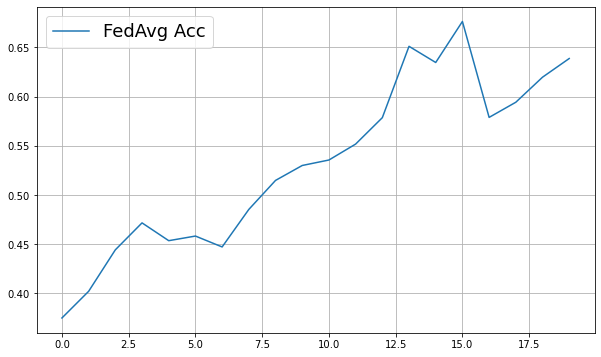

In [8]:
average_acc_list = []

for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['acc{}'.format(j)][i]) + sum

    average_acc_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_acc_list[:], label='FedAvg Acc')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()

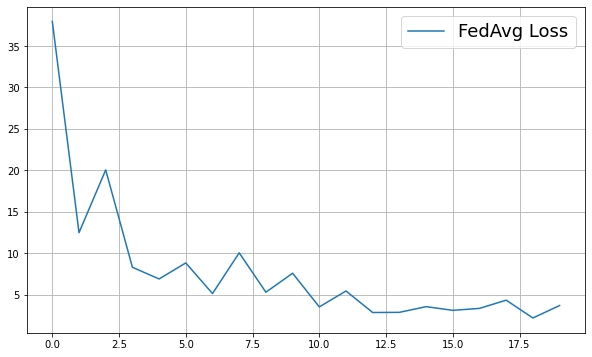

In [9]:
average_loss_list = []


for i in range(20):
    sum = 0
    for j in range(10):
        sum = np.mean(globals()['loss{}'.format(j)][i]) + sum

    average_loss_list.append(sum/10)  


plt.figure(figsize=(10,6))
plt.plot(average_loss_list[:], label='FedAvg Loss')

plt.grid(True)
plt.legend(fontsize=18)
plt.show()